#    
# <font color=blue>**CREDIT EDA Case Study**  </font>
<font color=maroon>_Team Members :_
 - _Abhishek Bhattacharya_  
 - _Jithin Prakash K_  </font>
 ____

# Problem
___

## Introduction
This case study aims to give you an idea of applying EDA in a real business scenario. In this case study, apart from applying the techniques that you have learnt in the EDA module, you will also develop a basic understanding of risk analytics in banking and financial services and understand how data is used to minimise the risk of losing money while lending to customers.

Business Understanding
The loan providing companies find it hard to give loans to the people due to their insufficient or non-existent credit history. Because of that, some consumers use it as their advantage by becoming a defaulter. Suppose you work for a consumer finance company which specialises in lending various types of loans to urban customers. You have to use EDA to analyse the patterns present in the data. This will ensure that the applicants capable of repaying the loan are not rejected.

When the company receives a loan application, the company has to decide for loan approval based on the applicant’s profile. Two types of risks are associated with the bank’s decision:
- If the applicant is likely to repay the loan, then not approving the loan results in a loss of business to the company

- If the applicant is not likely to repay the loan, i.e. he/she is likely to default, then approving the loan may lead to a financial loss for the company.

The data given below contains the information about the loan application at the time of applying for the loan. It contains two types of scenarios:
- **The client with payment difficulties**: he/she had late payment more than X days on at least one of the first Y instalments of the loan in our sample,

- **All other cases**: All other cases when the payment is paid on time.

When a client applies for a loan, there are four types of decisions that could be taken by the client/company):

1. **Approved**: The Company has approved loan Application

2. **Cancelled**: The client cancelled the application sometime during approval. Either the client changed her/his mind about the loan or in some cases due to a higher risk of the client he received worse pricing which he did not want.

3. **Refused**: The company had rejected the loan (because the client does not meet their requirements etc.).

4. **Unused offer**:  Loan has been cancelled by the client but on different stages of the process.

In this case study, you will use EDA to understand how consumer attributes and loan attributes influence the tendency of default.

## Business Objectives
___
This case study aims to identify patterns which indicate if a client has difficulty paying their installments which may be used for taking actions such as denying the loan, reducing the amount of loan, lending (to risky applicants) at a higher interest rate, etc. This will ensure that the consumers capable of repaying the loan are not rejected. Identification of such applicants using EDA is the aim of this case study.

In other words, the company wants to understand the driving factors (or driver variables) behind loan default, i.e. the variables which are strong indicators of default.  The company can utilise this knowledge for its portfolio and risk assessment.

To develop your understanding of the domain, you are advised to independently research a little about risk analytics - understanding the types of variables and their significance should be enough).

# <font color=blue>**Approach**</font>
___

## Importing libraries

In [1]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import warnings
warnings.filterwarnings("ignore")

pd.set_option('display.max_columns', 200)
pd.set_option('display.max_rows', 200)

```
Versions used (Jupyter Notebook on Google Colab)
-------------------------------
- Python             :  3.6.9
- Pandas Version     :  1.0.5
- Matplotlib Version :  3.2.2
- Seaborn Version    :  0.10.1
- Numpy Version      :  1.18.5
```

## Reading the File

### Only For google Colab - Reading the files using pandas
Loading file from the folder inside Google Drive/EDA_Case_Study/

In [2]:
# from google.colab import drive
# drive.mount('/content/drive')
# df_app = pd.read_csv('/content/drive/My Drive/EDA_Case_Study/application_data.csv')
# df_prev = pd.read_csv('/content/drive/My Drive/EDA_Case_Study/previous_application.csv')

### Reading the files using pandas - system ./ folder



In [3]:
#Use this if not imported from Google Drive

df_app = pd.read_csv('application_data.csv')
df_prev= pd.read_csv('previous_application.csv')

# EDA on Application_Data.CSV
___

## Routine Checks
* Shape
* Head
* Info
* Describe

### Shape of the data frames

In [4]:
print('Shape of the application data : ',df_app.shape)
print('Shape of the previous application data : ',df_prev.shape)

Shape of the application data :  (307511, 122)
Shape of the previous application data :  (1670214, 37)


### HEAD

In [5]:
df_app.head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0      100002       1         Cash loans           M            N   
1      100003       0         Cash loans           F            N   
2      100004       0    Revolving loans           M            Y   
3      100006       0         Cash loans           F            N   
4      100007       0         Cash loans           M            N   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0               Y             0          202500.0    406597.5      24700.5   
1               N             0          270000.0   1293502.5      35698.5   
2               Y             0           67500.0    135000.0       6750.0   
3               Y             0          135000.0    312682.5      29686.5   
4               Y             0          121500.0    513000.0      21865.5   

   AMT_GOODS_PRICE NAME_TYPE_SUITE NAME_INCOME_TYPE  \
0         351000.0   Unaccompanied          Working   
1        1129500.0          Family    State servant   
2         135000.0   Unaccompanied          Working   
3         297000.0   Unaccompanied          Working   
4         513000.0   Unaccompanied          Working   

             NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  \
0  Secondary / secondary special  Single / not married  House / apartment   
1               Higher education               Married  House / apartment   
2  Secondary / secondary special  Single / not married  House / apartment   
3  Secondary / secondary special        Civil marriage  House / apartment   
4  Secondary / secondary special  Single / not married  House / apartment   

   REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  \
0                    0.018801       -9461           -637            -3648.0   
1                    0.003541      -16765          -1188            -1186.0   
2                    0.010032      -19046           -225            -4260.0   
3                    0.008019      -19005          -3039            -9833.0   
4                    0.028663      -19932          -3038            -4311.0   

   DAYS_ID_PUBLISH  OWN_CAR_AGE  FLAG_MOBIL  FLAG_EMP_PHONE  FLAG_WORK_PHONE  \
0            -2120          NaN           1               1                0   
1             -291          NaN           1               1                0   
2            -2531         26.0           1               1                1   
3            -2437          NaN           1               1                0   
4            -3458          NaN           1               1                0   

   FLAG_CONT_MOBILE  FLAG_PHONE  FLAG_EMAIL OCCUPATION_TYPE  CNT_FAM_MEMBERS  \
0                 1           1           0        Laborers              1.0   
1                 1           1           0      Core staff              2.0   
2                 1           1           0        Laborers              1.0   
3                 1           0           0        Laborers              2.0   
4                 1           0           0      Core staff              1.0   

   REGION_RATING_CLIENT  REGION_RATING_CLIENT_W_CITY  \
0                     2                            2   
1                     1                            1   
2                     2                            2   
3                     2                            2   
4                     2                            2   

  WEEKDAY_APPR_PROCESS_START  HOUR_APPR_PROCESS_START  \
0                  WEDNESDAY                       10   
1                     MONDAY                       11   
2                     MONDAY                        9   
3                  WEDNESDAY                       17   
4                   THURSDAY                       11   

   REG_REGION_NOT_LIVE_REGION  REG_REGION_NOT_WORK_REGION  \
0                           0                           0   
1                           0                           0   
2                        

### INFO

In [6]:
df_app.info(verbose=True) 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 122 columns):
 #   Column                        Dtype  
---  ------                        -----  
 0   SK_ID_CURR                    int64  
 1   TARGET                        int64  
 2   NAME_CONTRACT_TYPE            object 
 3   CODE_GENDER                   object 
 4   FLAG_OWN_CAR                  object 
 5   FLAG_OWN_REALTY               object 
 6   CNT_CHILDREN                  int64  
 7   AMT_INCOME_TOTAL              float64
 8   AMT_CREDIT                    float64
 9   AMT_ANNUITY                   float64
 10  AMT_GOODS_PRICE               float64
 11  NAME_TYPE_SUITE               object 
 12  NAME_INCOME_TYPE              object 
 13  NAME_EDUCATION_TYPE           object 
 14  NAME_FAMILY_STATUS            object 
 15  NAME_HOUSING_TYPE             object 
 16  REGION_POPULATION_RELATIVE    float64
 17  DAYS_BIRTH                    int64  
 18  DAYS_EMPLOYED          

In [7]:
df_app.TARGET.dtype

dtype('int64')

### Describe

In [8]:
df_app.describe()

SK_ID_CURR         TARGET   CNT_CHILDREN  AMT_INCOME_TOTAL  \
count  307511.000000  307511.000000  307511.000000      3.075110e+05   
mean   278180.518577       0.080729       0.417052      1.687979e+05   
std    102790.175348       0.272419       0.722121      2.371231e+05   
min    100002.000000       0.000000       0.000000      2.565000e+04   
25%    189145.500000       0.000000       0.000000      1.125000e+05   
50%    278202.000000       0.000000       0.000000      1.471500e+05   
75%    367142.500000       0.000000       1.000000      2.025000e+05   
max    456255.000000       1.000000      19.000000      1.170000e+08   

         AMT_CREDIT    AMT_ANNUITY  AMT_GOODS_PRICE  \
count  3.075110e+05  307499.000000     3.072330e+05   
mean   5.990260e+05   27108.573909     5.383962e+05   
std    4.024908e+05   14493.737315     3.694465e+05   
min    4.500000e+04    1615.500000     4.050000e+04   
25%    2.700000e+05   16524.000000     2.385000e+05   
50%    5.135310e+05   24903.000000     4.500000e+05   
75%    8.086500e+05   34596.000000     6.795000e+05   
max    4.050000e+06  258025.500000     4.050000e+06   

       REGION_POPULATION_RELATIVE     DAYS_BIRTH  DAYS_EMPLOYED  \
count               307511.000000  307511.000000  307511.000000   
mean                     0.020868  -16036.995067   63815.045904   
std                      0.013831    4363.988632  141275.766519   
min                      0.000290  -25229.000000  -17912.000000   
25%                      0.010006  -19682.000000   -2760.000000   
50%                      0.018850  -15750.000000   -1213.000000   
75%                      0.028663  -12413.000000    -289.000000   
max                      0.072508   -7489.000000  365243.000000   

       DAYS_REGISTRATION  DAYS_ID_PUBLISH    OWN_CAR_AGE     FLAG_MOBIL  \
count      307511.000000    307511.000000  104582.000000  307511.000000   
mean        -4986.120328     -2994.202373      12.061091       0.999997   
std          3522.886321      1509.450419      11.944812       0.001803   
min        -24672.000000     -7197.000000       0.000000       0.000000   
25%         -7479.500000     -4299.000000       5.000000       1.000000   
50%         -4504.000000     -3254.000000       9.000000       1.000000   
75%         -2010.000000     -1720.000000      15.000000       1.000000   
max             0.000000         0.000000      91.000000       1.000000   

       FLAG_EMP_PHONE  FLAG_WORK_PHONE  FLAG_CONT_MOBILE     FLAG_PHONE  \
count   307511.000000    307511.000000     307511.000000  307511.000000   
mean         0.819889         0.199368          0.998133       0.281066   
std          0.384280         0.399526          0.043164       0.449521   
min          0.000000         0.000000          0.000000       0.000000   
25%          1.000000         0.000000          1.000000       0.000000   
50%          1.000000         0.000000          1.000000       0.000000   
75%          1.000000         0.000000          1.000000       1.000000   
max          1.000000         1.000000          1.000000       1.000000   

          FLAG_EMAIL  CNT_FAM_MEMBERS  REGION_RATING_CLIENT  \
count  307511.000000    307509.000000         307511.000000   
mean        0.056720         2.152665              2.052463   
std         0.231307         0.910682              0.509034   
min         0.000000         1.000000              1.000000   
25%         0.000000         2.000000              2.000000   
50%         0.000000         2.000000              2.000000   
75%         0.000000         3.000000              2.000000   
max         1.000000        20.000000              3.000000   

       REGION_RATING_CLIENT_W_CITY  HOUR_APPR_PROCESS_START  \
count                307511.000000            307511.000000   
mean                      2.031521                12.063419   
std                       0.502737                 3.265832   
min                       1.000000                 0.000000   
25%                       

## Data Quality Checks
___
* Missing Values
* Data Types

### Check for Missing Values

In [9]:
null_sum = df_app.isnull().sum()
null_percentage = round(df_app.isnull().mean()*100,2)
null_df = pd.concat([null_sum,null_percentage], axis=1, keys = ['Total', 'Percentage'])
null_df.sort_values(by='Total',ascending=False)

Total  Percentage
COMMONAREA_MEDI               214865       69.87
COMMONAREA_AVG                214865       69.87
COMMONAREA_MODE               214865       69.87
NONLIVINGAPARTMENTS_MODE      213514       69.43
NONLIVINGAPARTMENTS_AVG       213514       69.43
NONLIVINGAPARTMENTS_MEDI      213514       69.43
FONDKAPREMONT_MODE            210295       68.39
LIVINGAPARTMENTS_MODE         210199       68.35
LIVINGAPARTMENTS_AVG          210199       68.35
LIVINGAPARTMENTS_MEDI         210199       68.35
FLOORSMIN_AVG                 208642       67.85
FLOORSMIN_MODE                208642       67.85
FLOORSMIN_MEDI                208642       67.85
YEARS_BUILD_MEDI              204488       66.50
YEARS_BUILD_MODE              204488       66.50
YEARS_BUILD_AVG               204488       66.50
OWN_CAR_AGE                   202929       65.99
LANDAREA_MEDI                 182590       59.38
LANDAREA_MODE                 182590       59.38
LANDAREA_AVG                  182590       59.38
BASEMENTAREA_MEDI             179943       58.52
BASEMENTAREA_AVG              179943       58.52
BASEMENTAREA_MODE             179943       58.52
EXT_SOURCE_1                  173378       56.38
NONLIVINGAREA_MODE            169682       55.18
NONLIVINGAREA_AVG             169682       55.18
NONLIVINGAREA_MEDI            169682       55.18
ELEVATORS_MEDI                163891       53.30
ELEVATORS_AVG                 163891       53.30
ELEVATORS_MODE                163891       53.30
WALLSMATERIAL_MODE            156341       50.84
APARTMENTS_MEDI               156061       50.75
APARTMENTS_AVG                156061       50.75
APARTMENTS_MODE               156061       50.75
ENTRANCES_MEDI                154828       50.35
ENTRANCES_AVG                 154828       50.35
ENTRANCES_MODE                154828       50.35
LIVINGAREA_AVG                154350       50.19
LIVINGAREA_MODE               154350       50.19
LIVINGAREA_MEDI               154350       50.19
HOUSETYPE_MODE                154297       50.18
FLOORSMAX_MODE                153020       49.76
FLOORSMAX_MEDI                153020       49.76
FLOORSMAX_AVG                 153020       49.76
YEARS_BEGINEXPLUATATION_MODE  150007       48.78
YEARS_BEGINEXPLUATATION_MEDI  150007       48.78
YEARS_BEGINEXPLUATATION_AVG   150007       48.78
TOTALAREA_MODE                148431       48.27
EMERGENCYSTATE_MODE           145755       47.40
OCCUPATION_TYPE                96391       31.35
EXT_SOURCE_3                   60965       19.83
AMT_REQ_CREDIT_BUREAU_HOUR     41519       13.50
AMT_REQ_CREDIT_BUREAU_DAY      41519       13.50
AMT_REQ_CREDIT_BUREAU_WEEK     41519       13.50
AMT_REQ_CREDIT_BUREAU_MON      41519       13.50
AMT_REQ_CREDIT_BUREAU_QRT      41519       13.50
AMT_REQ_CREDIT_BUREAU_YEAR     41519       13.50
NAME_TYPE_SUITE                 1292        0.42
OBS_30_CNT_SOCIAL_CIRCLE        1021        0.33
DEF_30_CNT_SOCIAL_CIRCLE        1021        0.33
OBS_60_CNT_SOCIAL_CIRCLE        1021        0.33
DEF_60_CNT_SOCIAL_CIRCLE        1021        0.33
EXT_SOURCE_2                     660        0.21
AMT_GOODS_PRICE                  278        0.09
AMT_ANNUITY                       12        0.00
CNT_FAM_MEMBERS                    2        0.00
DAYS_LAST_PHONE_CHANGE             1        0.00
CNT_CHILDREN                       0        0.00
FLAG_DOCUMENT_8                    0        0.00
NAME_CONTRACT_TYPE                 0        0.00
CODE_GENDER                        0        0.00
FLAG_OWN_CAR                       0        0.00
FLAG_DOCUMENT_2                    0        0.00
FLAG_DOCUMENT_3                    0        0.00
FLAG_DOCUMENT_4                    0        0.00
FLAG_DOCUMENT_5                    0        0.00
FLAG_DOCUMENT_6                    0        0.00
FLAG_DOCUMENT_7                    0        0.00
FLAG_DOCUMENT_9                    0        0.00
FLAG_DOCUMENT_21                   0        0.00
FLAG_DOCUMENT_10                   0        0.00
FLAG_DOCUMENT

#### **Number of Columns with more than 50% Null Values**
___
It is tough to impute the missing values if missing more than half of the entire data, hence removing the columns

In [10]:
print('Out of {0} columns there are {1} columns with more than {2}% null values'.format(
    len(null_df),len(null_df[null_df.Percentage>=50]),50))

Out of 122 columns there are 41 columns with more than 50% null values


In [11]:
columns_to_drop = null_df[null_df.Percentage>=50].index
len(columns_to_drop),columns_to_drop

(41,
 Index(['OWN_CAR_AGE', 'EXT_SOURCE_1', 'APARTMENTS_AVG', 'BASEMENTAREA_AVG',
        'YEARS_BUILD_AVG', 'COMMONAREA_AVG', 'ELEVATORS_AVG', 'ENTRANCES_AVG',
        'FLOORSMIN_AVG', 'LANDAREA_AVG', 'LIVINGAPARTMENTS_AVG',
        'LIVINGAREA_AVG', 'NONLIVINGAPARTMENTS_AVG', 'NONLIVINGAREA_AVG',
        'APARTMENTS_MODE', 'BASEMENTAREA_MODE', 'YEARS_BUILD_MODE',
        'COMMONAREA_MODE', 'ELEVATORS_MODE', 'ENTRANCES_MODE', 'FLOORSMIN_MODE',
        'LANDAREA_MODE', 'LIVINGAPARTMENTS_MODE', 'LIVINGAREA_MODE',
        'NONLIVINGAPARTMENTS_MODE', 'NONLIVINGAREA_MODE', 'APARTMENTS_MEDI',
        'BASEMENTAREA_MEDI', 'YEARS_BUILD_MEDI', 'COMMONAREA_MEDI',
        'ELEVATORS_MEDI', 'ENTRANCES_MEDI', 'FLOORSMIN_MEDI', 'LANDAREA_MEDI',
        'LIVINGAPARTMENTS_MEDI', 'LIVINGAREA_MEDI', 'NONLIVINGAPARTMENTS_MEDI',
        'NONLIVINGAREA_MEDI', 'FONDKAPREMONT_MODE', 'HOUSETYPE_MODE',
        'WALLSMATERIAL_MODE'],
       dtype='object'))

#### **Redefining the data frame** - Dropping columns
___

In [12]:
df_app.drop(columns=columns_to_drop,inplace=True)
df_app.shape

(307511, 81)

#### **Number of Columns with less than 15% Null Values**
___

In [13]:
print('Out of {0} columns there are {1} columns with less than {2}% null values'.format(
    len(null_df),len(null_df[(null_df.Percentage<=15)&(null_df.Total>0)]),15))

Out of 122 columns there are 16 columns with less than 15% null values


In [14]:
null_df[(null_df.Percentage<=15)&(null_df.Total>0)]

Total  Percentage
AMT_ANNUITY                    12        0.00
AMT_GOODS_PRICE               278        0.09
NAME_TYPE_SUITE              1292        0.42
CNT_FAM_MEMBERS                 2        0.00
EXT_SOURCE_2                  660        0.21
OBS_30_CNT_SOCIAL_CIRCLE     1021        0.33
DEF_30_CNT_SOCIAL_CIRCLE     1021        0.33
OBS_60_CNT_SOCIAL_CIRCLE     1021        0.33
DEF_60_CNT_SOCIAL_CIRCLE     1021        0.33
DAYS_LAST_PHONE_CHANGE          1        0.00
AMT_REQ_CREDIT_BUREAU_HOUR  41519       13.50
AMT_REQ_CREDIT_BUREAU_DAY   41519       13.50
AMT_REQ_CREDIT_BUREAU_WEEK  41519       13.50
AMT_REQ_CREDIT_BUREAU_MON   41519       13.50
AMT_REQ_CREDIT_BUREAU_QRT   41519       13.50
AMT_REQ_CREDIT_BUREAU_YEAR  41519       13.50

In [15]:
columns_to_check = list(null_df[(null_df.Percentage<=15)&(null_df.Total>0)].index)
len(columns_to_check)

16

In [16]:
# Finding Categorical Variables 
df_app[columns_to_check].nunique().sort_values()

AMT_REQ_CREDIT_BUREAU_HOUR         5
NAME_TYPE_SUITE                    7
DEF_60_CNT_SOCIAL_CIRCLE           9
AMT_REQ_CREDIT_BUREAU_DAY          9
AMT_REQ_CREDIT_BUREAU_WEEK         9
DEF_30_CNT_SOCIAL_CIRCLE          10
AMT_REQ_CREDIT_BUREAU_QRT         11
CNT_FAM_MEMBERS                   17
AMT_REQ_CREDIT_BUREAU_MON         24
AMT_REQ_CREDIT_BUREAU_YEAR        25
OBS_30_CNT_SOCIAL_CIRCLE          33
OBS_60_CNT_SOCIAL_CIRCLE          33
AMT_GOODS_PRICE                 1002
DAYS_LAST_PHONE_CHANGE          3773
AMT_ANNUITY                    13672
EXT_SOURCE_2                  119831
dtype: int64

In [17]:
for col in columns_to_check:
    print(df_app[col].value_counts())

9000.0     6385
13500.0    5514
6750.0     2279
10125.0    2035
37800.0    1602
           ... 
15210.0       1
50265.0       1
73012.5       1
40558.5       1
4437.0        1
Name: AMT_ANNUITY, Length: 13672, dtype: int64
450000.0    26022
225000.0    25282
675000.0    24962
900000.0    15416
270000.0    11428
            ...  
705892.5        1
442062.0        1
353641.5        1
353749.5        1
738945.0        1
Name: AMT_GOODS_PRICE, Length: 1002, dtype: int64
Unaccompanied      248526
Family              40149
Spouse, partner     11370
Children             3267
Other_B              1770
Other_A               866
Group of people       271
Name: NAME_TYPE_SUITE, dtype: int64
2.0     158357
1.0      67847
3.0      52601
4.0      24697
5.0       3478
6.0        408
7.0         81
8.0         20
9.0          6
10.0         3
14.0         2
16.0         2
12.0         2
20.0         2
11.0         1
13.0         1
15.0         1
Name: CNT_FAM_MEMBERS, dtype: int64
0.285898    721
0.26

**Categorical Variables : Examples**  
*Where Number of Columns with less than 15% Null Values*

Categorical Columns are selected where the unique value(from the value_counts) in a particular column is less than 50 

Thus, the columns  
```
'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'EXT_SOURCE_2', 'DAYS_LAST_PHONE_CHANGE'
```  
are numeric and the rest are considered as categorical for the columns that has less than 15% missing values.



In [18]:
# Categorical Variables : NAME_TYPE_SUITE Example
df_app['NAME_TYPE_SUITE'].value_counts()

Unaccompanied      248526
Family              40149
Spouse, partner     11370
Children             3267
Other_B              1770
Other_A               866
Group of people       271
Name: NAME_TYPE_SUITE, dtype: int64

We can possibly impute the missing values using the mode, which is Unaccompanied, but 
for this EDA we are keeping the null values as it is, since it has an imbalance output and it is not critical to impute the data

In [19]:
# Categorical Variables : CNT_FAM_MEMBERS Example
df_app['CNT_FAM_MEMBERS'].value_counts()

2.0     158357
1.0      67847
3.0      52601
4.0      24697
5.0       3478
6.0        408
7.0         81
8.0         20
9.0          6
10.0         3
14.0         2
16.0         2
12.0         2
20.0         2
11.0         1
13.0         1
15.0         1
Name: CNT_FAM_MEMBERS, dtype: int64

We can possibly impute the missing values using the mode, which is Number of family members = 2, but for this EDA we are keeping the null values as it is.

**PLOTS - Box plot and Count Plot - For the columns that has less than 15% Null values.**
___

- Box Plots can be used to infer the median and quantile value for the numeric data and we can gather insights about outliers, we can also gather information to impute the missing values.

- Count Plots can be used to infer the mode and occurrence of the values for the categorical data and we can gather insights to impute the missing values.

Describing the numerical data columns (Null value <15%)

In [20]:
df_app[['AMT_ANNUITY', 'AMT_GOODS_PRICE', 'EXT_SOURCE_2', 'DAYS_LAST_PHONE_CHANGE']].describe()

AMT_ANNUITY  AMT_GOODS_PRICE  EXT_SOURCE_2  DAYS_LAST_PHONE_CHANGE
count  307499.000000     3.072330e+05  3.068510e+05           307510.000000
mean    27108.573909     5.383962e+05  5.143927e-01             -962.858788
std     14493.737315     3.694465e+05  1.910602e-01              826.808487
min      1615.500000     4.050000e+04  8.173617e-08            -4292.000000
25%     16524.000000     2.385000e+05  3.924574e-01            -1570.000000
50%     24903.000000     4.500000e+05  5.659614e-01             -757.000000
75%     34596.000000     6.795000e+05  6.636171e-01             -274.000000
max    258025.500000     4.050000e+06  8.549997e-01                0.000000

**Box plots the numerical data columns (Null value <15%)**
___

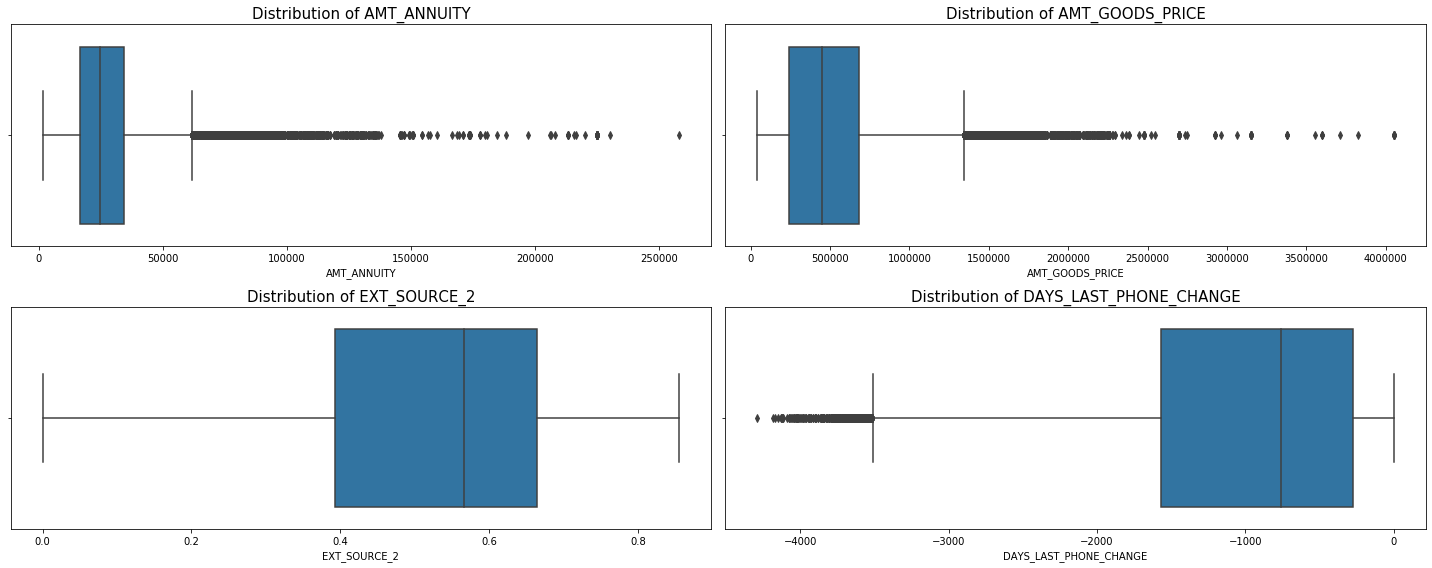

In [21]:
# Box plots for Numeric variables 
fig,ax = plt.subplots(nrows=2, ncols=2, figsize=(20,8))
for i, col in enumerate(['AMT_ANNUITY', 'AMT_GOODS_PRICE', 'EXT_SOURCE_2', 'DAYS_LAST_PHONE_CHANGE']):
    sns.boxplot(df_app[col] , ax = ax.flatten()[i])
    ax.flatten()[i].set_title('Distribution of '+col,fontsize=15)
plt.tight_layout()
plt.show()

**Bar plots for the categorical data columns (Null value <15%)**
___

12


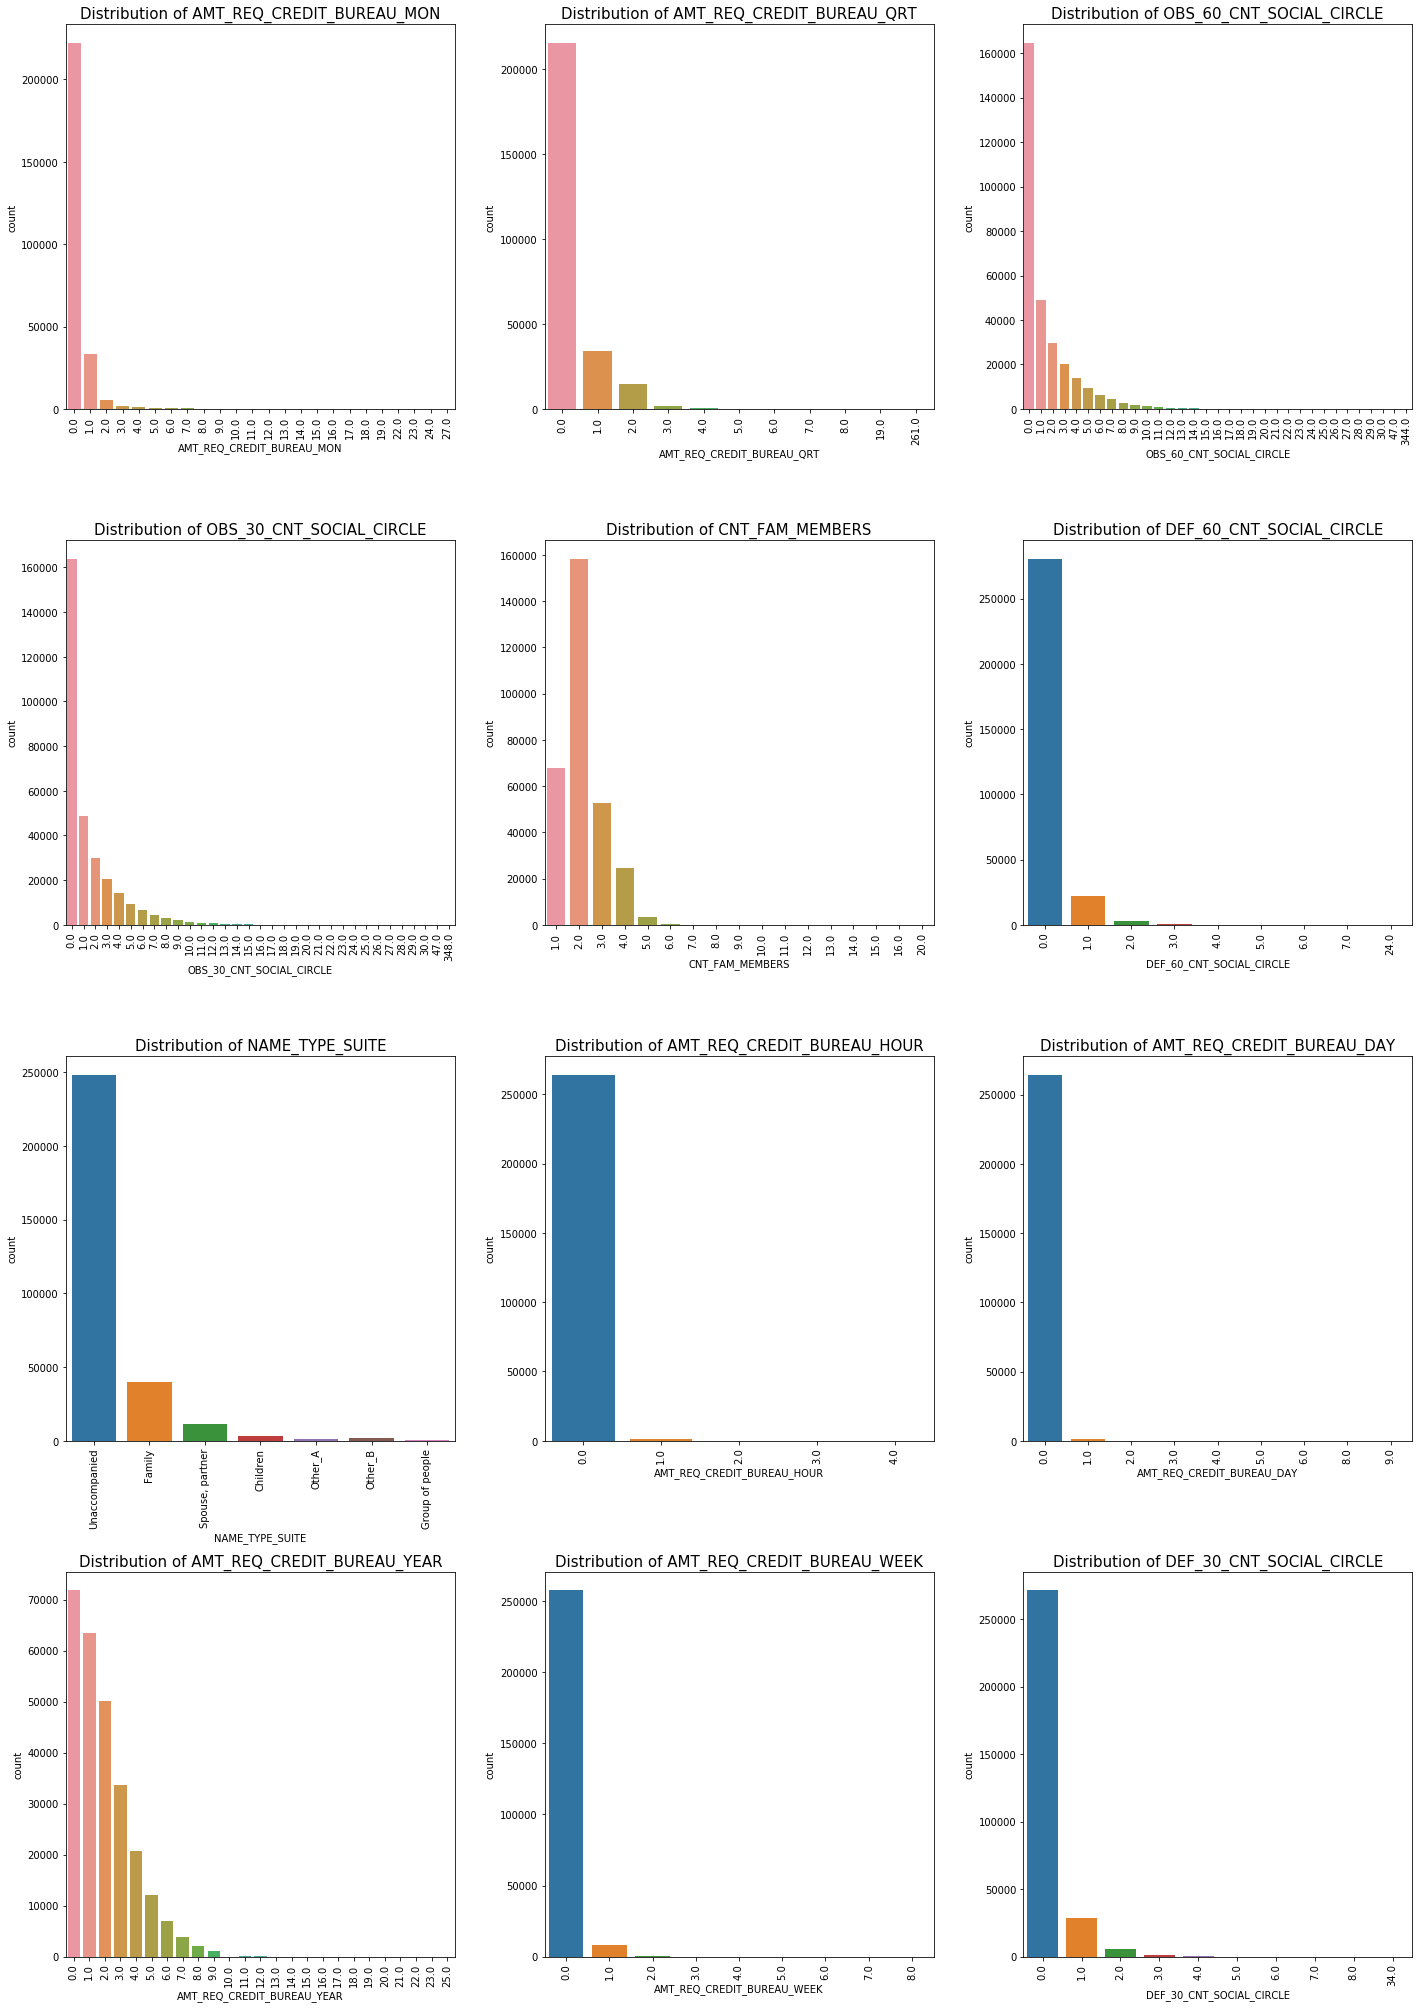

In [22]:
# Count plots for Numeric variables 
columns_to_plot = set(columns_to_check)-set(['AMT_ANNUITY', 'AMT_GOODS_PRICE', 'EXT_SOURCE_2', 'DAYS_LAST_PHONE_CHANGE'])
print(len(columns_to_plot))
fig,ax = plt.subplots(nrows=4, ncols=3, figsize=(20,28))
for i, col in enumerate(columns_to_plot):
    sns.countplot(df_app[col] , ax = ax.flatten()[i])
    ax.flatten()[i].set_title('Distribution of '+col,fontsize=15)
    ax.flatten()[i].set_xticklabels(ax.flatten()[i].get_xticklabels(),rotation=90)
plt.tight_layout()
plt.show()

**Approach and techniques to deal Missing Values**  
___

For the below numeric variables best approach is impute the missing data with the median as there are outliers for most of the attributes.

***Medians are available from the describe (50%) function mentioned above.***

```
•   'AMT_ANNUITY'               - Median : 24903.00
•   'AMT_GOODS_PRICE',          - Median : 450000.00
•   'EXT_SOURCE_2',             - Mean   : 0.5143 (Mean taken as there are no outliers.)
•   'DAYS_LAST_PHONE_CHANGE',   - Median : 757.00
```
  
For the below variables we can either consider that there are no contacts/credit checks made on hour/day/week/month/quarter/year in which case it can be inferred as zeros. Another alternate method is to take the mode and impute the same since these are categorical counts.

***The Mode is available in the graphs plotted above.***

```
•   'AMT_REQ_CREDIT_BUREAU_HOUR',   - Mode : 0.0
•   'AMT_REQ_CREDIT_BUREAU_DAY',    - Mode : 0.0
•   'AMT_REQ_CREDIT_BUREAU_WEEK',   - Mode : 0.0
•   'AMT_REQ_CREDIT_BUREAU_MON',    - Mode : 0.0
•   'AMT_REQ_CREDIT_BUREAU_QRT',    - Mode : 0.0
•   'AMT_REQ_CREDIT_BUREAU_YEAR'    - Mode : 0.0
```

The same principle can be applied for social circles as well, 

Again, ***The Mode is available in the graphs plotted above.***

```
•   'OBS_30_CNT_SOCIAL_CIRCLE',
•   'DEF_30_CNT_SOCIAL_CIRCLE',
•   'OBS_60_CNT_SOCIAL_CIRCLE',
•   'DEF_60_CNT_SOCIAL_CIRCLE',
```

```
•   CNT_FAM_MEMBERS
•   NAME_TYPE_SUITE
```

***CNT_FAM_MEMBERS*** We can impute the values using the mode, which is Number of family members = 2, but for this EDA we are keeping the null values as it is., for ***NAME_TYPE_SUITE*** mode is Unaccompanied, but for this EDA we are keeping the null values as it is, since it has an imbalance output and it is not critical to impute the data

<font color=green>**However for this EDA we are not imputing the missing values** </font>

### Datatype Check
___

In [23]:
df_app.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 81 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   SK_ID_CURR                    307511 non-null  int64  
 1   TARGET                        307511 non-null  int64  
 2   NAME_CONTRACT_TYPE            307511 non-null  object 
 3   CODE_GENDER                   307511 non-null  object 
 4   FLAG_OWN_CAR                  307511 non-null  object 
 5   FLAG_OWN_REALTY               307511 non-null  object 
 6   CNT_CHILDREN                  307511 non-null  int64  
 7   AMT_INCOME_TOTAL              307511 non-null  float64
 8   AMT_CREDIT                    307511 non-null  float64
 9   AMT_ANNUITY                   307499 non-null  float64
 10  AMT_GOODS_PRICE               307233 non-null  float64
 11  NAME_TYPE_SUITE               306219 non-null  object 
 12  NAME_INCOME_TYPE              307511 non-nul

#### **Checking for 'Object' DataTypes**

In [24]:
df_app.select_dtypes('object').nunique().sort_values()

NAME_CONTRACT_TYPE             2
FLAG_OWN_CAR                   2
FLAG_OWN_REALTY                2
EMERGENCYSTATE_MODE            2
CODE_GENDER                    3
NAME_EDUCATION_TYPE            5
NAME_FAMILY_STATUS             6
NAME_HOUSING_TYPE              6
NAME_TYPE_SUITE                7
WEEKDAY_APPR_PROCESS_START     7
NAME_INCOME_TYPE               8
OCCUPATION_TYPE               18
ORGANIZATION_TYPE             58
dtype: int64

In [25]:
cat_col = df_app.select_dtypes('object').nunique().index
len(cat_col)

13

In [26]:
for col in cat_col:
    df_app[col] = df_app[col].astype('category')

#### **Checking for 'INT' Datatypes**

In [27]:
df_app.select_dtypes(['int','int64']).nunique().sort_values()

LIVE_CITY_NOT_WORK_CITY             2
FLAG_DOCUMENT_3                     2
FLAG_DOCUMENT_4                     2
FLAG_DOCUMENT_5                     2
FLAG_DOCUMENT_6                     2
FLAG_DOCUMENT_7                     2
FLAG_DOCUMENT_8                     2
FLAG_DOCUMENT_9                     2
FLAG_DOCUMENT_10                    2
FLAG_DOCUMENT_11                    2
FLAG_DOCUMENT_12                    2
FLAG_DOCUMENT_13                    2
FLAG_DOCUMENT_14                    2
FLAG_DOCUMENT_15                    2
FLAG_DOCUMENT_16                    2
FLAG_DOCUMENT_17                    2
FLAG_DOCUMENT_18                    2
FLAG_DOCUMENT_19                    2
FLAG_DOCUMENT_2                     2
FLAG_DOCUMENT_20                    2
FLAG_DOCUMENT_21                    2
REG_CITY_NOT_LIVE_CITY              2
TARGET                              2
FLAG_MOBIL                          2
FLAG_EMP_PHONE                      2
FLAG_WORK_PHONE                     2
REG_CITY_NOT

In [28]:
cat_col = df_app.select_dtypes(['int','int64']).nunique()[
                df_app.select_dtypes(['int','int64']).nunique()<=50].index
len(cat_col)

37

In [29]:
for col in cat_col:
    df_app[col] = df_app[col].astype('category')

In [30]:
df_app.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 81 columns):
 #   Column                        Non-Null Count   Dtype   
---  ------                        --------------   -----   
 0   SK_ID_CURR                    307511 non-null  int64   
 1   TARGET                        307511 non-null  category
 2   NAME_CONTRACT_TYPE            307511 non-null  category
 3   CODE_GENDER                   307511 non-null  category
 4   FLAG_OWN_CAR                  307511 non-null  category
 5   FLAG_OWN_REALTY               307511 non-null  category
 6   CNT_CHILDREN                  307511 non-null  category
 7   AMT_INCOME_TOTAL              307511 non-null  float64 
 8   AMT_CREDIT                    307511 non-null  float64 
 9   AMT_ANNUITY                   307499 non-null  float64 
 10  AMT_GOODS_PRICE               307233 non-null  float64 
 11  NAME_TYPE_SUITE               306219 non-null  category
 12  NAME_INCOME_TYPE              

In [31]:
df_app.select_dtypes(['int','int64']).nunique().sort_values()

DAYS_ID_PUBLISH      6168
DAYS_EMPLOYED       12574
DAYS_BIRTH          17460
SK_ID_CURR         307511
dtype: int64

**Checking for DAYs**
* *DAYS_ID_PUBLISH*
* *DAYS_EMPLOYED*
* *DAYS_BIRTH*          

In [32]:
columns_to_check = ['DAYS_ID_PUBLISH','DAYS_EMPLOYED','DAYS_BIRTH']
for col in columns_to_check:
    print(df_app[col].value_counts())

-4053    169
-4095    162
-4046    161
-4417    159
-4256    158
        ... 
-5696      1
-6073      1
-6076      1
-6176      1
-6189      1
Name: DAYS_ID_PUBLISH, Length: 6168, dtype: int64
 365243    55374
-200         156
-224         152
-199         151
-230         151
           ...  
-11115         1
-11371         1
-11883         1
-13536         1
-8795          1
Name: DAYS_EMPLOYED, Length: 12574, dtype: int64
-13749    43
-13481    42
-18248    41
-10020    41
-15771    40
          ..
-25032     1
-7956      1
-8001      1
-7861      1
-24894     1
Name: DAYS_BIRTH, Length: 17460, dtype: int64


In [33]:
# All the days are shown as negative as it referrs to past, 
# for analysis converting it to positive numbers

for col in columns_to_check:
    df_app[col]=abs(df_app[col])

#### **Checking for 'FLOAT' Datatypes**

In [34]:
df_app.select_dtypes(['float','float64']).nunique().sort_values()

AMT_REQ_CREDIT_BUREAU_HOUR           5
AMT_REQ_CREDIT_BUREAU_WEEK           9
AMT_REQ_CREDIT_BUREAU_DAY            9
DEF_60_CNT_SOCIAL_CIRCLE             9
DEF_30_CNT_SOCIAL_CIRCLE            10
AMT_REQ_CREDIT_BUREAU_QRT           11
CNT_FAM_MEMBERS                     17
AMT_REQ_CREDIT_BUREAU_MON           24
AMT_REQ_CREDIT_BUREAU_YEAR          25
FLOORSMAX_MODE                      25
OBS_60_CNT_SOCIAL_CIRCLE            33
OBS_30_CNT_SOCIAL_CIRCLE            33
FLOORSMAX_MEDI                      49
REGION_POPULATION_RELATIVE          81
YEARS_BEGINEXPLUATATION_MODE       221
YEARS_BEGINEXPLUATATION_MEDI       245
YEARS_BEGINEXPLUATATION_AVG        285
FLOORSMAX_AVG                      403
EXT_SOURCE_3                       814
AMT_GOODS_PRICE                   1002
AMT_INCOME_TOTAL                  2548
DAYS_LAST_PHONE_CHANGE            3773
TOTALAREA_MODE                    5116
AMT_CREDIT                        5603
AMT_ANNUITY                      13672
DAYS_REGISTRATION        

Next step is, Checking if the columns belong to categorical or numeric, considering the unique values for above is less than 100.

In [35]:
df_app['FLOORSMAX_MODE'].value_counts().head()

0.1667    65550
0.3333    34373
0.0417    15616
0.3750     8321
0.1250     7267
Name: FLOORSMAX_MODE, dtype: int64

FLOORSMAX_MODE is a numeric variable as it has normalized float the data

In [36]:
df_app['FLOORSMAX_MEDI'].value_counts().head()

0.1667    63607
0.3333    33279
0.0417    14832
0.3750     8207
0.1250     7079
Name: FLOORSMAX_MEDI, dtype: int64

FLOORSMAX_MEDI is a numeric variable as it has normalized float the data

In [37]:
df_app['REGION_POPULATION_RELATIVE'].value_counts().head()

0.035792    16408
0.046220    13442
0.030755    12163
0.025164    11950
0.026392    11601
Name: REGION_POPULATION_RELATIVE, dtype: int64

REGION_POPULATION_RELATIVE is a numeric variable as it has float the data points

In [38]:
df_app['OBS_30_CNT_SOCIAL_CIRCLE'].value_counts().head(10)

0.0    163910
1.0     48783
2.0     29808
3.0     20322
4.0     14143
5.0      9553
6.0      6453
7.0      4390
8.0      2967
9.0      2003
Name: OBS_30_CNT_SOCIAL_CIRCLE, dtype: int64

In [39]:
df_app['OBS_60_CNT_SOCIAL_CIRCLE'].value_counts().head(10)

0.0    164666
1.0     48870
2.0     29766
3.0     20215
4.0     13946
5.0      9463
6.0      6349
7.0      4344
8.0      2886
9.0      1959
Name: OBS_60_CNT_SOCIAL_CIRCLE, dtype: int64

Both OBS_30 and 60 social circles are categorical

***We can convert the columns to categorical columns where the unique values are less than 35 except for FLOORMAX_MODE where the unique values are less than 35 yet numeric, hence removing that from the list as below,***

In [40]:
cat_cols_filtered = list(df_app.select_dtypes(['float','float64']).nunique()[
                                        df_app.select_dtypes(['float','float64']).nunique()<=35].index)
cat_cols_filtered.remove('FLOORSMAX_MODE')
len(cat_cols_filtered)

11

***Plotting the Categorical attributes to take a look at the data visually***

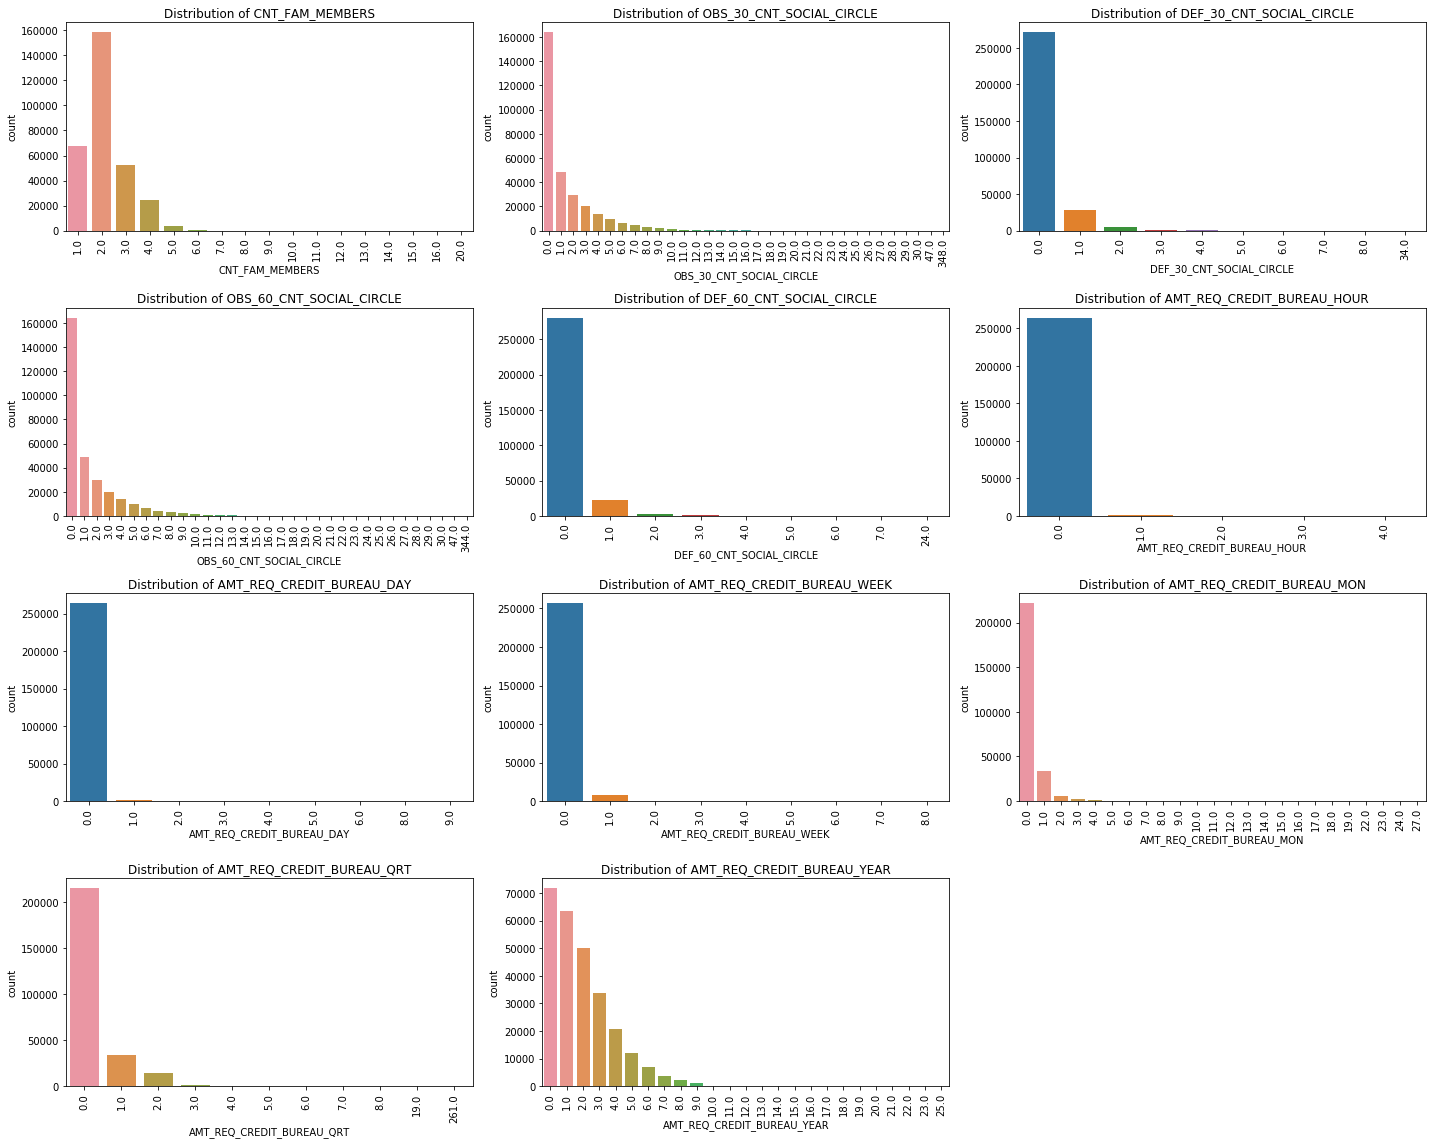

In [41]:
fig,ax = plt.subplots(nrows=4, ncols=3, figsize=(20,16))
for i, col in enumerate(cat_cols_filtered):
    sns.countplot(df_app[col] , ax = ax.flatten()[i])
    ax.flatten()[i].set_title('Distribution of '+col)
    ax.flatten()[i].set_xticklabels(ax.flatten()[i].get_xticklabels(),rotation=90)
fig.delaxes(ax[-1][2])
plt.tight_layout()
plt.show()

In [42]:
for col in cat_cols_filtered:
    df_app[col] = df_app[col].astype('category')

In [43]:
df_app.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 81 columns):
 #   Column                        Non-Null Count   Dtype   
---  ------                        --------------   -----   
 0   SK_ID_CURR                    307511 non-null  int64   
 1   TARGET                        307511 non-null  category
 2   NAME_CONTRACT_TYPE            307511 non-null  category
 3   CODE_GENDER                   307511 non-null  category
 4   FLAG_OWN_CAR                  307511 non-null  category
 5   FLAG_OWN_REALTY               307511 non-null  category
 6   CNT_CHILDREN                  307511 non-null  category
 7   AMT_INCOME_TOTAL              307511 non-null  float64 
 8   AMT_CREDIT                    307511 non-null  float64 
 9   AMT_ANNUITY                   307499 non-null  float64 
 10  AMT_GOODS_PRICE               307233 non-null  float64 
 11  NAME_TYPE_SUITE               306219 non-null  category
 12  NAME_INCOME_TYPE              

In [44]:
df_app.select_dtypes(['float','float64']).nunique().sort_index()

AMT_ANNUITY                      13672
AMT_CREDIT                        5603
AMT_GOODS_PRICE                   1002
AMT_INCOME_TOTAL                  2548
DAYS_LAST_PHONE_CHANGE            3773
DAYS_REGISTRATION                15688
EXT_SOURCE_2                    119831
EXT_SOURCE_3                       814
FLOORSMAX_AVG                      403
FLOORSMAX_MEDI                      49
FLOORSMAX_MODE                      25
REGION_POPULATION_RELATIVE          81
TOTALAREA_MODE                    5116
YEARS_BEGINEXPLUATATION_AVG        285
YEARS_BEGINEXPLUATATION_MEDI       245
YEARS_BEGINEXPLUATATION_MODE       221
dtype: int64

In [45]:
# All the days are shown as negative as it referrs to past, 
# for analysis converting it to positive numbers

columns_to_check = ['DAYS_LAST_PHONE_CHANGE','DAYS_REGISTRATION']
for col in columns_to_check:
    df_app[col]=abs(df_app[col])

In [46]:
df_app.describe()

SK_ID_CURR  AMT_INCOME_TOTAL    AMT_CREDIT    AMT_ANNUITY  \
count  307511.000000      3.075110e+05  3.075110e+05  307499.000000   
mean   278180.518577      1.687979e+05  5.990260e+05   27108.573909   
std    102790.175348      2.371231e+05  4.024908e+05   14493.737315   
min    100002.000000      2.565000e+04  4.500000e+04    1615.500000   
25%    189145.500000      1.125000e+05  2.700000e+05   16524.000000   
50%    278202.000000      1.471500e+05  5.135310e+05   24903.000000   
75%    367142.500000      2.025000e+05  8.086500e+05   34596.000000   
max    456255.000000      1.170000e+08  4.050000e+06  258025.500000   

       AMT_GOODS_PRICE  REGION_POPULATION_RELATIVE     DAYS_BIRTH  \
count     3.072330e+05               307511.000000  307511.000000   
mean      5.383962e+05                    0.020868   16036.995067   
std       3.694465e+05                    0.013831    4363.988632   
min       4.050000e+04                    0.000290    7489.000000   
25%       2.385000e+05                    0.010006   12413.000000   
50%       4.500000e+05                    0.018850   15750.000000   
75%       6.795000e+05                    0.028663   19682.000000   
max       4.050000e+06                    0.072508   25229.000000   

       DAYS_EMPLOYED  DAYS_REGISTRATION  DAYS_ID_PUBLISH  EXT_SOURCE_2  \
count  307511.000000      307511.000000    307511.000000  3.068510e+05   
mean    67724.742149        4986.120328      2994.202373  5.143927e-01   
std    139443.751806        3522.886321      1509.450419  1.910602e-01   
min         0.000000           0.000000         0.000000  8.173617e-08   
25%       933.000000        2010.000000      1720.000000  3.924574e-01   
50%      2219.000000        4504.000000      3254.000000  5.659614e-01   
75%      5707.000000        7479.500000      4299.000000  6.636171e-01   
max    365243.000000       24672.000000      7197.000000  8.549997e-01   

        EXT_SOURCE_3  YEARS_BEGINEXPLUATATION_AVG  FLOORSMAX_AVG  \
count  246546.000000                157504.000000  154491.000000   
mean        0.510853                     0.977735       0.226282   
std         0.194844                     0.059223       0.144641   
min         0.000527                     0.000000       0.000000   
25%         0.370650                     0.976700       0.166700   
50%         0.535276                     0.981600       0.166700   
75%         0.669057                     0.986600       0.333300   
max         0.896010                     1.000000       1.000000   

       YEARS_BEGINEXPLUATATION_MODE  FLOORSMAX_MODE  \
count                 157504.000000   154491.000000   
mean                       0.977065        0.222315   
std                        0.064575        0.143709   
min                        0.000000        0.000000   
25%                        0.976700        0.166700   
50%                        0.981600        0.166700   
75%                        0.986600        0.333300   
max                        1.000000        1.000000   

       YEARS_BEGINEXPLUATATION_MEDI  FLOORSMAX_MEDI  TOTALAREA_MODE  \
count                 157504.000000   154491.000000   159080.000000   
mean                       0.977752        0.225897        0.102547   
std                        0.059897        0.145067        0.107462   
min                        0.000000        0.000000        0.000000   
25%                        0.976700        0.166700        0.041200   
50%                        0.981600        0.166700        0.068800   
75%                        0.986600        0.333300        0.127600   
max                        1.000000        1.000000        1.000000   

       DAYS_LAST_PHONE_CHANGE  
count           307510.000000  
mean               962.858788  
std                826.808487  
min                  0.000000  
25%                274.000000  
50%                757.000000  
75%               1570.000000  
max               4292.000000

### Outlier check for numerical attributes
___

In [47]:
columns_to_check =  list(df_app.select_dtypes(['int','float','int64','float64']).columns)
columns_to_check.remove('SK_ID_CURR')
len(columns_to_check)

19

***Plotting box plots for numerical data to check for outliers visually***

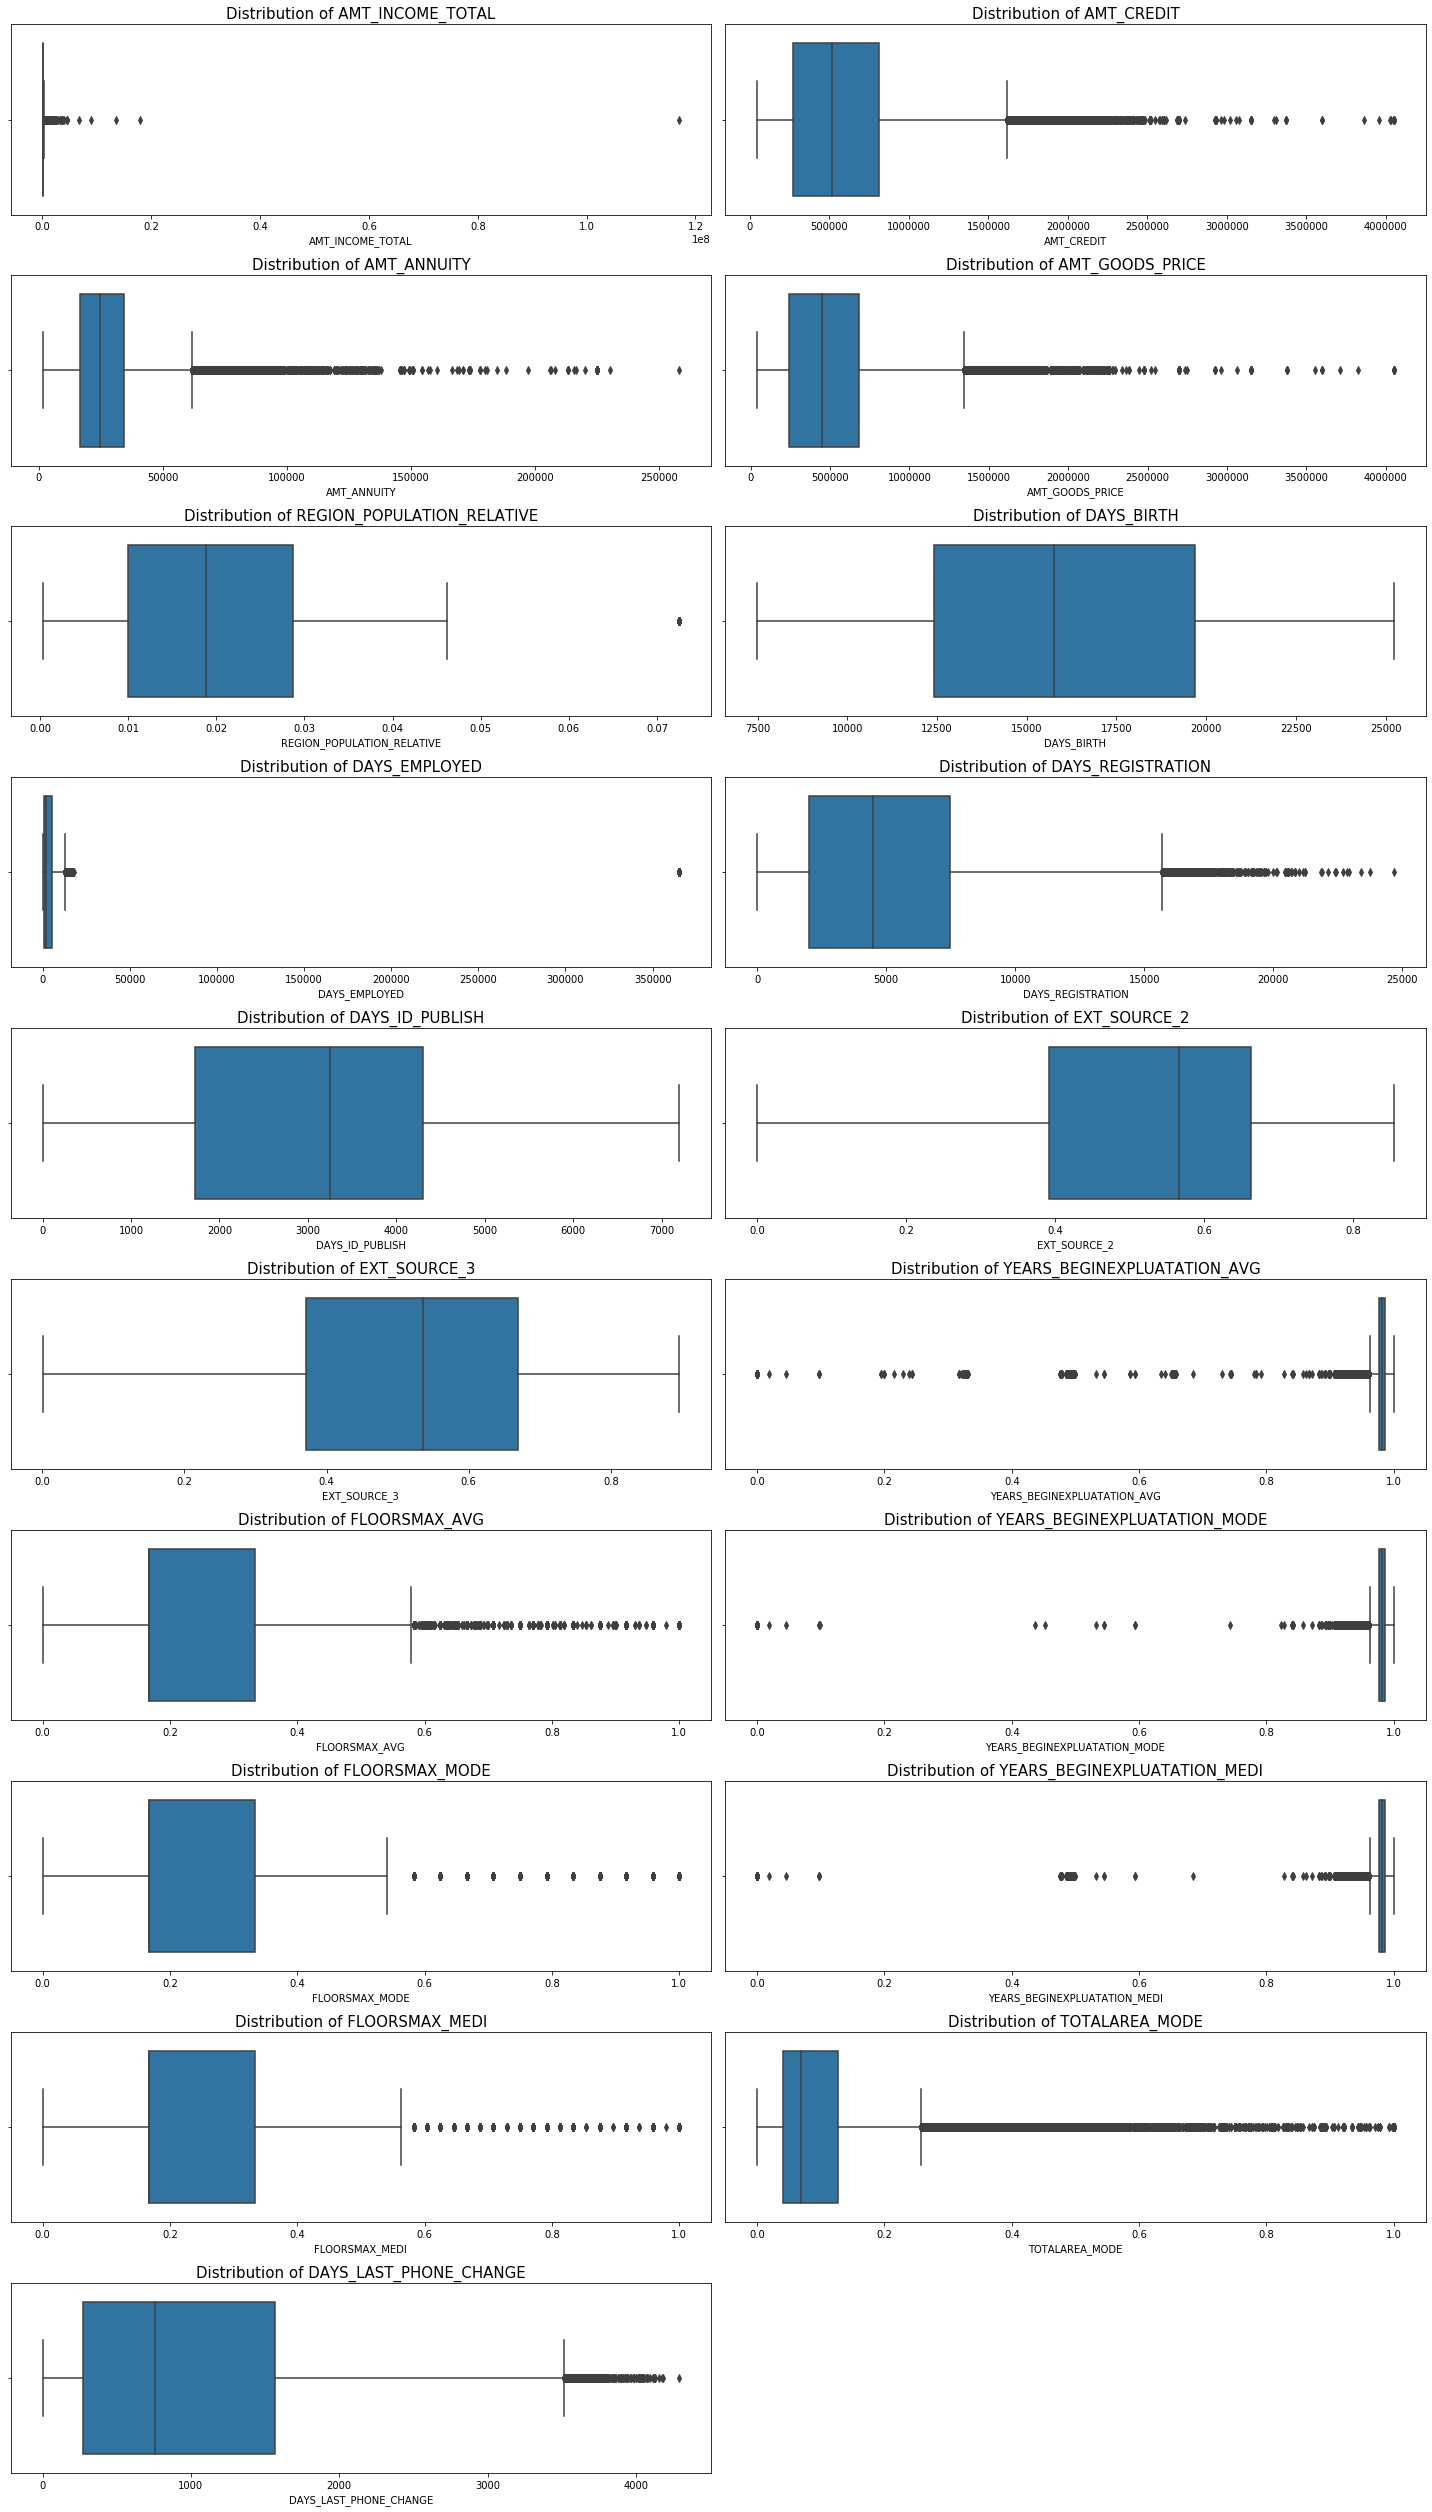

In [48]:
fig,ax = plt.subplots(nrows=10, ncols=2, figsize=(20,35))
for i, col in enumerate(columns_to_check):
    sns.boxplot(df_app[col] , ax = ax.flatten()[i])
    ax.flatten()[i].set_title('Distribution of '+col,fontsize=15)
fig.delaxes(ax[-1][1])
plt.tight_layout()
plt.show()

**Analyzing 5 Columns**
____
* AMT_INCOME_TOTAL
* AMT_CREDIT
* AMT_ANNUITY
* DAYS_EMPLOYED
* REGION_POPULATION_RELATIVE

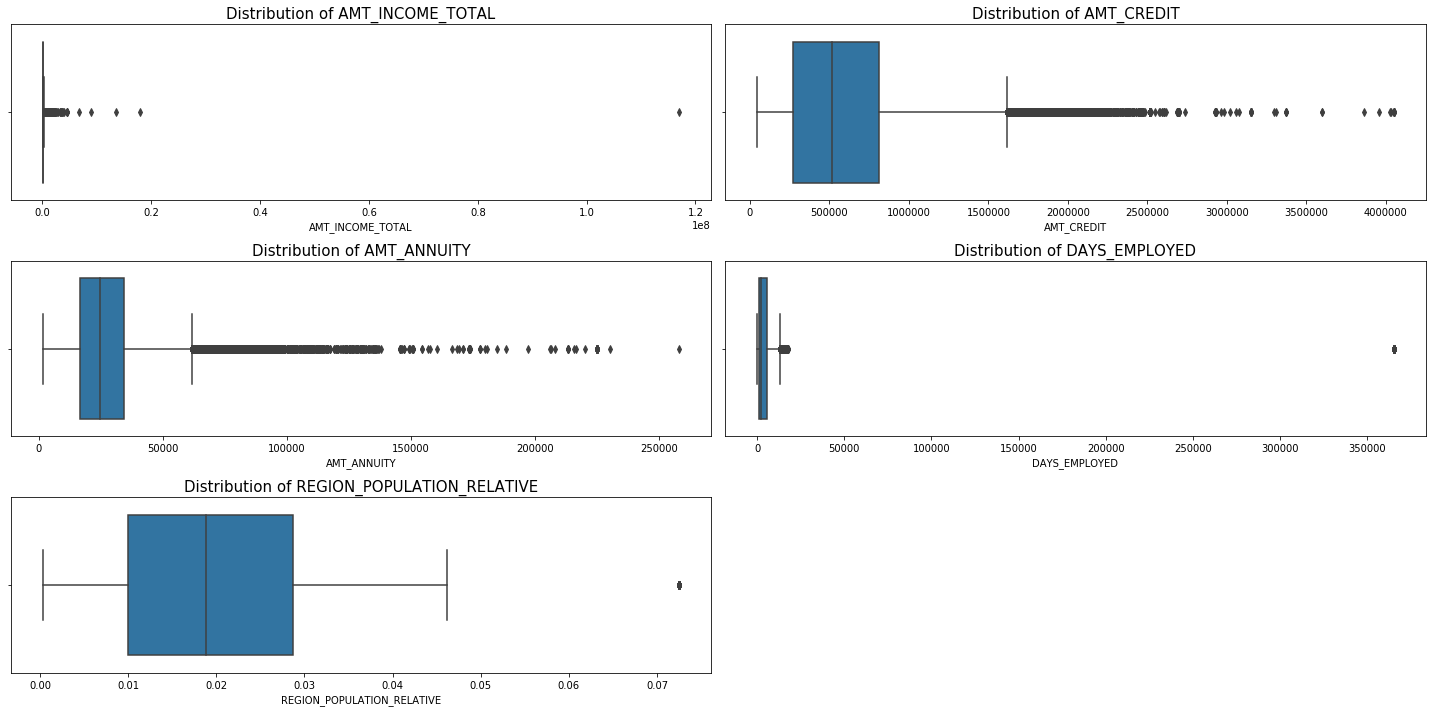

In [49]:
columns_to_check = ['AMT_INCOME_TOTAL','AMT_CREDIT','AMT_ANNUITY','DAYS_EMPLOYED','REGION_POPULATION_RELATIVE']
fig,ax = plt.subplots(nrows=3, ncols=2, figsize=(20,10))
for i, col in enumerate(columns_to_check):
    sns.boxplot(df_app[col] , ax = ax.flatten()[i])
    ax.flatten()[i].set_title('Distribution of '+col,fontsize=15)
fig.delaxes(ax[-1][1])
plt.tight_layout()
plt.show()

Most of these numeric variables have outliers, for few, the outliers.   
The spreads are higher for some attributes and much lower for other attributes in the order from wider spread to lower spread as  REGION_POPULATION_RELATIVE, AMT_CREDIT, AMT_ANNUITY, DAYS_EMPLOYED, AMT_INCOME_TOTAL respectively. This can be due to the higher outliers for most of the variables.

In [50]:
df_app[columns_to_check].describe()

AMT_INCOME_TOTAL    AMT_CREDIT    AMT_ANNUITY  DAYS_EMPLOYED  \
count      3.075110e+05  3.075110e+05  307499.000000  307511.000000   
mean       1.687979e+05  5.990260e+05   27108.573909   67724.742149   
std        2.371231e+05  4.024908e+05   14493.737315  139443.751806   
min        2.565000e+04  4.500000e+04    1615.500000       0.000000   
25%        1.125000e+05  2.700000e+05   16524.000000     933.000000   
50%        1.471500e+05  5.135310e+05   24903.000000    2219.000000   
75%        2.025000e+05  8.086500e+05   34596.000000    5707.000000   
max        1.170000e+08  4.050000e+06  258025.500000  365243.000000   

       REGION_POPULATION_RELATIVE  
count               307511.000000  
mean                     0.020868  
std                      0.013831  
min                      0.000290  
25%                      0.010006  
50%                      0.018850  
75%                      0.028663  
max                      0.072508

Days Employed has a maximum value of 365243(i.e. approx 1000 years) which is not possible. This can be a null value or an entry error  
    
  
  


**Plotting 95th Percentile for the selected columns**
___
  

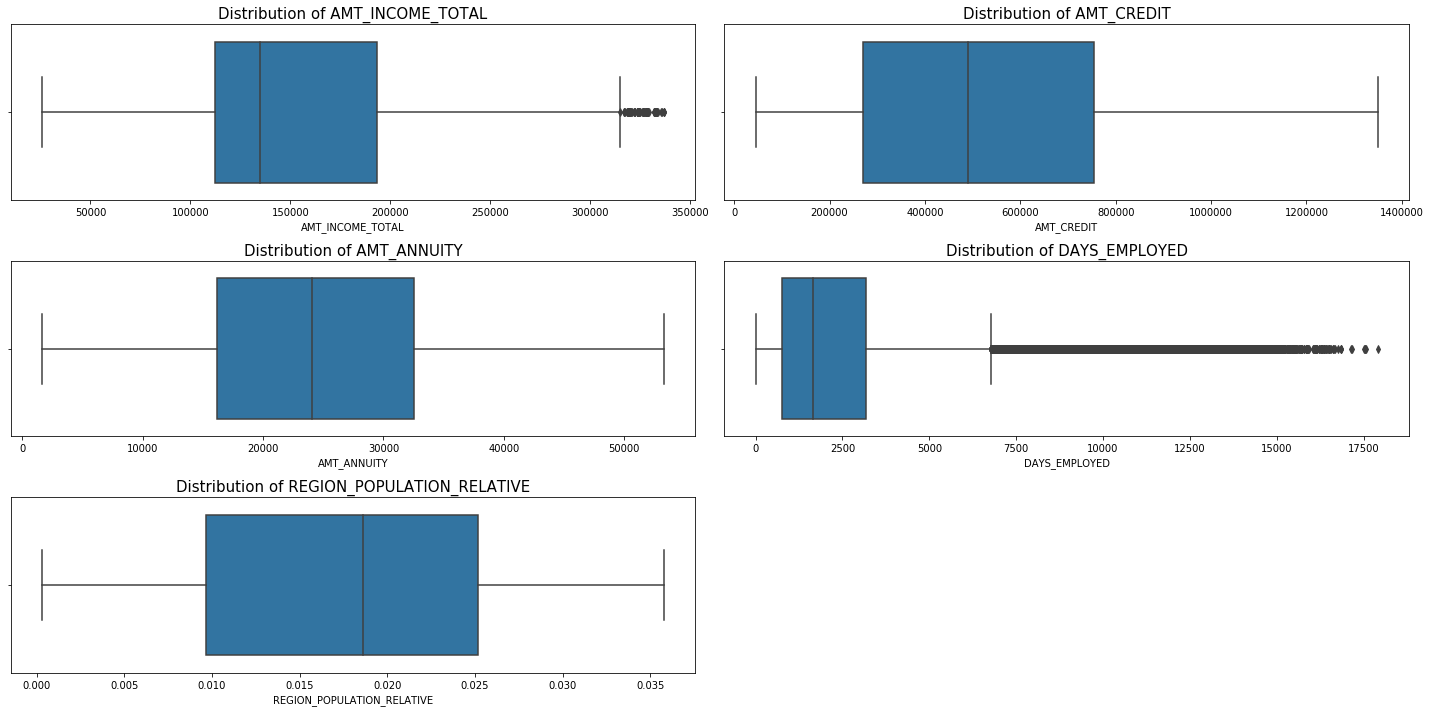

In [51]:
fig,ax = plt.subplots(nrows=3, ncols=2, figsize=(20,10))
for i, col in enumerate(columns_to_check):
    sns.boxplot(df_app[df_app[col]<np.nanpercentile(df_app[col], 95)][col] , ax = ax.flatten()[i])
    ax.flatten()[i].set_title('Distribution of '+col,fontsize=15)
fig.delaxes(ax[-1][1])
plt.tight_layout()
plt.show()

**It is observed that while plotting at 95th percentile most of the attributes tend to remove the outliers, However we are not removing any outlier for this EDA**  

AMT_CREDIT, AMT_ANNUITY, REGION_POPULATION_RELATIVE do not show any outliers for the 95th percentile. AMT_INCOME_TOTAL AND DAYS_EMPLOYED shows a wider spread at 95th percentile. Clearly there were some higher outlier values for these attributes.

### Binning of continuous variables
___

In [52]:
df_app[columns_to_check].describe()

AMT_INCOME_TOTAL    AMT_CREDIT    AMT_ANNUITY  DAYS_EMPLOYED  \
count      3.075110e+05  3.075110e+05  307499.000000  307511.000000   
mean       1.687979e+05  5.990260e+05   27108.573909   67724.742149   
std        2.371231e+05  4.024908e+05   14493.737315  139443.751806   
min        2.565000e+04  4.500000e+04    1615.500000       0.000000   
25%        1.125000e+05  2.700000e+05   16524.000000     933.000000   
50%        1.471500e+05  5.135310e+05   24903.000000    2219.000000   
75%        2.025000e+05  8.086500e+05   34596.000000    5707.000000   
max        1.170000e+08  4.050000e+06  258025.500000  365243.000000   

       REGION_POPULATION_RELATIVE  
count               307511.000000  
mean                     0.020868  
std                      0.013831  
min                      0.000290  
25%                      0.010006  
50%                      0.018850  
75%                      0.028663  
max                      0.072508

We are going to bin the Amount Data and the Days Employed into bins.  

- In case of AMT_INCOME_TOTAL, AMT_CREDIT & AMT_ANNUITY, we are quantile binning into 5 buckets.

- For Days Employed we will be quantile binning to 3 categories.

In [53]:
for col,bin_col in zip(['AMT_INCOME_TOTAL' ,'AMT_CREDIT' ,'AMT_ANNUITY'],
                       ['INCOME_BUCKET','CREDIT_BUCKET','ANNUITY_BUCKET']):
    df_app[bin_col] = pd.qcut(
        df_app[col],
        q=[0,0.20,0.40,0.60,0.80,1], 
        labels=['Very_Low','Low','Medium','High','Very_High'])

df_app[['AMT_INCOME_TOTAL' ,'AMT_CREDIT' ,'AMT_ANNUITY',
'INCOME_BUCKET','CREDIT_BUCKET','ANNUITY_BUCKET']].head()

AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY INCOME_BUCKET CREDIT_BUCKET  \
0          202500.0    406597.5      24700.5          High           Low   
1          270000.0   1293502.5      35698.5     Very_High     Very_High   
2           67500.0    135000.0       6750.0      Very_Low      Very_Low   
3          135000.0    312682.5      29686.5           Low           Low   
4          121500.0    513000.0      21865.5           Low        Medium   

  ANNUITY_BUCKET  
0         Medium  
1           High  
2       Very_Low  
3           High  
4            Low

In [54]:
df_app['DAYS_EMPLOYED_BUCKET'] = pd.qcut(df_app['DAYS_EMPLOYED'],
      q=[0,0.40,0.75,1], 
      labels=['Beginner','Inermediate','Advanced'])
  
df_app[['DAYS_EMPLOYED','DAYS_EMPLOYED_BUCKET']].head()

DAYS_EMPLOYED DAYS_EMPLOYED_BUCKET
0            637             Beginner
1           1188             Beginner
2            225             Beginner
3           3039          Inermediate
4           3038          Inermediate

**Plotting the Binned data**
___

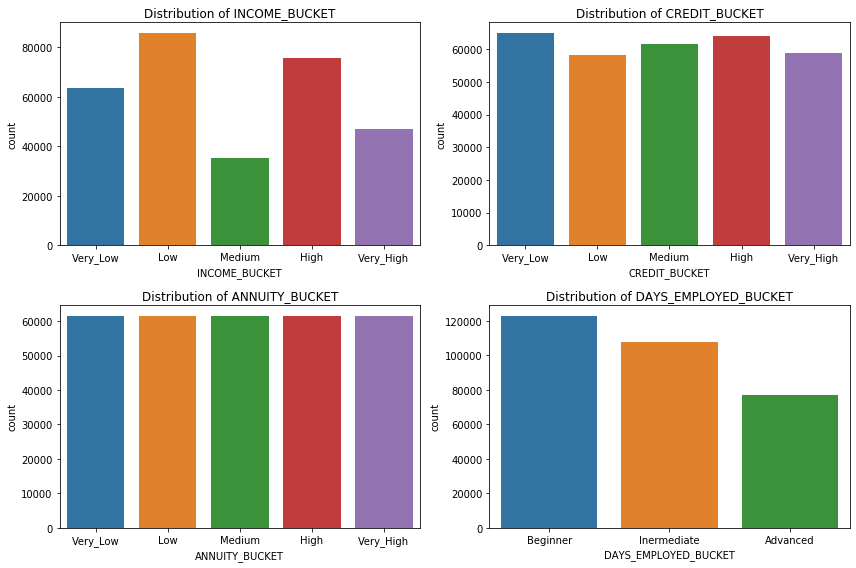

In [55]:
fig,ax = plt.subplots(nrows=2, ncols=2, figsize=(12,8))
for i, col in enumerate(['INCOME_BUCKET','CREDIT_BUCKET','ANNUITY_BUCKET','DAYS_EMPLOYED_BUCKET']):
    sns.countplot(df_app[col], ax = ax.flatten()[i])
    ax.flatten()[i].set_title('Distribution of '+col) 
plt.tight_layout()
plt.show()

From the above visualization it is observed that,
- Most of the clients availed the loan are in the LOW income bucket. Less number of loans are taken by those who draw a MEDIUM income.
- The Credit Bins show a fairly equal trend with a slight fluctuation among the groups. Number are high for the VERY-LOW bucket and less for the LOW and VERY HIGH bucket.
- The ANNUITY bucket show an equal trend and equal distribution amongst all bins. All the bins have an equal loan count.
- For the Days Employed, the most number of clients who took the loans are BEGINNERS, i.e. who started the career in recent past. The least number of Loans are availed by Most experienced personnels.

# Analysis
___


## Analyzing imbalance

#### TARGET Variable

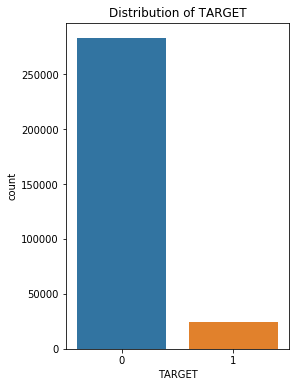

In [56]:
plt.figure(figsize=(4,6))
sns.countplot(df_app.TARGET)
plt.title('Distribution of TARGET')
plt.show()

In [57]:
print(df_app.TARGET.value_counts(),'\n')
print(df_app.TARGET.value_counts(normalize=True),'\n')
print((df_app.TARGET.value_counts(normalize=True)*100).round(1),'\n')

0    282686
1     24825
Name: TARGET, dtype: int64 

0    0.919271
1    0.080729
Name: TARGET, dtype: float64 

0    91.9
1     8.1
Name: TARGET, dtype: float64 



From the above analysis, it is clear that there are  approximately 91.9% of values of  TARGET as 0 and only 8.1% as 1 , i.e, **91.9%** clients with **No payment difficulties** and there are **8.1%** clients **with payment difficulties**
  
The difference in the Target variable is huge and hence there clearly is an imbalance, there are far more number of loans repaid on time, than those are defaulted

#### **Divide the data into Defaulters and non-defaulters (Target = 1 and Target = 0)**

In [58]:
df_def = df_app[df_app.TARGET==1]
df_ndef = df_app[df_app.TARGET==0]

## Correlation
___


### For complete data set

In [59]:
columns_to_check=list(df_app.columns)
columns_to_check.remove('SK_ID_CURR')
corr_df = df_app[columns_to_check].corr()
corr_df

AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
AMT_INCOME_TOTAL                      1.000000    0.156870     0.191657   
AMT_CREDIT                            0.156870    1.000000     0.770138   
AMT_ANNUITY                           0.191657    0.770138     1.000000   
AMT_GOODS_PRICE                       0.159610    0.986968     0.775109   
REGION_POPULATION_RELATIVE            0.074796    0.099738     0.118429   
DAYS_BIRTH                           -0.027261    0.055436    -0.009445   
DAYS_EMPLOYED                        -0.063835   -0.064319    -0.102851   
DAYS_REGISTRATION                    -0.027805   -0.009621    -0.038514   
DAYS_ID_PUBLISH                      -0.008506    0.006575    -0.011268   
EXT_SOURCE_2                          0.060925    0.131228     0.125804   
EXT_SOURCE_3                         -0.030229    0.043516     0.030752   
YEARS_BEGINEXPLUATATION_AVG           0.005658    0.006249     0.013298   
FLOORSMAX_AVG                         0.060171    0.103296     0.130174   
YEARS_BEGINEXPLUATATION_MODE          0.005284    0.004804     0.012555   
FLOORSMAX_MODE                        0.057675    0.100418     0.126302   
YEARS_BEGINEXPLUATATION_MEDI          0.005639    0.005765     0.012940   
FLOORSMAX_MEDI                        0.059682    0.102770     0.129179   
TOTALAREA_MODE                        0.041985    0.072818     0.090415   
DAYS_LAST_PHONE_CHANGE                0.018585    0.073701     0.063747   

                              AMT_GOODS_PRICE  REGION_POPULATION_RELATIVE  \
AMT_INCOME_TOTAL                     0.159610                    0.074796   
AMT_CREDIT                           0.986968                    0.099738   
AMT_ANNUITY                          0.775109                    0.118429   
AMT_GOODS_PRICE                      1.000000                    0.103520   
REGION_POPULATION_RELATIVE           0.103520                    1.000000   
DAYS_BIRTH                           0.053442                    0.029582   
DAYS_EMPLOYED                       -0.062265                   -0.004094   
DAYS_REGISTRATION                   -0.011565                    0.053820   
DAYS_ID_PUBLISH                      0.009267                    0.003993   
EXT_SOURCE_2                         0.139367                    0.198924   
EXT_SOURCE_3                         0.047717                   -0.006001   
YEARS_BEGINEXPLUATATION_AVG          0.007245                   -0.006683   
FLOORSMAX_AVG                        0.108512                    0.322652   
YEARS_BEGINEXPLUATATION_MODE         0.005799                   -0.006837   
FLOORSMAX_MODE                       0.105532                    0.303992   
YEARS_BEGINEXPLUATATION_MEDI         0.006839                   -0.006711   
FLOORSMAX_MEDI                       0.107936                    0.318319   
TOTALAREA_MODE                       0.077527                    0.202145   
DAYS_LAST_PHONE_CHANGE               0.076313                    0.044013   

                              DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  \
AMT_INCOME_TOTAL               -0.027261      -0.063835          -0.027805   
AMT_CREDIT                      0.055436      -0.064319          -0.009621   
AMT_ANNUITY                    -0.009445      -0.102851          -0.038514   
AMT_GOODS_PRICE                 0.053442      -0.062265          -0.011565   
REGION_POPULATION_RELATIVE      0.029582      -0.004094           0.053820   
DAYS_BIRTH                      1.000000       0.623941           0.331912   
DAYS_EMPLOYED                   0.623941       1.000000           0.214573   
DAYS_REGISTRATION               0.331912       0.214573           1.000000   
DAYS_ID_PUBLISH                 0.272691       0.274842           0.101896   
EXT_SOURCE_2                    0.091996      -0.018228           0.059913   
EXT_SOURCE_3                    0.205478       0.117088           0.107549   
YEARS_BEGINEXPLUATATION_AVG    -0.000744       0.008

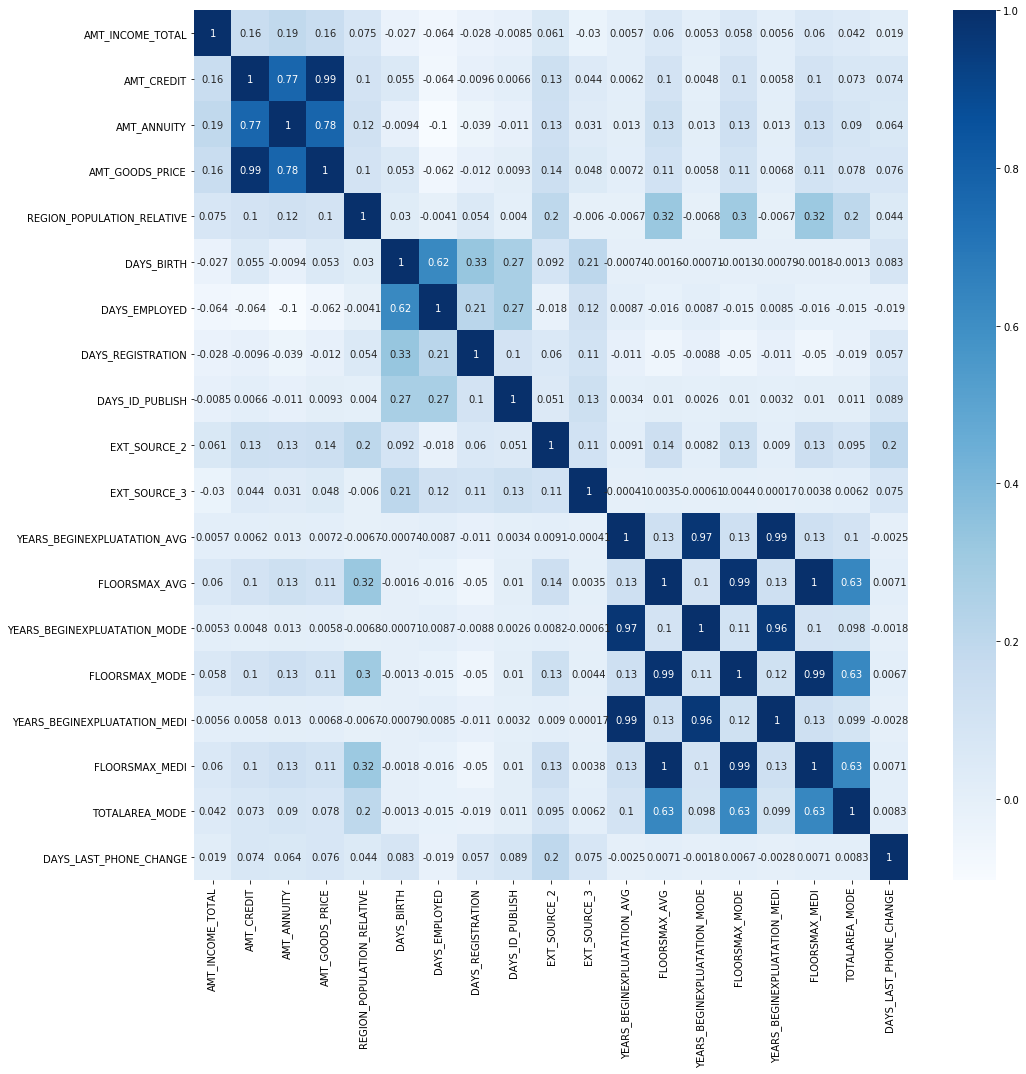

In [60]:
plt.figure(figsize=(16,16))
sns.heatmap(corr_df,annot=True,cmap='Blues')
plt.show()

**Tabulating the Correlation**  
Top 10 Correlated Attributes


In [61]:
corr_df = df_app[columns_to_check].corr()
corr_df=corr_df.where(np.triu(np.ones(corr_df.shape,'bool'),1)).unstack().reset_index()
corr_df.columns=['Attribute_1','Attribute_2','Correlation']
corr_df.dropna(subset=['Correlation'],inplace=True)
corr_df_all = corr_df.reindex(corr_df.Correlation.abs().sort_values(ascending=False).index).reset_index(drop=True)
corr_df_all.head(10)

Attribute_1                   Attribute_2  Correlation
0                FLOORSMAX_MEDI                 FLOORSMAX_AVG     0.997034
1  YEARS_BEGINEXPLUATATION_MEDI   YEARS_BEGINEXPLUATATION_AVG     0.993825
2                FLOORSMAX_MEDI                FLOORSMAX_MODE     0.988237
3               AMT_GOODS_PRICE                    AMT_CREDIT     0.986968
4                FLOORSMAX_MODE                 FLOORSMAX_AVG     0.985689
5  YEARS_BEGINEXPLUATATION_MODE   YEARS_BEGINEXPLUATATION_AVG     0.971893
6  YEARS_BEGINEXPLUATATION_MEDI  YEARS_BEGINEXPLUATATION_MODE     0.963539
7               AMT_GOODS_PRICE                   AMT_ANNUITY     0.775109
8                   AMT_ANNUITY                    AMT_CREDIT     0.770138
9                TOTALAREA_MODE                 FLOORSMAX_AVG     0.632595

### For Non-defaulters dataset

In [62]:
corr_df = df_ndef[columns_to_check].corr()
corr_df

AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
AMT_INCOME_TOTAL                      1.000000    0.342799     0.418953   
AMT_CREDIT                            0.342799    1.000000     0.771309   
AMT_ANNUITY                           0.418953    0.771309     1.000000   
AMT_GOODS_PRICE                       0.349462    0.987250     0.776686   
REGION_POPULATION_RELATIVE            0.167851    0.100604     0.120988   
DAYS_BIRTH                           -0.062609    0.047378    -0.012263   
DAYS_EMPLOYED                        -0.140392   -0.070104    -0.104978   
DAYS_REGISTRATION                    -0.064937   -0.013477    -0.039436   
DAYS_ID_PUBLISH                      -0.022896    0.001464    -0.014113   
EXT_SOURCE_2                          0.139598    0.129140     0.126615   
EXT_SOURCE_3                         -0.072401    0.036085     0.028051   
YEARS_BEGINEXPLUATATION_AVG           0.016485    0.005943     0.014059   
FLOORSMAX_AVG                         0.181891    0.102921     0.130944   
YEARS_BEGINEXPLUATATION_MODE          0.015393    0.004842     0.013588   
FLOORSMAX_MODE                        0.174416    0.100024     0.127014   
YEARS_BEGINEXPLUATATION_MEDI          0.016431    0.005480     0.013679   
FLOORSMAX_MEDI                        0.180458    0.102374     0.129959   
TOTALAREA_MODE                        0.125714    0.072281     0.090966   
DAYS_LAST_PHONE_CHANGE                0.041338    0.069540     0.062013   

                              AMT_GOODS_PRICE  REGION_POPULATION_RELATIVE  \
AMT_INCOME_TOTAL                     0.349462                    0.167851   
AMT_CREDIT                           0.987250                    0.100604   
AMT_ANNUITY                          0.776686                    0.120988   
AMT_GOODS_PRICE                      1.000000                    0.103827   
REGION_POPULATION_RELATIVE           0.103827                    1.000000   
DAYS_BIRTH                           0.044565                    0.025244   
DAYS_EMPLOYED                       -0.068609                   -0.007198   
DAYS_REGISTRATION                   -0.015916                    0.052083   
DAYS_ID_PUBLISH                      0.003649                    0.001071   
EXT_SOURCE_2                         0.135694                    0.198493   
EXT_SOURCE_3                         0.038908                   -0.012486   
YEARS_BEGINEXPLUATATION_AVG          0.006982                   -0.006282   
FLOORSMAX_AVG                        0.107686                    0.325347   
YEARS_BEGINEXPLUATATION_MODE         0.005875                   -0.006421   
FLOORSMAX_MODE                       0.104693                    0.306551   
YEARS_BEGINEXPLUATATION_MEDI         0.006597                   -0.006307   
FLOORSMAX_MEDI                       0.107089                    0.321077   
TOTALAREA_MODE                       0.076616                    0.203852   
DAYS_LAST_PHONE_CHANGE               0.071373                    0.041164   

                              DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  \
AMT_INCOME_TOTAL               -0.062609      -0.140392          -0.064937   
AMT_CREDIT                      0.047378      -0.070104          -0.013477   
AMT_ANNUITY                    -0.012263      -0.104978          -0.039436   
AMT_GOODS_PRICE                 0.044565      -0.068609          -0.015916   
REGION_POPULATION_RELATIVE      0.025244      -0.007198           0.052083   
DAYS_BIRTH                      1.000000       0.626114           0.333151   
DAYS_EMPLOYED                   0.626114       1.000000           0.214511   
DAYS_REGISTRATION               0.333151       0.214511           1.000000   
DAYS_ID_PUBLISH                 0.271314       0.276663           0.100236   
EXT_SOURCE_2                    0.078158      -0.028530           0.052503   
EXT_SOURCE_3                    0.197287       0.111995           0.103476   
YEARS_BEGINEXPLUATATION_AVG    -0.001982       0.007

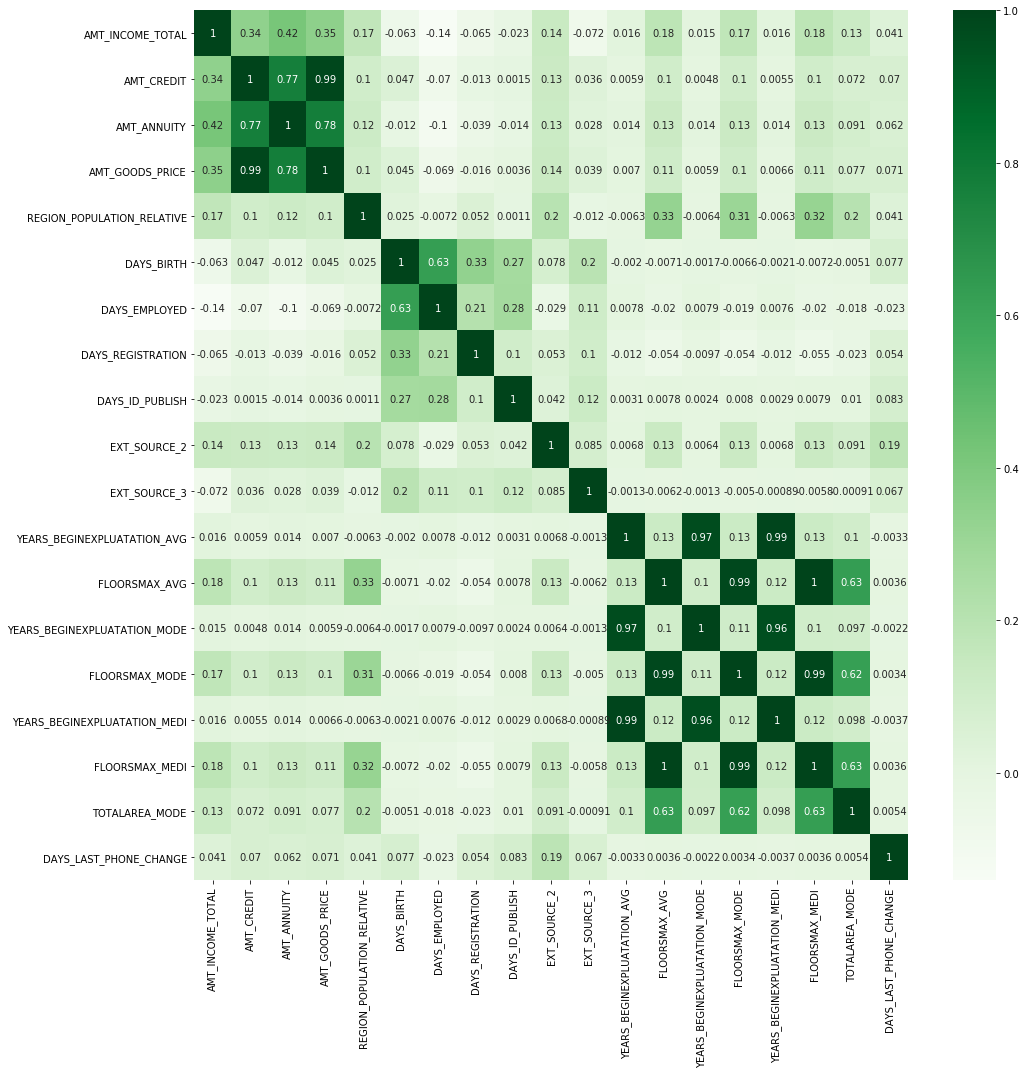

In [63]:
plt.figure(figsize=(16,16))
sns.heatmap(corr_df,annot=True,cmap='Greens')
plt.show()

**Tabulating the Correlation**  
Top 10 Highly Correlated Attributes

In [64]:
corr_df = df_ndef[columns_to_check].corr()
corr_df=corr_df.where(np.triu(np.ones(corr_df.shape,'bool'),1)).unstack().reset_index()
corr_df.columns=['Attribute_1_NonDefaulter','Attribute_2_NonDefaulter','Correlation_NonDefaulter']
corr_df.dropna(subset=['Correlation_NonDefaulter'],inplace=True)
corr_df_ndef = corr_df.reindex(corr_df.Correlation_NonDefaulter.abs().sort_values(ascending=False).index).reset_index(drop=True)
corr_df_ndef.head(10)

Attribute_1_NonDefaulter      Attribute_2_NonDefaulter  \
0                FLOORSMAX_MEDI                 FLOORSMAX_AVG   
1  YEARS_BEGINEXPLUATATION_MEDI   YEARS_BEGINEXPLUATATION_AVG   
2                FLOORSMAX_MEDI                FLOORSMAX_MODE   
3               AMT_GOODS_PRICE                    AMT_CREDIT   
4                FLOORSMAX_MODE                 FLOORSMAX_AVG   
5  YEARS_BEGINEXPLUATATION_MODE   YEARS_BEGINEXPLUATATION_AVG   
6  YEARS_BEGINEXPLUATATION_MEDI  YEARS_BEGINEXPLUATATION_MODE   
7               AMT_GOODS_PRICE                   AMT_ANNUITY   
8                   AMT_ANNUITY                    AMT_CREDIT   
9                TOTALAREA_MODE                 FLOORSMAX_AVG   

   Correlation_NonDefaulter  
0                  0.997018  
1                  0.993582  
2                  0.988153  
3                  0.987250  
4                  0.985603  
5                  0.971032  
6                  0.962064  
7                  0.776686  
8                  0.771309  
9                  0.631589

### For Defaulters dataset

In [65]:
corr_df = df_def[columns_to_check].corr()
corr_df

AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
AMT_INCOME_TOTAL                      1.000000    0.038131     0.046421   
AMT_CREDIT                            0.038131    1.000000     0.752195   
AMT_ANNUITY                           0.046421    0.752195     1.000000   
AMT_GOODS_PRICE                       0.037583    0.983103     0.752699   
REGION_POPULATION_RELATIVE            0.009135    0.069161     0.071690   
DAYS_BIRTH                           -0.003096    0.135316     0.014303   
DAYS_EMPLOYED                        -0.014977    0.001930    -0.081207   
DAYS_REGISTRATION                    -0.000158    0.025854    -0.034279   
DAYS_ID_PUBLISH                       0.004215    0.052329     0.016767   
EXT_SOURCE_2                          0.007154    0.120848     0.116305   
EXT_SOURCE_3                         -0.015110    0.077698     0.041415   
YEARS_BEGINEXPLUATATION_AVG           0.001642    0.006840     0.001732   
FLOORSMAX_AVG                         0.009801    0.090926     0.107146   
YEARS_BEGINEXPLUATATION_MODE          0.001530    0.000958    -0.002979   
FLOORSMAX_MODE                        0.009299    0.088606     0.104314   
YEARS_BEGINEXPLUATATION_MEDI          0.001636    0.005950     0.001626   
FLOORSMAX_MEDI                        0.009652    0.090833     0.105975   
TOTALAREA_MODE                        0.006451    0.067370     0.073045   
DAYS_LAST_PHONE_CHANGE                0.002429    0.110851     0.079870   

                              AMT_GOODS_PRICE  REGION_POPULATION_RELATIVE  \
AMT_INCOME_TOTAL                     0.037583                    0.009135   
AMT_CREDIT                           0.983103                    0.069161   
AMT_ANNUITY                          0.752699                    0.071690   
AMT_GOODS_PRICE                      1.000000                    0.076049   
REGION_POPULATION_RELATIVE           0.076049                    1.000000   
DAYS_BIRTH                           0.135810                    0.048190   
DAYS_EMPLOYED                        0.006642                    0.015532   
DAYS_REGISTRATION                    0.025679                    0.056222   
DAYS_ID_PUBLISH                      0.056086                    0.015537   
EXT_SOURCE_2                         0.131184                    0.169751   
EXT_SOURCE_3                         0.078754                   -0.009810   
YEARS_BEGINEXPLUATATION_AVG          0.006178                   -0.016963   
FLOORSMAX_AVG                        0.097623                    0.261106   
YEARS_BEGINEXPLUATATION_MODE         0.000319                   -0.017182   
FLOORSMAX_MODE                       0.095210                    0.244463   
YEARS_BEGINEXPLUATATION_MEDI         0.005336                   -0.017148   
FLOORSMAX_MEDI                       0.097508                    0.255584   
TOTALAREA_MODE                       0.073896                    0.157830   
DAYS_LAST_PHONE_CHANGE               0.118303                    0.055139   

                              DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  \
AMT_INCOME_TOTAL               -0.003096      -0.014977          -0.000158   
AMT_CREDIT                      0.135316       0.001930           0.025854   
AMT_ANNUITY                     0.014303      -0.081207          -0.034279   
AMT_GOODS_PRICE                 0.135810       0.006642           0.025679   
REGION_POPULATION_RELATIVE      0.048190       0.015532           0.056222   
DAYS_BIRTH                      1.000000       0.582185           0.289114   
DAYS_EMPLOYED                   0.582185       1.000000           0.192455   
DAYS_REGISTRATION               0.289114       0.192455           1.000000   
DAYS_ID_PUBLISH                 0.252863       0.229090           0.096833   
EXT_SOURCE_2                    0.108662       0.001100           0.069996   
EXT_SOURCE_3                    0.171621       0.096229           0.086099   
YEARS_BEGINEXPLUATATION_AVG     0.005103       0.015

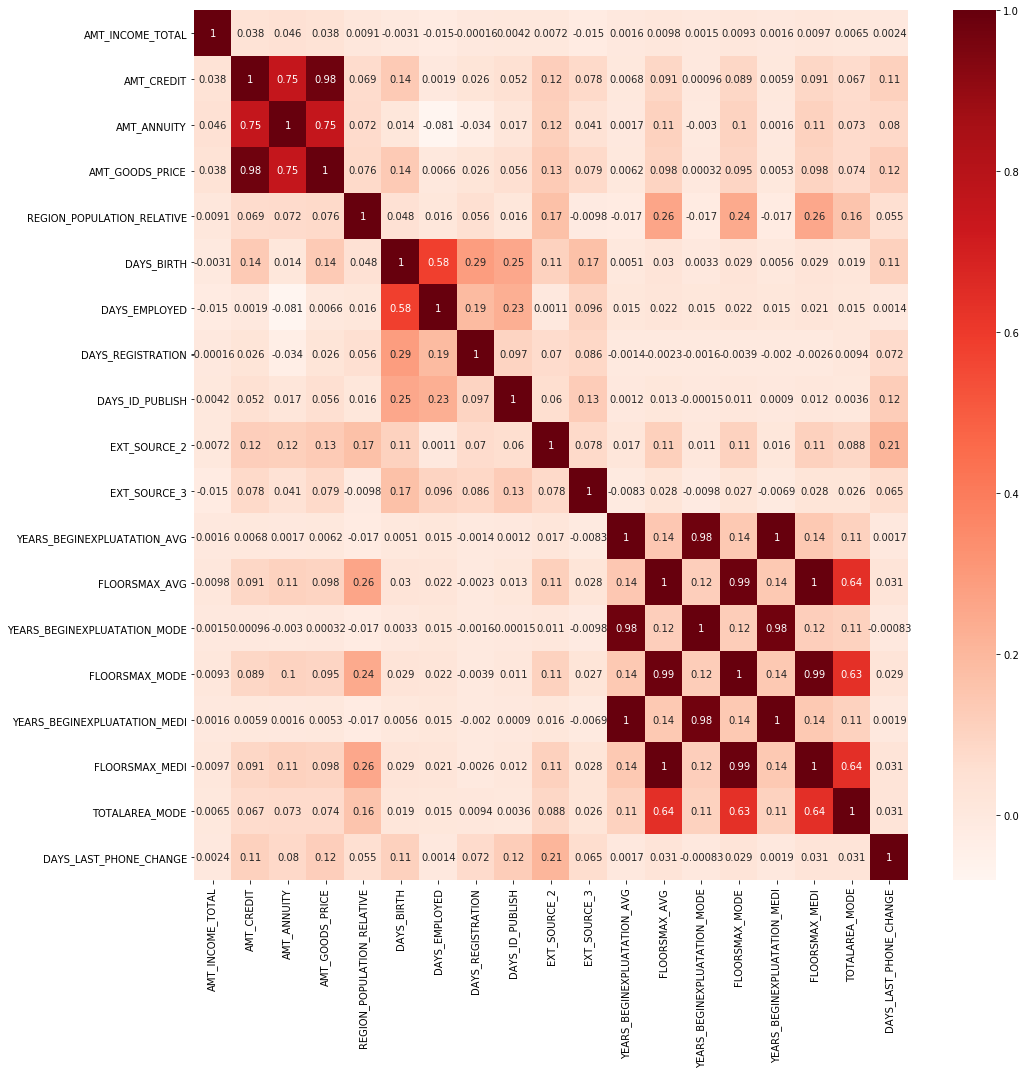

In [66]:
plt.figure(figsize=(16,16))
sns.heatmap(corr_df,annot=True,cmap='Reds')
plt.show()

**Tabulating the Correlation**  
Top 10 Highly Correlated Attributes


In [67]:
corr_df = df_def[columns_to_check].corr()
corr_df=corr_df.where(np.triu(np.ones(corr_df.shape,'bool'),1)).unstack().reset_index()
corr_df.columns=['Attribute_1_Defaulter','Attribute_2_Defaulter','Correlation_Defaulter']
corr_df.dropna(subset=['Correlation_Defaulter'],inplace=True)
corr_df_def = corr_df.reindex(corr_df.Correlation_Defaulter.abs().sort_values(ascending=False).index).reset_index(drop=True)
corr_df_def.head(10)

Attribute_1_Defaulter         Attribute_2_Defaulter  \
0                FLOORSMAX_MEDI                 FLOORSMAX_AVG   
1  YEARS_BEGINEXPLUATATION_MEDI   YEARS_BEGINEXPLUATATION_AVG   
2                FLOORSMAX_MEDI                FLOORSMAX_MODE   
3                FLOORSMAX_MODE                 FLOORSMAX_AVG   
4               AMT_GOODS_PRICE                    AMT_CREDIT   
5  YEARS_BEGINEXPLUATATION_MODE   YEARS_BEGINEXPLUATATION_AVG   
6  YEARS_BEGINEXPLUATATION_MEDI  YEARS_BEGINEXPLUATATION_MODE   
7               AMT_GOODS_PRICE                   AMT_ANNUITY   
8                   AMT_ANNUITY                    AMT_CREDIT   
9                TOTALAREA_MODE                 FLOORSMAX_AVG   

   Correlation_Defaulter  
0               0.997187  
1               0.996124  
2               0.989195  
3               0.986594  
4               0.983103  
5               0.980466  
6               0.978073  
7               0.752699  
8               0.752195  
9               0.640754

### Summary
Top 20 Highly correlated variables


In [68]:
pd.concat([corr_df_ndef,corr_df_def],axis=1).head(20)

Attribute_1_NonDefaulter      Attribute_2_NonDefaulter  \
0                 FLOORSMAX_MEDI                 FLOORSMAX_AVG   
1   YEARS_BEGINEXPLUATATION_MEDI   YEARS_BEGINEXPLUATATION_AVG   
2                 FLOORSMAX_MEDI                FLOORSMAX_MODE   
3                AMT_GOODS_PRICE                    AMT_CREDIT   
4                 FLOORSMAX_MODE                 FLOORSMAX_AVG   
5   YEARS_BEGINEXPLUATATION_MODE   YEARS_BEGINEXPLUATATION_AVG   
6   YEARS_BEGINEXPLUATATION_MEDI  YEARS_BEGINEXPLUATATION_MODE   
7                AMT_GOODS_PRICE                   AMT_ANNUITY   
8                    AMT_ANNUITY                    AMT_CREDIT   
9                 TOTALAREA_MODE                 FLOORSMAX_AVG   
10                TOTALAREA_MODE                FLOORSMAX_MEDI   
11                 DAYS_EMPLOYED                    DAYS_BIRTH   
12                TOTALAREA_MODE                FLOORSMAX_MODE   
13                   AMT_ANNUITY              AMT_INCOME_TOTAL   
14               AMT_GOODS_PRICE              AMT_INCOME_TOTAL   
15                    AMT_CREDIT              AMT_INCOME_TOTAL   
16             DAYS_REGISTRATION                    DAYS_BIRTH   
17                 FLOORSMAX_AVG    REGION_POPULATION_RELATIVE   
18                FLOORSMAX_MEDI    REGION_POPULATION_RELATIVE   
19                FLOORSMAX_MODE    REGION_POPULATION_RELATIVE   

    Correlation_NonDefaulter         Attribute_1_Defaulter  \
0                   0.997018                FLOORSMAX_MEDI   
1                   0.993582  YEARS_BEGINEXPLUATATION_MEDI   
2                   0.988153                FLOORSMAX_MEDI   
3                   0.987250                FLOORSMAX_MODE   
4                   0.985603               AMT_GOODS_PRICE   
5                   0.971032  YEARS_BEGINEXPLUATATION_MODE   
6                   0.962064  YEARS_BEGINEXPLUATATION_MEDI   
7                   0.776686               AMT_GOODS_PRICE   
8                   0.771309                   AMT_ANNUITY   
9                   0.631589                TOTALAREA_MODE   
10                  0.628971                TOTALAREA_MODE   
11                  0.626114                TOTALAREA_MODE   
12                  0.624333                 DAYS_EMPLOYED   
13                  0.418953             DAYS_REGISTRATION   
14                  0.349462                 FLOORSMAX_AVG   
15                  0.342799                FLOORSMAX_MEDI   
16                  0.333151               DAYS_ID_PUBLISH   
17                  0.325347                FLOORSMAX_MODE   
18                  0.321077               DAYS_ID_PUBLISH   
19                  0.306551        DAYS_LAST_PHONE_CHANGE   

           Attribute_2_Defaulter  Correlation_Defaulter  
0                  FLOORSMAX_AVG               0.997187  
1    YEARS_BEGINEXPLUATATION_AVG               0.996124  
2                 FLOORSMAX_MODE               0.989195  
3                  FLOORSMAX_AVG               0.986594  
4                     AMT_CREDIT               0.983103  
5    YEARS_BEGINEXPLUATATION_AVG               0.980466  
6   YEARS_BEGINEXPLUATATION_MODE               0.978073  
7                    AMT_ANNUITY               0.752699  
8                     AMT_CREDIT               0.752195  
9                  FLOORSMAX_AVG               0.640754  
10                FLOORSMAX_MEDI               0.637900  
11                FLOORSMAX_MODE               0.633972  
12                    DAYS_BIRTH               0.582185  
13                    DAYS_BIRTH               0.289114  
14    REGION_POPULATION_RELATIVE               0.261106  
15    REGION_POPULATION_RELATIVE               0.255584  
16                    DAYS_BIRTH               0.252863  
17    REGION_POPULATION_RELATIVE               0.244463  
18                 DAYS_EMPLOYED               0.229090  
19                  EXT_SOURCE_2               0.207900

**Top 10 correlation are same for both default and non-default datasets**  
Only that the 	```AMT_GOODS_PRICE vs	AMT_CREDIT```  and   ```FLOORSMAX_MODE vs	FLOORSMAX_AVG```   are interchanged ate position 4 and 5

## Univariate Analysis
___

### 1. Continuous Variable

In [69]:
df_app.select_dtypes([int,float,'int64','float64']).columns

Index(['SK_ID_CURR', 'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY',
       'AMT_GOODS_PRICE', 'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH',
       'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'EXT_SOURCE_2',
       'EXT_SOURCE_3', 'YEARS_BEGINEXPLUATATION_AVG', 'FLOORSMAX_AVG',
       'YEARS_BEGINEXPLUATATION_MODE', 'FLOORSMAX_MODE',
       'YEARS_BEGINEXPLUATATION_MEDI', 'FLOORSMAX_MEDI', 'TOTALAREA_MODE',
       'DAYS_LAST_PHONE_CHANGE'],
      dtype='object')

In [70]:
columns_to_plot = ['AMT_INCOME_TOTAL','AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE',
                   'REGION_POPULATION_RELATIVE','DAYS_EMPLOYED', 'DAYS_REGISTRATION','DAYS_LAST_PHONE_CHANGE']

#### **Using Histograms**

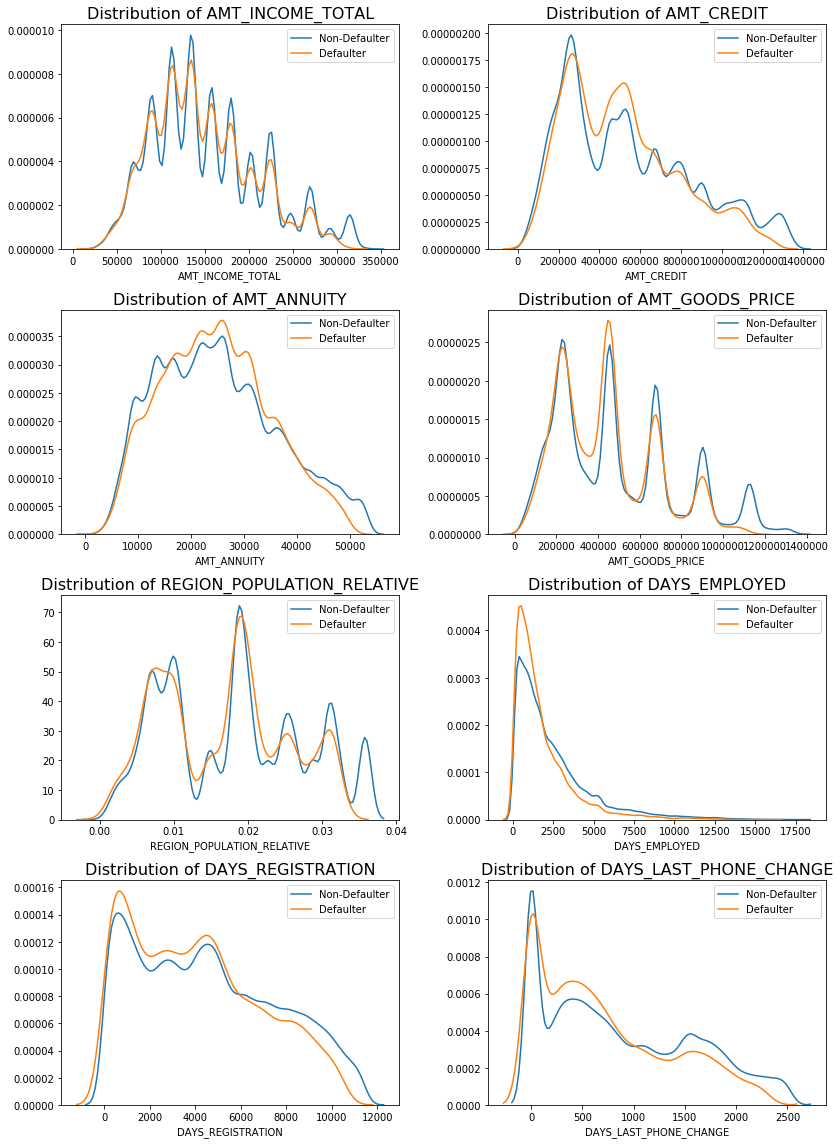

In [71]:
# Histograms
fig,ax = plt.subplots(nrows=4, ncols=2, figsize=(12,16))
for i, col in enumerate(columns_to_plot):

  #95th percentile to manage the Outliers
    temp_df_n = df_ndef[df_ndef[col]<np.nanpercentile(df_ndef[col], 95)][col] 
    temp_df = df_def[df_def[col]<np.nanpercentile(df_def[col], 95)][col] 

  # #100th percentile 
  # temp_df_n = df_ndef#
  # temp_df = df_def#
  
    sns.distplot(temp_df_n, ax = ax.flatten()[i], hist=False, label='Non-Defaulter')
    sns.distplot(temp_df, ax = ax.flatten()[i], hist=False, label='Defaulter')
  
    ax.flatten()[i].set_title('Distribution of '+col,fontsize=16)

plt.tight_layout()
plt.show()                  

#### **Using Box Plots**

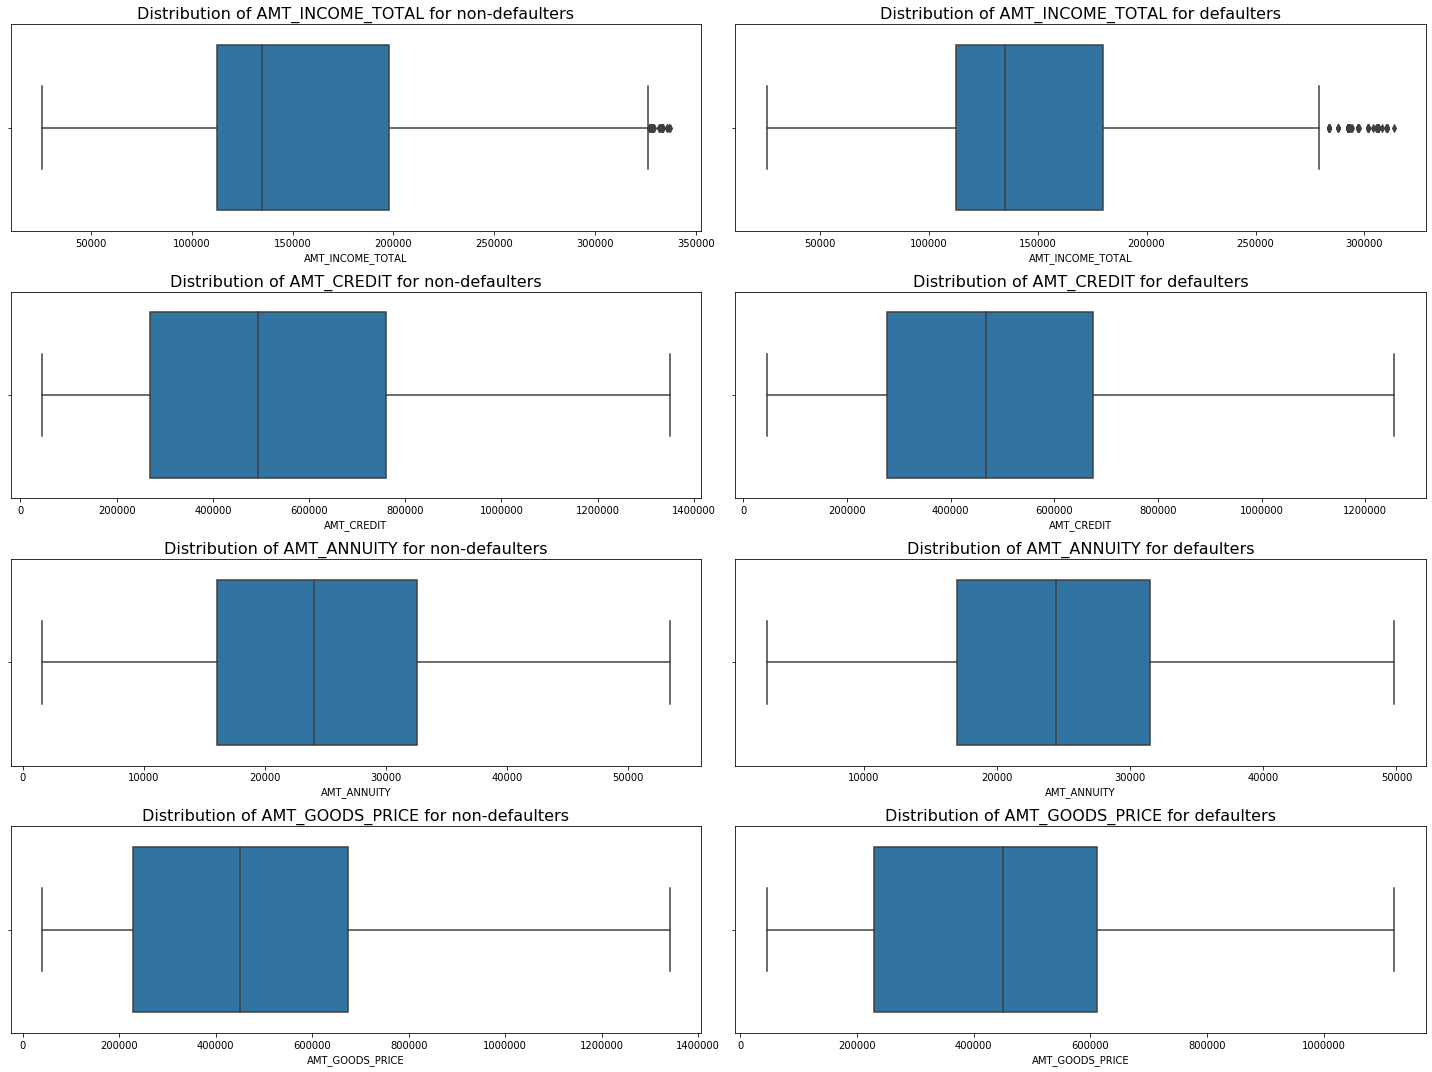

In [72]:
# Box Plots - Set 1
fig,ax = plt.subplots(nrows=4, ncols=2, figsize=(20,15))
for i, col in enumerate(columns_to_plot[:4]):

  #95th percentile to manage the Outliers
    temp_df_n = df_ndef[df_ndef[col]<np.nanpercentile(df_ndef[col], 95)][col] 
    temp_df = df_def[df_def[col]<np.nanpercentile(df_def[col], 95)][col] 

  # #100th percentile 
  # temp_df_n = df_ndef#
  # temp_df = df_def#

    sns.boxplot(temp_df_n, ax = ax.flatten()[i*2])
    ax.flatten()[i*2].set_title('Distribution of '+col+' for non-defaulters',fontsize=16)

    sns.boxplot(temp_df, ax = ax.flatten()[i*2+1])
    ax.flatten()[i*2+1].set_title('Distribution of '+col+' for defaulters',fontsize=16)  
plt.tight_layout()
plt.show()   

**Set 1:**   
* ***AMT_INCOME_TOTAL :*** For non-defaulters outliers are comparatively lesser than  the defaulters. Non-Defaulters Inter-Quartile Range is larger (wider spread) than the defaulters, however the median is approximately same irrespective of the defaulters/non-defaulters.  


  
* ***AMT_CREDIT :*** Both non-defaulters and defaulters do not show any outliers for data at 95th percentile. Non-Defaulters Inter-Quartile Range is larger (wider spread) than the defaulters, however the median is approximately same irrespective of the defaulters/non-defaulters  


  
* ***AMT_ANNUITY :*** Both non-defaulters and defaulters do not show any outliers for 95th percentile and the IQR shows equal trend, though bit larger for non-defaulters.  


  
* ***AMT_GOODS_PRICE :*** Both non-defaulters and defaulters do not show any outliers for 95th percentile. Non-Defaulters Inter-Quartile Range is larger (wider spread) than the defaulters, however the median is approximately same irrespective of the defaulters/non-defaulters  

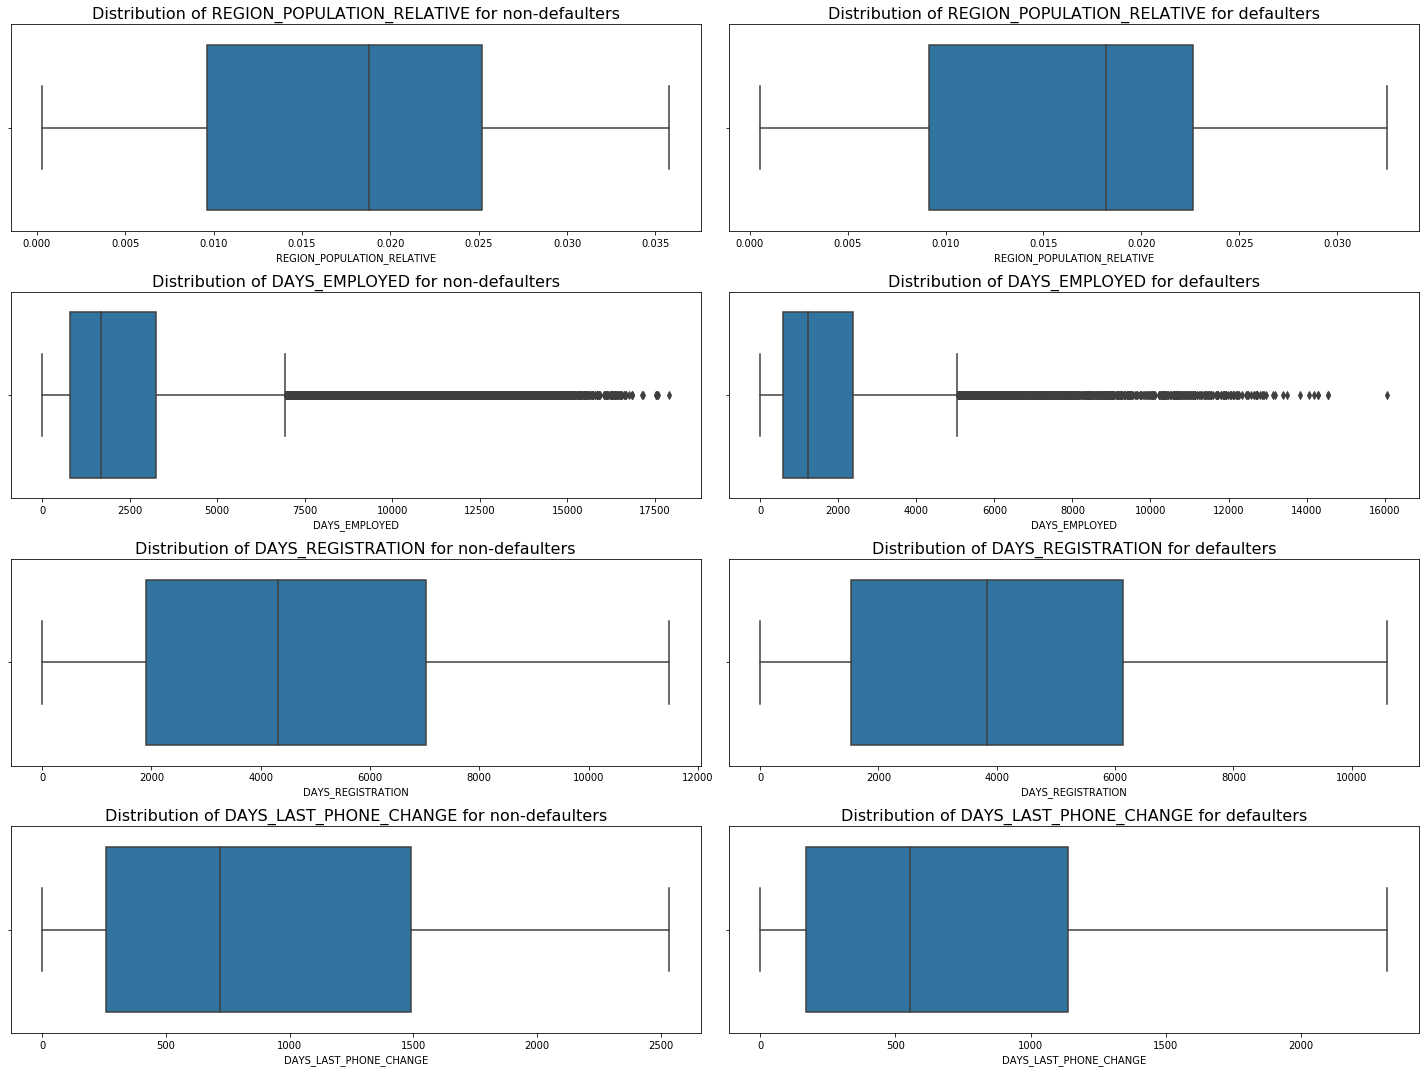

In [73]:
# Box Plots - Set 2
fig,ax = plt.subplots(nrows=4, ncols=2, figsize=(20,15))
for i, col in enumerate(columns_to_plot[4:]):

  #95th percentile to manage the Outliers
    temp_df_n = df_ndef[df_ndef[col]<np.nanpercentile(df_ndef[col], 95)][col] 
    temp_df = df_def[df_def[col]<np.nanpercentile(df_def[col], 95)][col] 

  # #100th percentile 
  # temp_df_n = df_ndef#
  # temp_df = df_def#

    sns.boxplot(temp_df_n, ax = ax.flatten()[i*2])
    ax.flatten()[i*2].set_title('Distribution of '+col+' for non-defaulters',fontsize=16)

    sns.boxplot(temp_df, ax = ax.flatten()[i*2+1])
    ax.flatten()[i*2+1].set_title('Distribution of '+col+' for defaulters',fontsize=16)
    
plt.tight_layout()
plt.show()   

**Set 2:**   
* ***REGION_POPULATION_RELATIVE :*** Both non-defaulters and defaulters do not show any outliers for 95th percentile. Non-Defaulters Inter-Quartile Range is larger (wide spread) than the defaulters. 75th percentile is at 0.025 for non-defaulters and is less for defaulters. however the median is approximately same irrespective of the defaulters/non-defaulters.   


  
* ***DAYS_EMPLOYED :*** Both non-defaulters and defaulters show  outliers. Non-Defaulters Inter-Quartile Range is larger (wide spread) than the defaulters and the 75th percentile is crossing 2800 for non-defaulters whereas for defaulters this is less (2200).There are many entries at 0-2500 range as per dist plot, meaning many clients are not employed or less experienced. 


  
* ***DAYS_REGISTRATION :*** Both non-defaulters and defaulters do not show any outliers for 95th percentile. The range/spread for the non-defaulters is 2000-7000 whereas for defaulters the range is 1800-6100, the median is above 4000 for  non-defaulters and less than 4000 for defaulters.   


  
* ***AMT_GOODS_PRICE :*** Both non-defaulters and defaulters do not show any outliers for 95th percentile. Non-Defaulters Inter-Quartile Range is larger (wider spread) than the defaulters. Median is higher for the non-defaulters compared to defaulters. The 75th percentile is also higher for the non-defaulters.


### 2. Categorical Variable

In [74]:
df_app.select_dtypes('category').columns

Index(['TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR',
       'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'NAME_TYPE_SUITE',
       'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS',
       'NAME_HOUSING_TYPE', 'FLAG_MOBIL', 'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE',
       'FLAG_CONT_MOBILE', 'FLAG_PHONE', 'FLAG_EMAIL', 'OCCUPATION_TYPE',
       'CNT_FAM_MEMBERS', 'REGION_RATING_CLIENT',
       'REGION_RATING_CLIENT_W_CITY', 'WEEKDAY_APPR_PROCESS_START',
       'HOUR_APPR_PROCESS_START', 'REG_REGION_NOT_LIVE_REGION',
       'REG_REGION_NOT_WORK_REGION', 'LIVE_REGION_NOT_WORK_REGION',
       'REG_CITY_NOT_LIVE_CITY', 'REG_CITY_NOT_WORK_CITY',
       'LIVE_CITY_NOT_WORK_CITY', 'ORGANIZATION_TYPE', 'EMERGENCYSTATE_MODE',
       'OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_30_CNT_SOCIAL_CIRCLE',
       'OBS_60_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCIAL_CIRCLE',
       'FLAG_DOCUMENT_2', 'FLAG_DOCUMENT_3', 'FLAG_DOCUMENT_4',
       'FLAG_DOCUMENT_5', 'FLAG_DOCUMENT_6', 'FLAG_DOCUMENT_7',
   

In [75]:
columns_to_plot = ['NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR',
       'FLAG_OWN_REALTY', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 
       'NAME_FAMILY_STATUS','NAME_HOUSING_TYPE', 'OCCUPATION_TYPE', 
       'CNT_FAM_MEMBERS', 'REG_CITY_NOT_LIVE_CITY', 'ORGANIZATION_TYPE']
len(columns_to_plot)

12

**Function to Plot - Countplot as subplots**

In [76]:
def count_plot(col_name,_rotate=0):
    fig,ax = plt.subplots(nrows=1, ncols=2, figsize=(10+_rotate*2,5+_rotate*3))

    sns.countplot(df_ndef[col_name], ax = ax[0], order= df_ndef[col_name].value_counts().index)
    ax[0].set_title('Distribution of '+col_name+'\nfor non-defaulters',fontsize=12)

    sns.countplot(df_def[col_name], ax = ax[1], order= df_def[col_name].value_counts().index)
    ax[1].set_title('Distribution of '+col_name+'\nfor defaulters',fontsize=12)

    if _rotate:
        ax[0].set_xticklabels(ax[0].get_xticklabels(),rotation=90)
        ax[1].set_xticklabels(ax[1].get_xticklabels(),rotation=90)
  
    plt.tight_layout()
    plt.show()   

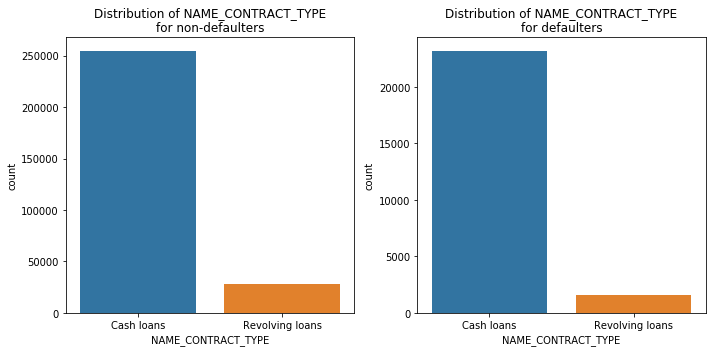

In [77]:
plt_count=0 ; count_plot(columns_to_plot[plt_count])

**Inference**  
Cash loans are much higher in number compared to the Revolving loans irrespective of the defaulted and non-defaulted loans

The ratio of  Revolving loans are showing a bit more for non-defaulters, i.e. cash-loan ratio is higher for defaulters.  

Clients who availed Cash loan show relatively higher trend of becoming a defaulter. 

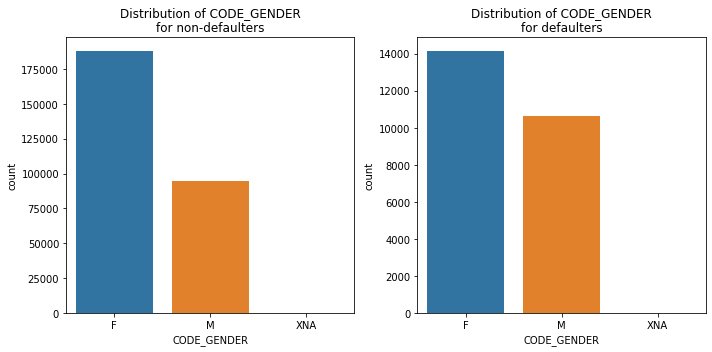

In [78]:
plt_count+=1 ; count_plot(columns_to_plot[plt_count])

**Inference**  
Total loans taken by Females are higher compared to males and the trend is the same for both defaulters and non-defaulters

The graph for Males are higher for defaulters, i.e. Male gender has a higher default ratio.

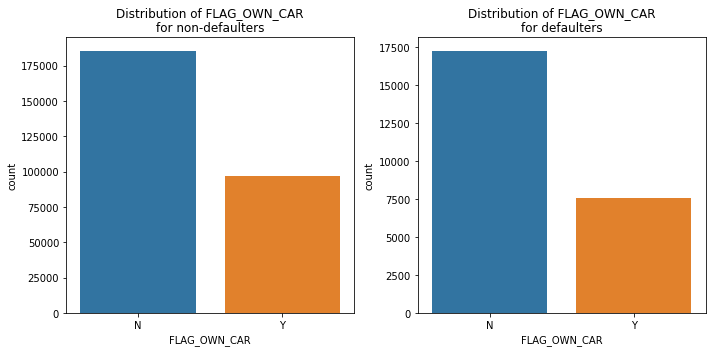

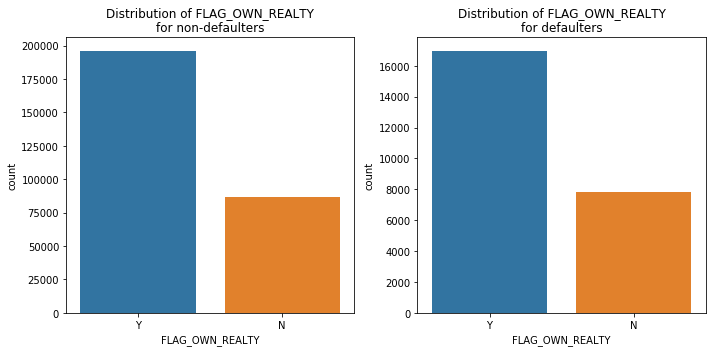

In [79]:
plt_count+=1 ; count_plot(columns_to_plot[plt_count])
plt_count+=1 ; count_plot(columns_to_plot[plt_count])

**Inference**  

There is a trend that there are higher number of people availing a loan who do not have a car, Trend is same for defaulter and non-defaulters.  
The number of clients availing a loan is higher for those who do not own a house/flat. Trend is same for defaulter and non-defaulters. 

The (size of the bar) graph for who own a car for non-defaulters are high compared to the defaulters (size of the bar)graph. Meaning, the ratio within the clients who do not own a car and becoming a defaulter is more.

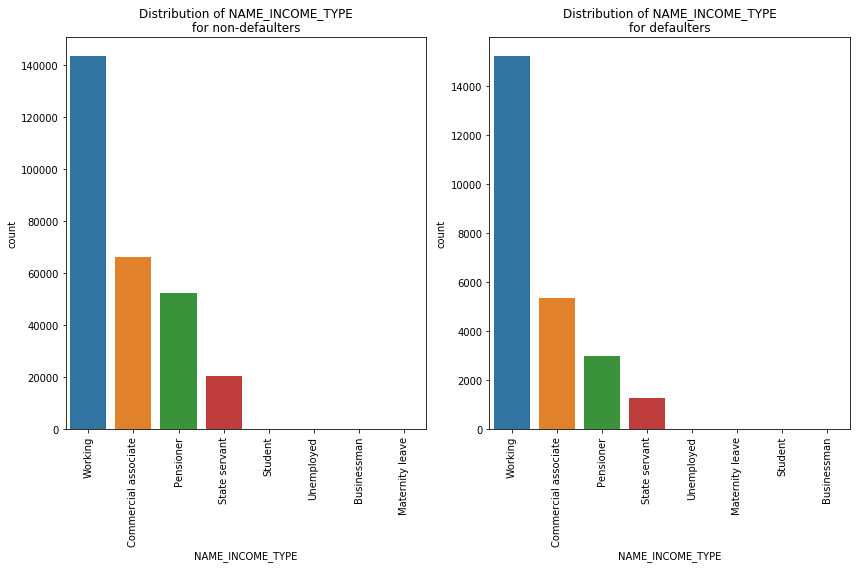

In [80]:
plt_count+=1 ; count_plot(columns_to_plot[plt_count],1)

**Inference**  
Number of loans availed by Working type is more, and the same trend is shown across different type for both defaulters and non-defaulters. 

The bars for Commercial Associates and pensioners are higher for non-defaulters, ie Bank should focus more on Commercial associates and Pensioners 

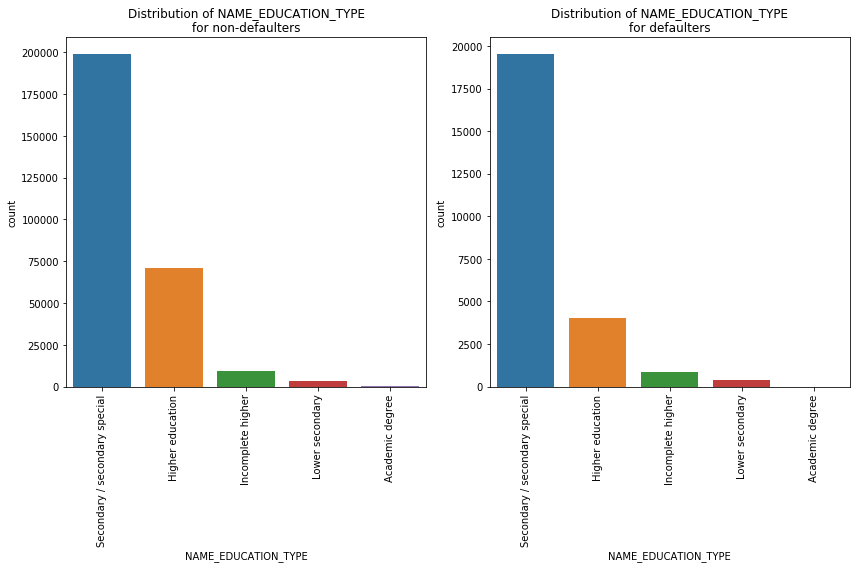

In [81]:
plt_count+=1 ; count_plot(columns_to_plot[plt_count],1)

**Inference**

Most number of loans are taken by clients who have completed secondary(special) education. Hence defaulters and non-defaulters are more in the same category as well

- Loans taken by clients who have completed Academic degree is far less and the repayment ratio (161/164) is higher, so bank should concentrate more on such clients. Total loan taken by such clients are way too less , so Bank need to improvise marketing to Academic degree holders.

- Loans taken by clients with Higher education shows a larger bar for non-defaulter. So bank should concentrate more on such clients as well.


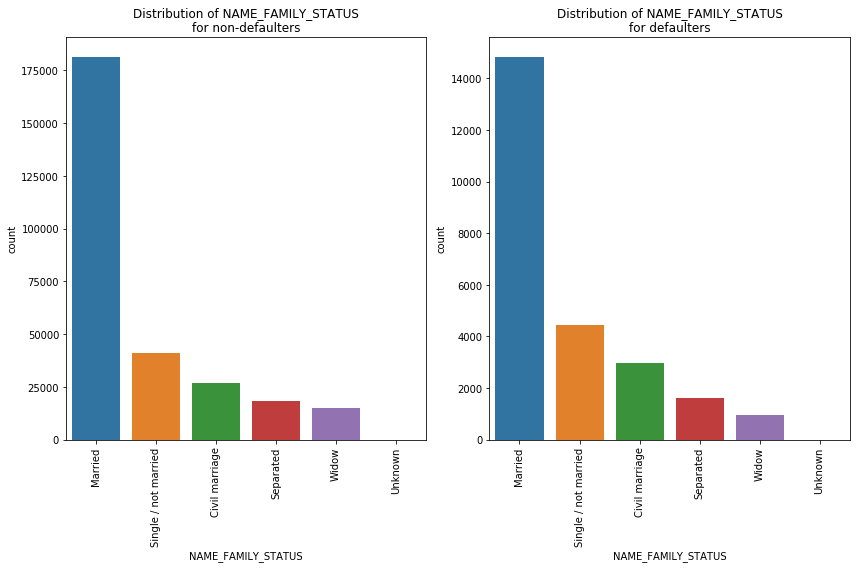

In [82]:
plt_count+=1 ; count_plot(columns_to_plot[plt_count],1)

**Inference**  
Number of loans are higher for married couples for both defaulters and non-defaulters.

The bar for Single/Unmarried and Civil Marriage is bit higher in the defaulters graph, hence Single/Unmarried and Civil Marriage people are more likely to have payment difficulties.

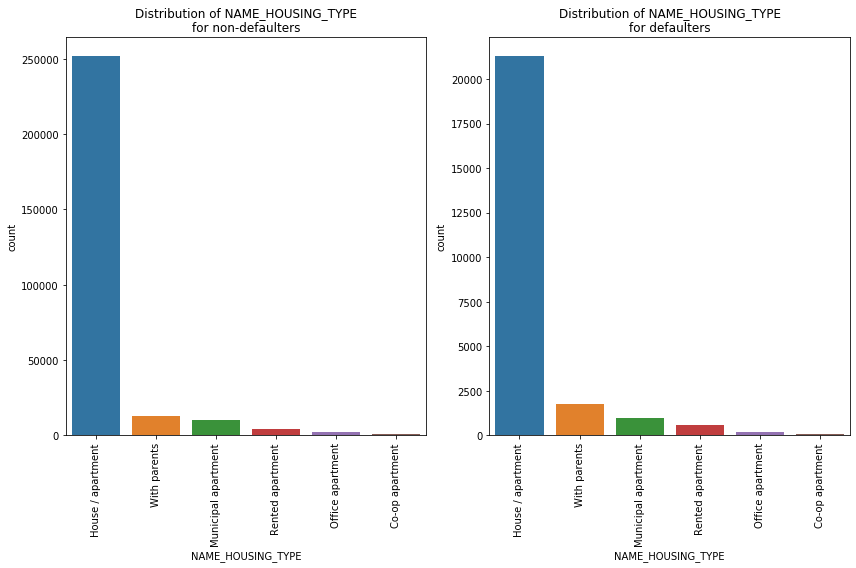

In [83]:
plt_count+=1 ; count_plot(columns_to_plot[plt_count],1)

**Inference**

Most clients who availed the loan own a House/Apartment

Ratio of People who live With Parents is more for defaulter than non-defaulters. The same is true for those who live in Rented Apartments as well, so both the categories tend to have higher chance of payment difficulties

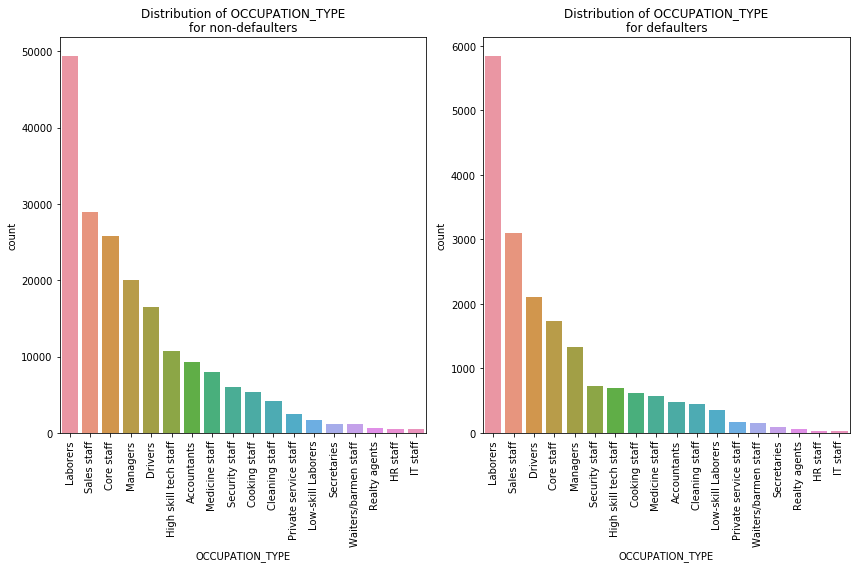

In [84]:
plt_count+=1 ; count_plot(columns_to_plot[plt_count],1)

**Inference**

Laborers ; Sales staff and Core staff are high in number for the loan borrowers however, the defaulters are more in Laborers, sales staff and drivers in respective orders.

IT Staffs and HR Staffs are who avail less number of loans are the non-defaulter ratio is higher as well, bank need to concentrate more on such occupation

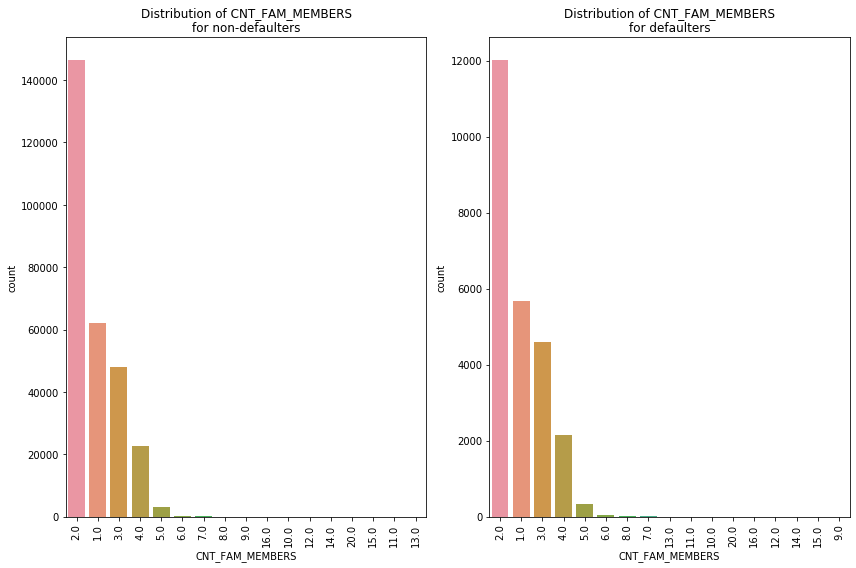

In [85]:
plt_count+=1 ; count_plot(columns_to_plot[plt_count],1)

**Inference**

The clients who have taken more number of loans have 2 people in their family, and the same trend is shown irrespective of being defaulter or not.

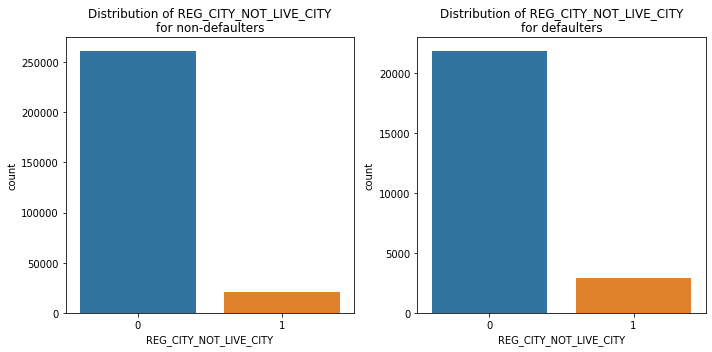

In [86]:
plt_count+=1 ; count_plot(columns_to_plot[plt_count])

**Inference**

Ratio of people whose Registration City is not the same as live city is higher in for defaulters compared to defaulters.

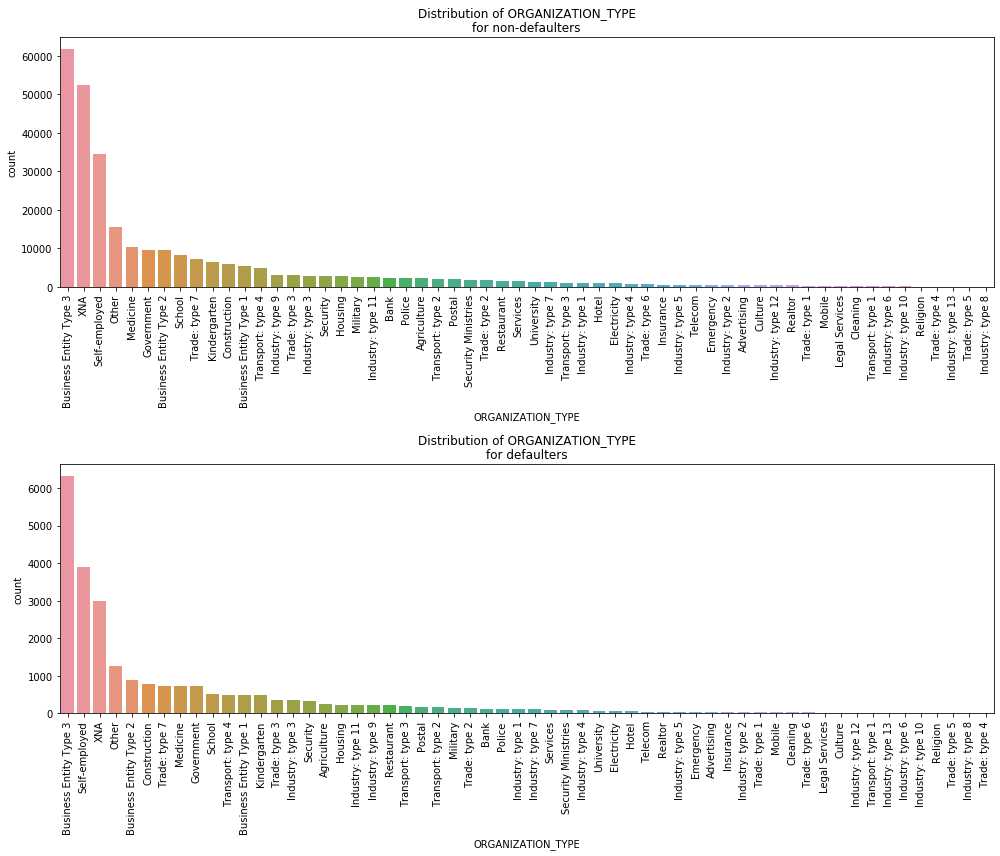

In [87]:
col_name=columns_to_plot[-1]
fig,ax = plt.subplots(nrows=2, ncols=1, figsize=(14,12))

sns.countplot(df_ndef[col_name], ax = ax[0], order= df_ndef[col_name].value_counts().index)
ax[0].set_title('Distribution of '+col_name+'\nfor non-defaulters',fontsize=12)

sns.countplot(df_def[col_name], ax = ax[1], order= df_def[col_name].value_counts().index)
ax[1].set_title('Distribution of '+col_name+'\nfor defaulters',fontsize=12)

ax[0].set_xticklabels(ax[0].get_xticklabels(),rotation=90)
ax[1].set_xticklabels(ax[1].get_xticklabels(),rotation=90)

plt.tight_layout()
plt.show()   

**Inference**

Type 3 Business Entity and Self-employed has most number of loan takers and same is reflected in defaulter and non defaulter list.

## Bivariate Analysis
___

### 1. Continuous - Continuous Bivariate Analysis

In [88]:
df_app.select_dtypes([int,float,'int64','float64']).columns

Index(['SK_ID_CURR', 'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY',
       'AMT_GOODS_PRICE', 'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH',
       'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'EXT_SOURCE_2',
       'EXT_SOURCE_3', 'YEARS_BEGINEXPLUATATION_AVG', 'FLOORSMAX_AVG',
       'YEARS_BEGINEXPLUATATION_MODE', 'FLOORSMAX_MODE',
       'YEARS_BEGINEXPLUATATION_MEDI', 'FLOORSMAX_MEDI', 'TOTALAREA_MODE',
       'DAYS_LAST_PHONE_CHANGE'],
      dtype='object')

In [89]:
def multi_scatterplot(var_x,var_y,perc1=100,perc2=100):
    fig,ax = plt.subplots(nrows=1, ncols=2, figsize=(12,5))
  
  #nth percentile to manage the Outliers
    temp_df_n = df_ndef[(df_ndef[var_x]<=np.nanpercentile(df_ndef[var_x], perc1))&
                      (df_ndef[var_y]<=np.nanpercentile(df_ndef[var_y], perc2))] 
  
    temp_df = df_def[(df_def[var_x]<=np.nanpercentile(df_def[var_x], perc1))&
                    (df_def[var_y]<=np.nanpercentile(df_def[var_y], perc2))]
  
  # #100th percentile 
  # temp_df_n = df_ndef#
  # temp_df = df_def#

    sns.scatterplot(x=var_x,y=var_y,data=temp_df_n, ax = ax[0])
    ax[0].set_title(var_x+' against  '+var_y+'\nfor non-defaulters',fontsize=14)

    sns.scatterplot(x=var_x,y=var_y,data=temp_df, ax = ax[1])
    ax[1].set_title(var_x+' against  '+var_y+'\nfor defaulters',fontsize=14)
  
    plt.tight_layout()
    plt.show()   

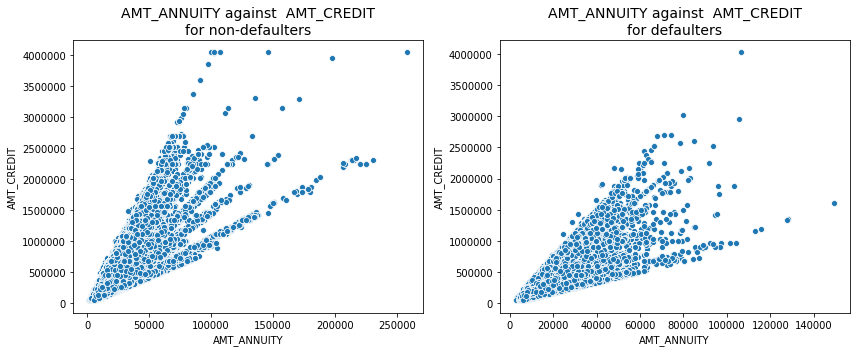

In [90]:
_x,_y= 'AMT_ANNUITY' ,'AMT_CREDIT'
multi_scatterplot(_x,_y)

#### **Inference**  
AMT_ANNUITY and AMT_CREDIT shows a positive linear correlation, ie as the Credit goes higher annuity also is higher. 

For defaulters the correlation is bit low comparatively.  

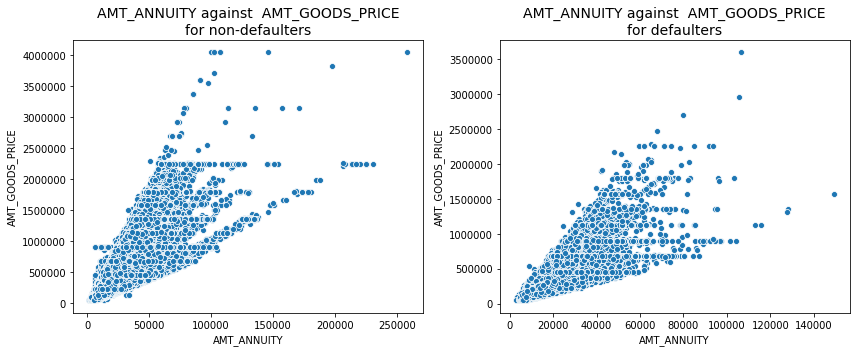

In [91]:
_x,_y= 'AMT_ANNUITY' ,'AMT_GOODS_PRICE'
multi_scatterplot(_x,_y)

#### **Inference**  
AMT_ANNUITY and AMT_GOODS_PRICE also shows a positive linear correlation, ie as the Goods Price goes higher annuity also is higher. For defaulters the correlation is bit low comparatively. 

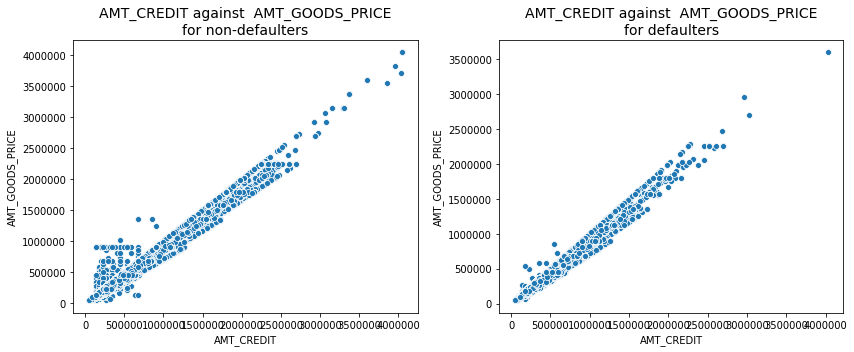

In [92]:
_x,_y= 'AMT_CREDIT' ,'AMT_GOODS_PRICE'
multi_scatterplot(_x,_y)

#### **Inference**  
AMT_CREDIT and AMT_GOODS_PRICE also shows a high positive linear correlation, ie as the Goods Price goes higher annuity also is higher. For defaulters the goods price is lower for credit amount. 

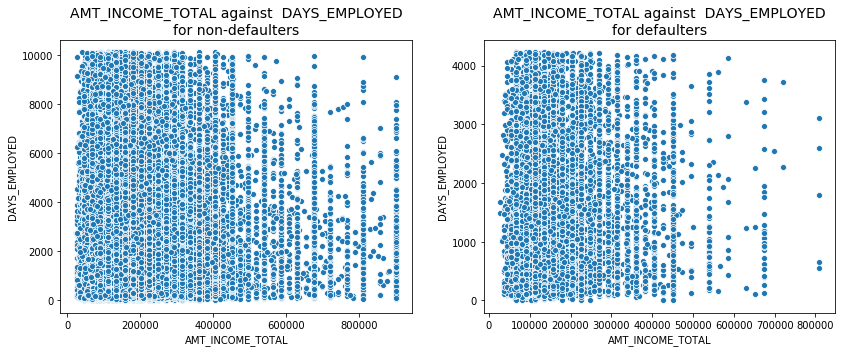

In [93]:
# Since there are null values (1000 Years) for Days Employed and higher outliers for Income total,
# Considering a 99th percentile value of Income (to remove outliers) 
# Considering 80th percentile for the days employed (to remove 1000 Years)
# Note: Missing value and outlier imputation is not done previously

_x,_y= 'AMT_INCOME_TOTAL','DAYS_EMPLOYED'
multi_scatterplot(_x,_y,99.9,80)

#### **Inference**  
There is no linear correlation between AMT_INCOME_TOTAL(Income) and DAYS_EMPLOYED, however the days employed and the income is lower for the defaulters.

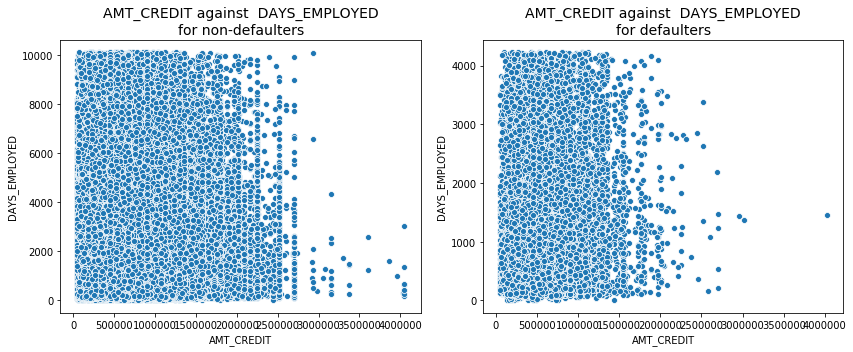

In [94]:
# Since there are null values (1000 Years) for Days Employed,
# Considering 80th percentile for the days employed (to remove 1000 Years)
# Note: Missing value and outlier imputation is not done previously

_x,_y= 'AMT_CREDIT','DAYS_EMPLOYED'
multi_scatterplot(_x,_y,100,80)

#### **Inference**  
AMT_CREDIT and DAYS_EMPLOYED do not have any strong linear correlation. Defaulters are more with low number of employed days and amount less than 1500000.

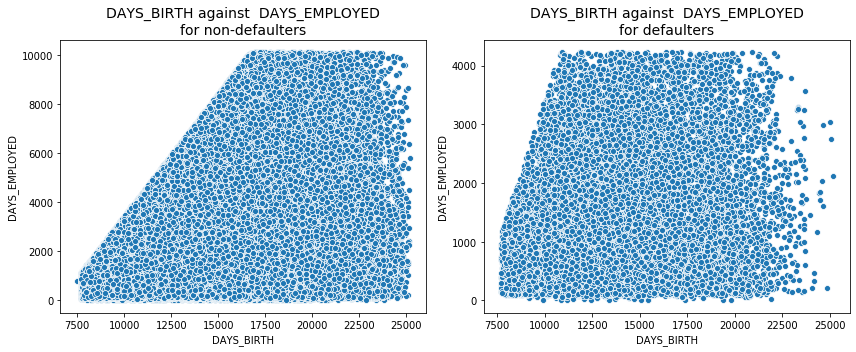

In [95]:
# Since there are null values (1000 Years) for Days Employed,
# Considering 80th percentile for the days employed (to remove 1000 Years)
# Note: Missing value and outlier imputation is not done previously

_x,_y= 'DAYS_BIRTH','DAYS_EMPLOYED'
multi_scatterplot(_x,_y,100,80)

#### **Inference**  
DAYS_BIRTH and DAYS_EMPLOYED shows slight correlation. THe DAYS_EMPLOYED is less for the defaulters, however old people are not much in defaulters for higher days employed

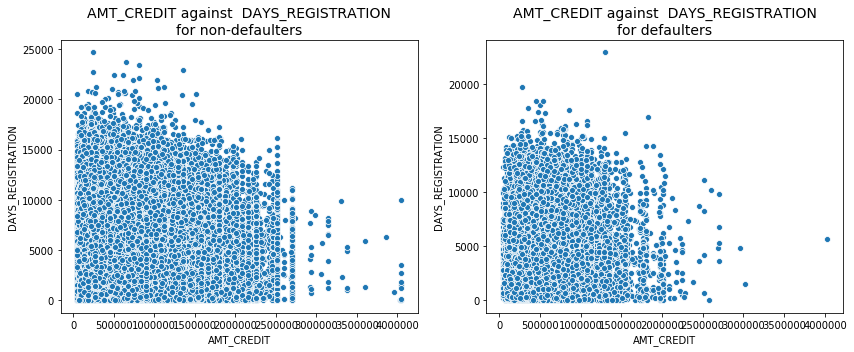

In [96]:
_x,_y= 'AMT_CREDIT','DAYS_REGISTRATION'
multi_scatterplot(_x,_y)

**Inference**  
DAYS_REGISTRATION and AMT_CREDIT shows slight negative correlation. The density is less for higher DAYS_REGISTERED and higher AMT_CREDIT for defaulters

### 2. Categorical - Categorical Bivariate Analysis

In [97]:
df_app.select_dtypes('category').columns

Index(['TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR',
       'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'NAME_TYPE_SUITE',
       'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS',
       'NAME_HOUSING_TYPE', 'FLAG_MOBIL', 'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE',
       'FLAG_CONT_MOBILE', 'FLAG_PHONE', 'FLAG_EMAIL', 'OCCUPATION_TYPE',
       'CNT_FAM_MEMBERS', 'REGION_RATING_CLIENT',
       'REGION_RATING_CLIENT_W_CITY', 'WEEKDAY_APPR_PROCESS_START',
       'HOUR_APPR_PROCESS_START', 'REG_REGION_NOT_LIVE_REGION',
       'REG_REGION_NOT_WORK_REGION', 'LIVE_REGION_NOT_WORK_REGION',
       'REG_CITY_NOT_LIVE_CITY', 'REG_CITY_NOT_WORK_CITY',
       'LIVE_CITY_NOT_WORK_CITY', 'ORGANIZATION_TYPE', 'EMERGENCYSTATE_MODE',
       'OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_30_CNT_SOCIAL_CIRCLE',
       'OBS_60_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCIAL_CIRCLE',
       'FLAG_DOCUMENT_2', 'FLAG_DOCUMENT_3', 'FLAG_DOCUMENT_4',
       'FLAG_DOCUMENT_5', 'FLAG_DOCUMENT_6', 'FLAG_DOCUMENT_7',
   

In [98]:
def multi_countplot(var_x,var_y,_rotate=False):
    fig,ax = plt.subplots(nrows=1, ncols=2, figsize=(14,5+_rotate*4))

    sns.countplot(x=var_x,hue=var_y,data=df_ndef, ax = ax[0])
    ax[0].set_title(var_x+' against  '+var_y+'\nfor non-defaulters',fontsize=14)

    sns.countplot(x=var_x,hue=var_y,data=df_def, ax = ax[1])
    ax[1].set_title(var_x+' against  '+var_y+'\nfor defaulters',fontsize=14)

    if _rotate:
        ax[0].set_xticklabels(ax[0].get_xticklabels(),rotation=90)
        ax[1].set_xticklabels(ax[1].get_xticklabels(),rotation=90)

    plt.tight_layout()
    plt.show()   

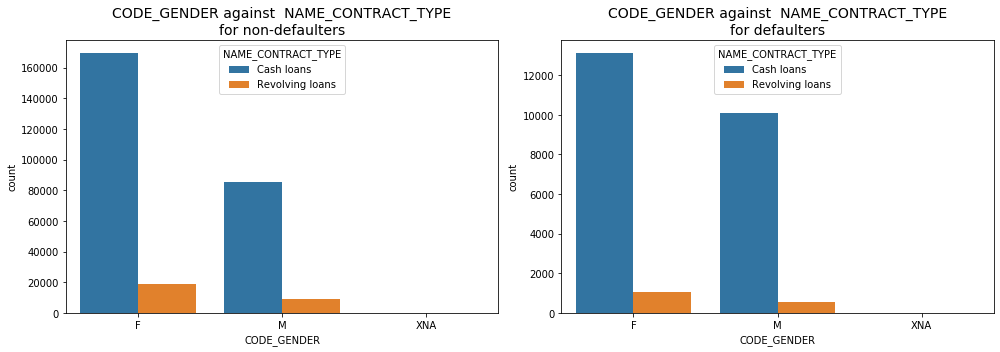

In [99]:
multi_countplot('CODE_GENDER','NAME_CONTRACT_TYPE')

#### **Inference**    
For both males and females, cash loans are of higher number for both defaulters and non-defaulters. 

Women who avail revolving loans has higher non-defaulters count.

Ratio of cash loan defaulters are higher in Males. Men who avail cash loan has a higher chance of payment difficulties

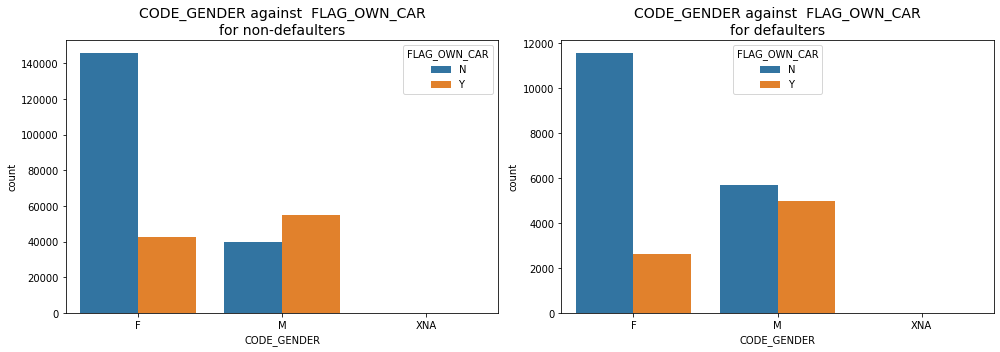

In [100]:
multi_countplot('CODE_GENDER','FLAG_OWN_CAR')

#### **Inference**    
For the defaulters the ratio of males who do not own a car is higher, ie males who do not own a car has a high loan defaulter ratio.

Both for males and females the trend is approximately same, although the ratio is lower for defaulters in females when they own a car,ie females who own a car has higher non-defaulter ratio.

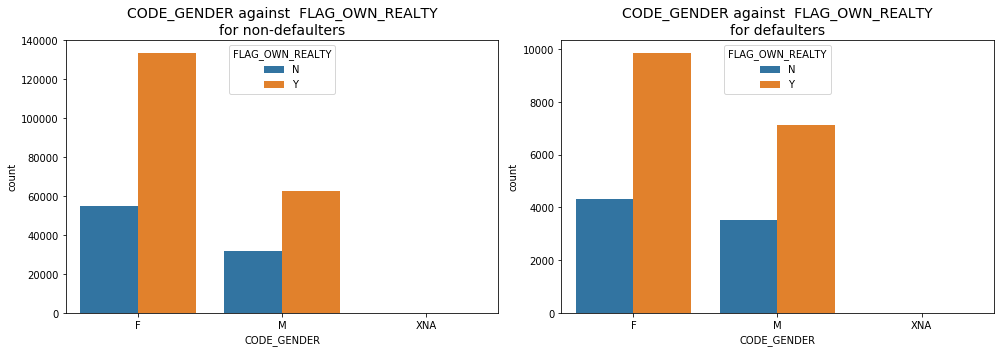

In [101]:
multi_countplot('CODE_GENDER','FLAG_OWN_REALTY')

#### **Inference**    
For males those who own a property has a higher ratio of loan default, in case of females it shows relatively equal trend.

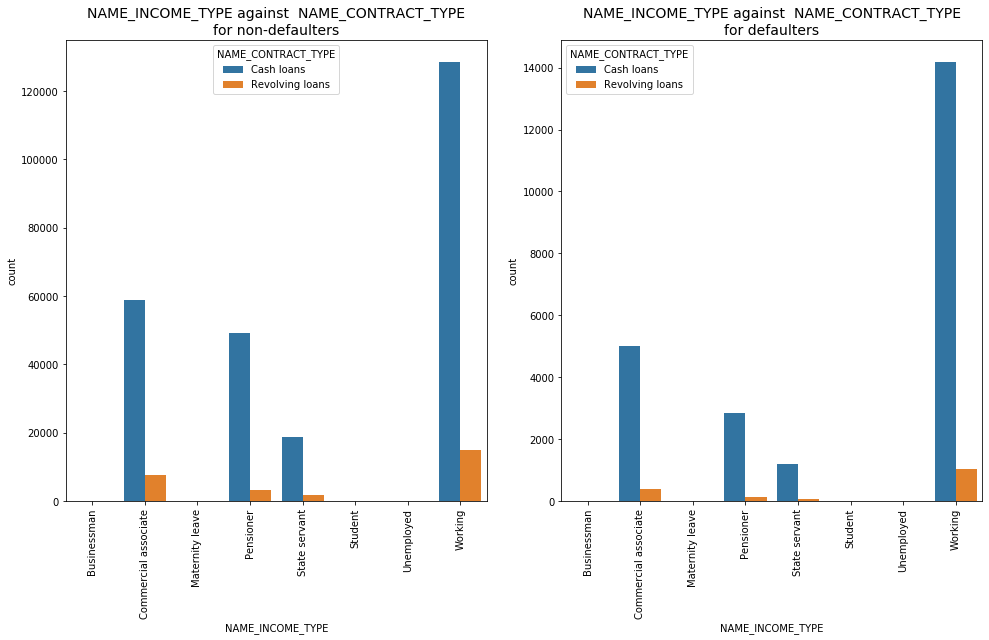

In [102]:
multi_countplot('NAME_INCOME_TYPE','NAME_CONTRACT_TYPE',True)

#### **Inference**    
The Ratio of loan defaulter is low for both cash and revolving loans for commercial associate, Pensioners and state servants, but for working people it shows same trend for both defaulters and non-defaulters.

Working people has a higher default rate for cash loans, where as pensioners and commercial associates are largely non-defaulters for cash loans and revolving loans

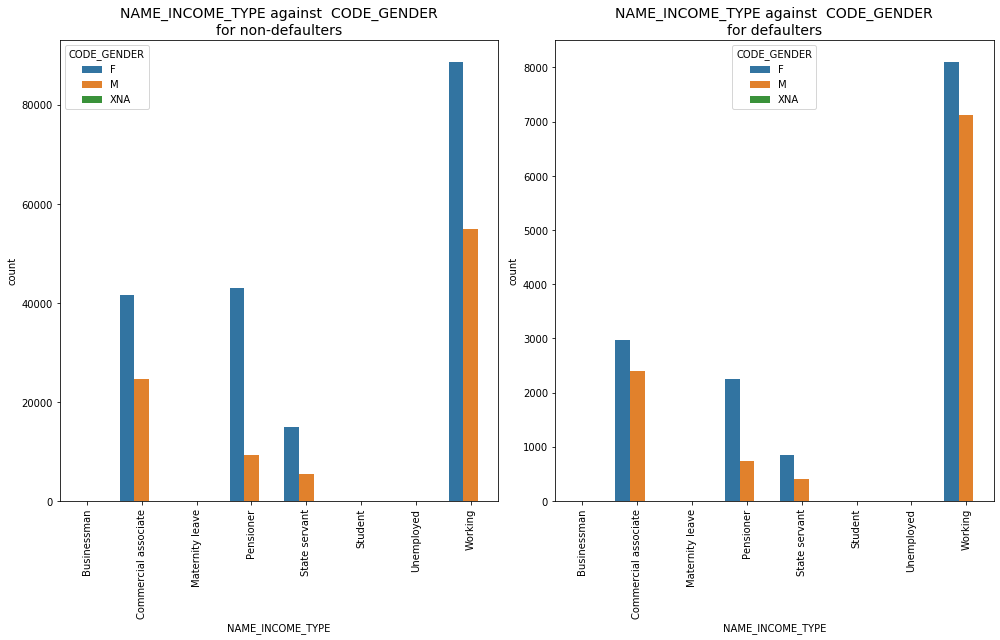

In [103]:
multi_countplot('NAME_INCOME_TYPE','CODE_GENDER',True)

#### **Inference**    
The ratio of non-defaulters in females are much higher in pensioners.

Ratio of non-defaulters are higher for females in commercial associate type as well.

The Ratio of loan defaulter is far higher for males in working category.

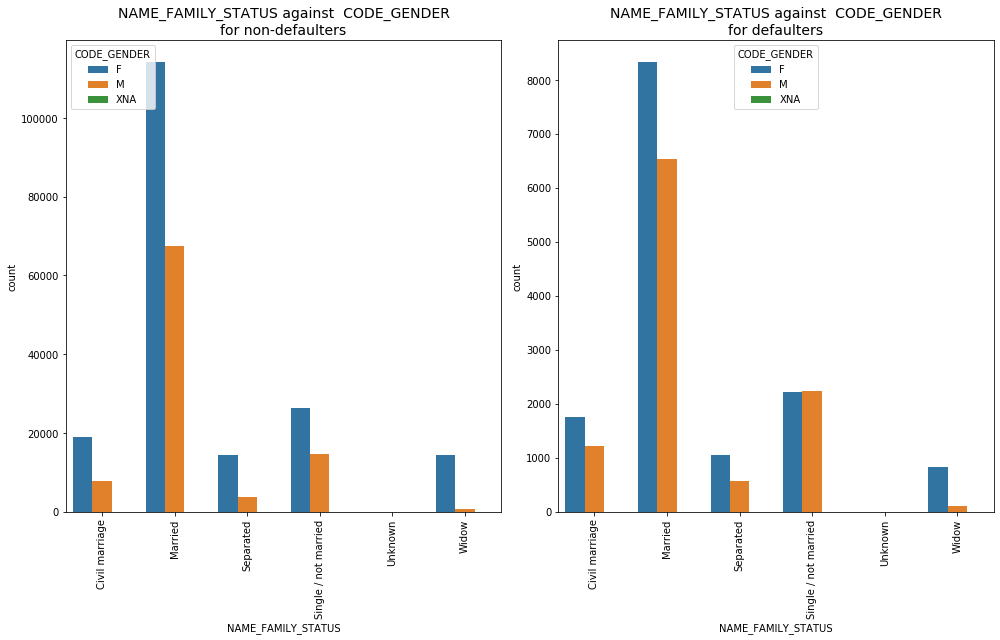

In [104]:
multi_countplot('NAME_FAMILY_STATUS','CODE_GENDER',1)

#### **Inference**    
The Ratio of loan defaulter is  higher for civil marriage, married and single in case of males.

For single males and females, loan default tendency is the same whereas for non-defaulters the ratio is higher for females

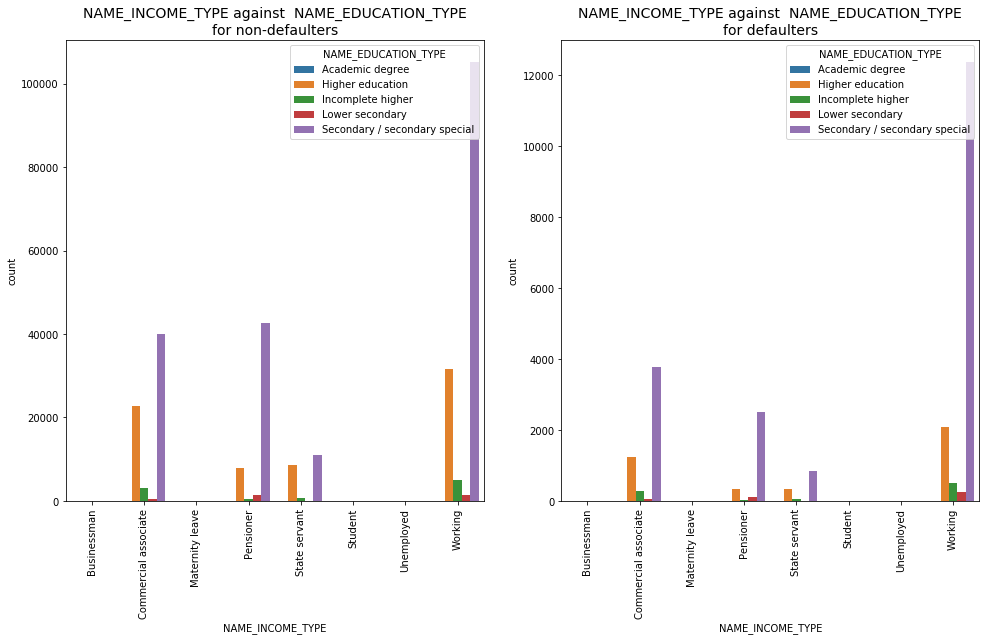

In [105]:
multi_countplot('NAME_INCOME_TYPE','NAME_EDUCATION_TYPE',1)

#### **Inference**     
The more number of loans are taken by the secondary education clients and the same is reflected across non-defaulter and defaulter data for different working category.

Ratio of commercial associates,Pensioners and State servants are lower for both the defaulter and non-defaulter categories.

Non-defaulters ratio is more for : 
- Working clients with higher education
- Pensioners with Secondary and Higher education
- Commercial associates with higher education.



### 3. Continuous - Categorical Bivariate Analysis

In [106]:
def multi_boxplot(var_x,var_y,perc=100,_rotate=False):
    fig,ax = plt.subplots(nrows=1, ncols=2, figsize=(14,6+_rotate*3))

    #nth percentile to manage the Outliers
    temp_df_n = df_ndef[(df_ndef[var_y]<=np.nanpercentile(df_ndef[var_y], perc))] 
    temp_df   = df_def [(df_def [var_y]<=np.nanpercentile(df_def [var_y], perc))]

    sns.boxplot(x=var_x,y=var_y,data=temp_df_n, ax = ax[0])
    ax[0].set_title(var_x+' against  '+var_y+'\nfor non-defaulters',fontsize=14)

    sns.boxplot(x=var_x,y=var_y,data=temp_df, ax = ax[1])
    ax[1].set_title(var_x+' against  '+var_y+'\nfor defaulters',fontsize=14)

    if _rotate:
        ax[0].set_xticklabels(ax[0].get_xticklabels(),rotation=90)
        ax[1].set_xticklabels(ax[1].get_xticklabels(),rotation=90)

    plt.tight_layout()
    plt.show()   

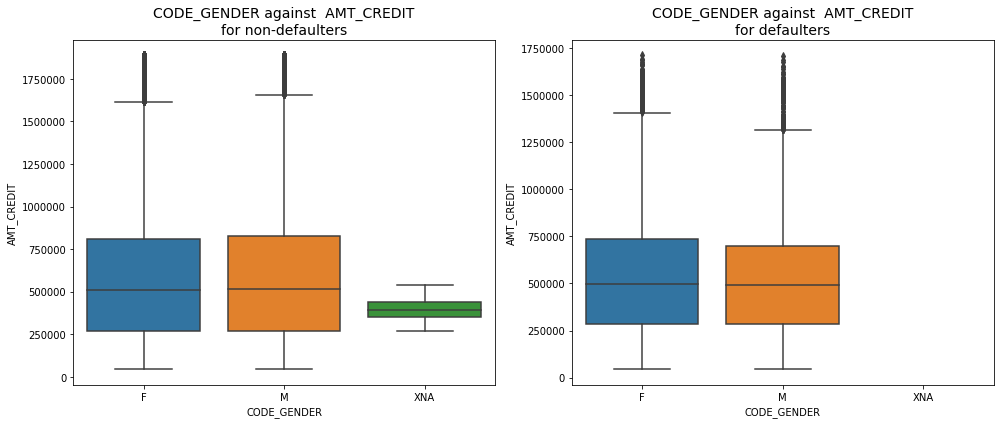

In [107]:
# Considering 99th percentile for the Credit Amount to avoid outliers and to get better insights
# Note: Missing value and outlier imputation is not done previously

multi_boxplot('CODE_GENDER','AMT_CREDIT',99)


#### **Inference** 
There are some missing/not applicable values appearing for non-defaulters.

For females the credit amount is showing similar trend for both defaulters and non defaulters, yet the 75th percentile for the defaulters is bit on the higher side.

In case of male clients, the spread is more for the non-default loan credit amount. The spread is much lower for the defaulters in male category, however the Median for both the defaulter and non-defaulter in both the category is around 500000.

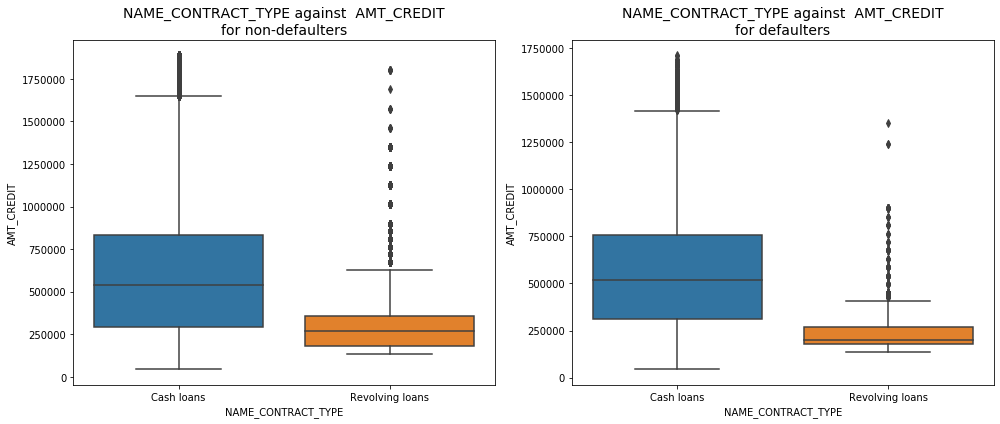

In [108]:
# Considering 99th percentile for the Credit Amount to avoid outliers and to get better insights
# Note: Missing value and outlier imputation is not done previously

multi_boxplot('NAME_CONTRACT_TYPE','AMT_CREDIT',99)

#### **Inference**  
Cash loans show similar kind of distribution for both defaulters and non-defaulters. Median lines almost at the same Credit Amount.  
The inter-quartile range for the revolving loans are bit wider, ie the spread is more for non-defaulters in case of revolving loans and is normal from Median. 

For defaulters the revolving loan is skewed and withing a shorter spread. The median for defaulter is lower compared to non-defaulters for revolving loans

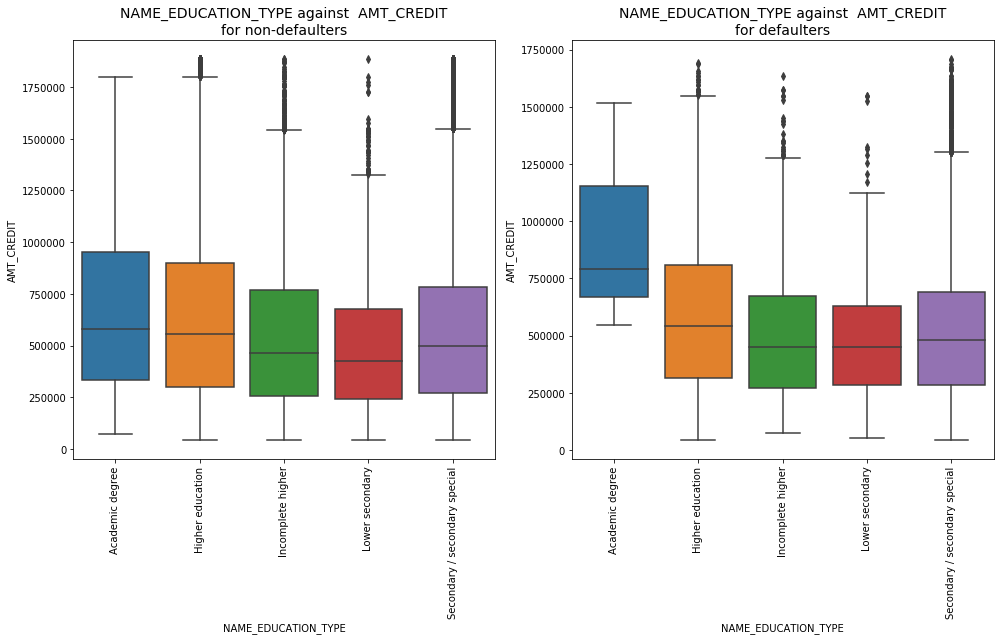

In [109]:
# Considering 99th percentile for the Credit Amount to avoid outliers and to get better insights
# Note: Missing value and outlier imputation is not done previously

multi_boxplot('NAME_EDUCATION_TYPE','AMT_CREDIT',99,1)

#### **Inference**  
All the Education types except Academic degree shows a similar trend of Credit amount for both defaulters and non-defaulters.

For Academic degree, spread of credit amount is more for non-defaulters and normal from median which is around 60000, for defaulters the spread is short and skewed, the median is higher at ~800000 approx.

Clients with academic degree has defaulters when the credit amount is higher.

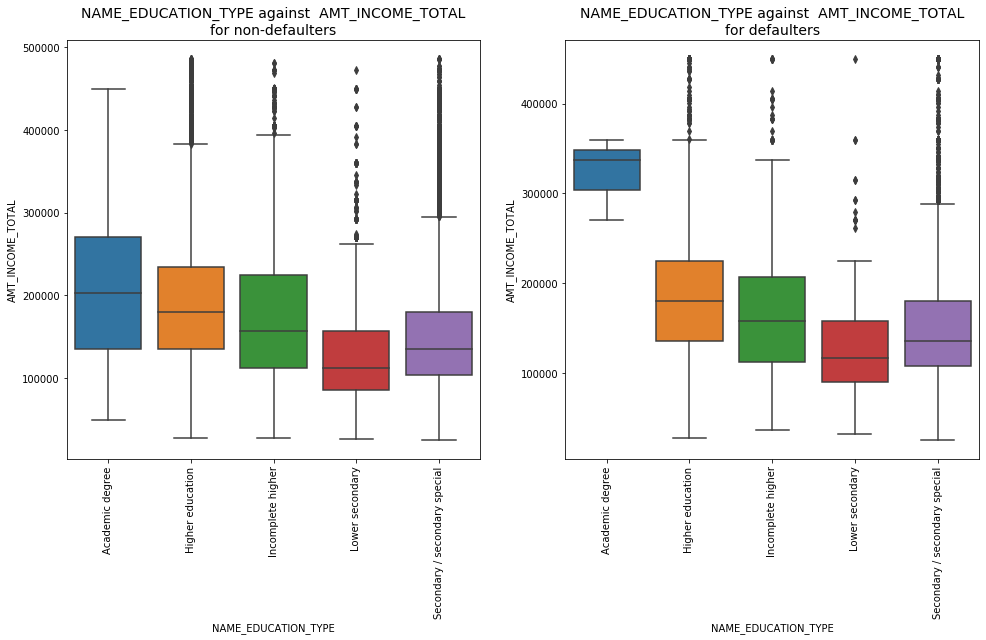

In [110]:
# Considering 99th percentile for the Income Amount to avoid outliers and to get better insights
# Note: Missing value and outlier imputation is not done previously

multi_boxplot('NAME_EDUCATION_TYPE','AMT_INCOME_TOTAL',99,1)

#### **Inference**  
All the Education types except Academic degree shows a similar trend of income for both defaulters and non-defaulters.

The median values for these education types are a bit lower for the defaulters.

For Academic degree, spread of income is more for non-defaulters and normal from median which is around 200000, for defaulters the spread is short and the median lies much higher at ~340000 approx.

Clients with academic degree has defaulters where the income is higher, however the spread of non-defaulters are higher, so bank has to concentrate on such groups 

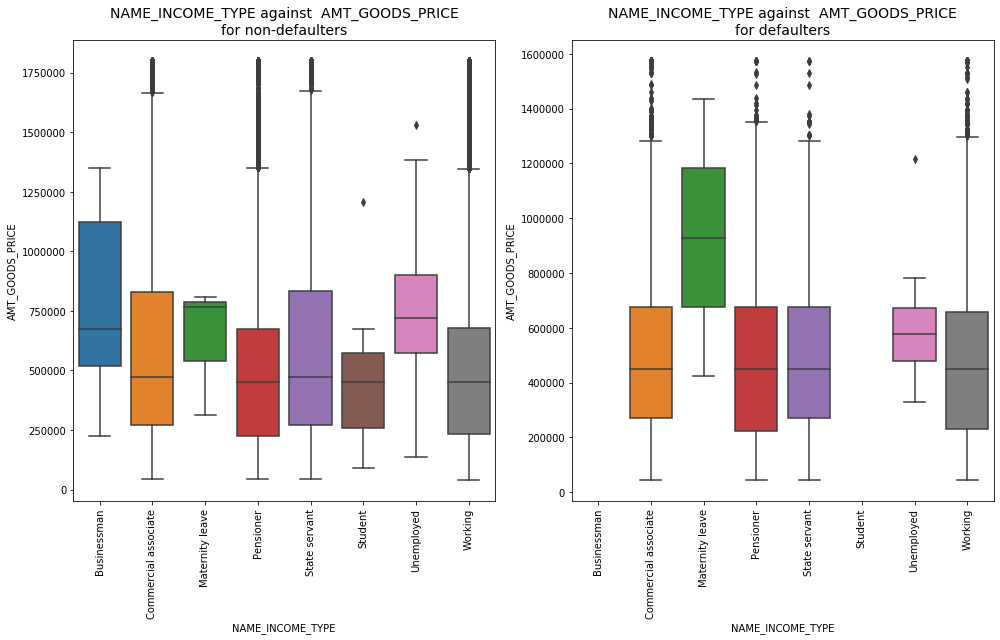

In [111]:
# Considering 99th percentile for the Goods price Amount to avoid outliers and to get better insights
# Note: Missing value and outlier imputation is not done previously

multi_boxplot('NAME_INCOME_TYPE','AMT_GOODS_PRICE',99,1)

#### **Inference**  
For Businessman and students, the goods price amount is not available in the defaulter dataset. Bank has to concentrate more on such groups.  

Maternity leave shows a uniform normal distribution from median for defaulters whereas it is skewed for non-defaulters. Also with a higher Goods price Maternity leave types tend to have higher defaulters. Median lies  much higher for maternity leaves in case of defaulters.

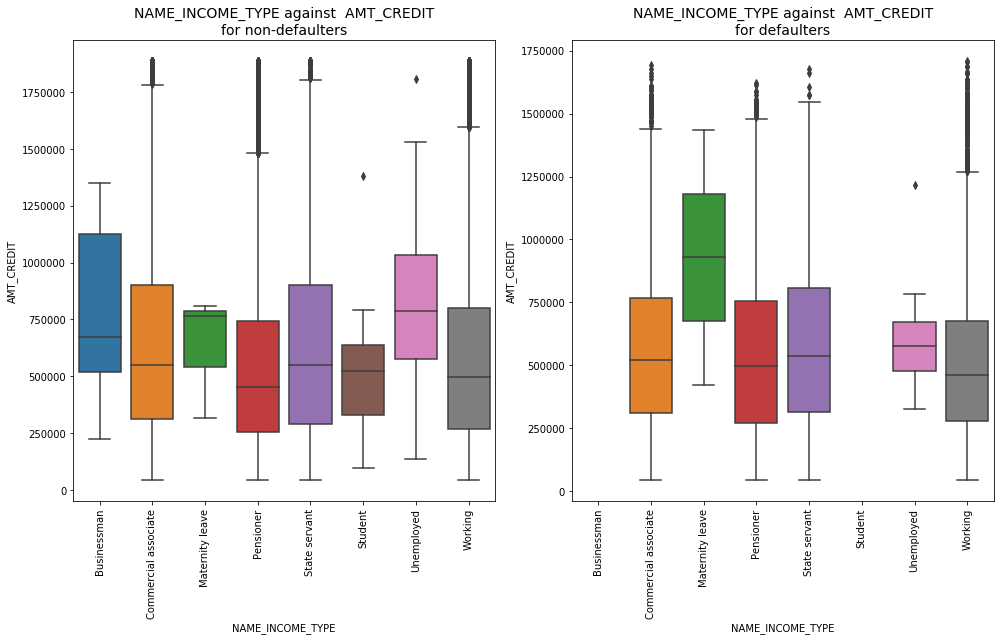

In [112]:
# Considering 99th percentile for the Credit Amount to avoid outliers and to get better insights
# Note: Missing value and outlier imputation is not done previously

multi_boxplot('NAME_INCOME_TYPE','AMT_CREDIT',99,1)

#### **Inference**  
For Businessman and students, the credit amount is not available in the defaulter dataset. Bank has to concentrate more on such groups.    

Maternity leave shows a uniform normal distribution from median for defaulters whereas it is skewed for non-defaulters. Also with a higher Credit Amount, Maternity leave types tend to have higher defaulters. Median lies much higher for maternity leaves in case of defaulters.


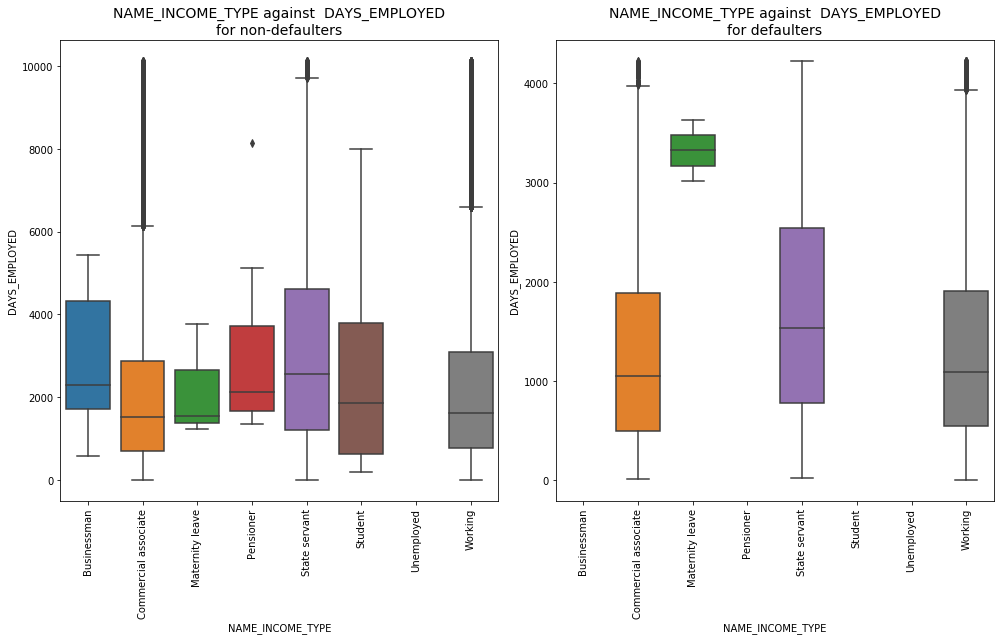

In [113]:
# Since there are null values (1000 Years) for Days Employed,
# Considering 80th percentile for the days employed (to remove 1000 Years)
# Note: Missing value and outlier imputation is not done previously

multi_boxplot('NAME_INCOME_TYPE','DAYS_EMPLOYED',80,1)

#### **Inference**  
For the Businessman, Pensioner and Students there are no defaulter values for days employed, this might be because the days employed is set as 0 or not applicable for the Income Type. In general, no defaulters are appearing for the income types.

For Maternity leave, the days employed is higher for defaulters and the distribution is normal from median. Median lies much higher at above 3000 days.

For other categories of income type, defaulter median lie lower than  that of non-defaulters, ie median employed date are lower for defaulters ie at the start of their careers

# EDA on Previous_Application_Data
___


### Merging the files

In [114]:
df_app.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 85 columns):
 #   Column                        Non-Null Count   Dtype   
---  ------                        --------------   -----   
 0   SK_ID_CURR                    307511 non-null  int64   
 1   TARGET                        307511 non-null  category
 2   NAME_CONTRACT_TYPE            307511 non-null  category
 3   CODE_GENDER                   307511 non-null  category
 4   FLAG_OWN_CAR                  307511 non-null  category
 5   FLAG_OWN_REALTY               307511 non-null  category
 6   CNT_CHILDREN                  307511 non-null  category
 7   AMT_INCOME_TOTAL              307511 non-null  float64 
 8   AMT_CREDIT                    307511 non-null  float64 
 9   AMT_ANNUITY                   307499 non-null  float64 
 10  AMT_GOODS_PRICE               307233 non-null  float64 
 11  NAME_TYPE_SUITE               306219 non-null  category
 12  NAME_INCOME_TYPE              

In [115]:
df_prev.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1670214 entries, 0 to 1670213
Data columns (total 37 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   SK_ID_PREV                   1670214 non-null  int64  
 1   SK_ID_CURR                   1670214 non-null  int64  
 2   NAME_CONTRACT_TYPE           1670214 non-null  object 
 3   AMT_ANNUITY                  1297979 non-null  float64
 4   AMT_APPLICATION              1670214 non-null  float64
 5   AMT_CREDIT                   1670213 non-null  float64
 6   AMT_DOWN_PAYMENT             774370 non-null   float64
 7   AMT_GOODS_PRICE              1284699 non-null  float64
 8   WEEKDAY_APPR_PROCESS_START   1670214 non-null  object 
 9   HOUR_APPR_PROCESS_START      1670214 non-null  int64  
 10  FLAG_LAST_APPL_PER_CONTRACT  1670214 non-null  object 
 11  NFLAG_LAST_APPL_IN_DAY       1670214 non-null  int64  
 12  RATE_DOWN_PAYMENT            774370 non-nu

In [116]:
df_prev.select_dtypes(['object','category']).columns

Index(['NAME_CONTRACT_TYPE', 'WEEKDAY_APPR_PROCESS_START',
       'FLAG_LAST_APPL_PER_CONTRACT', 'NAME_CASH_LOAN_PURPOSE',
       'NAME_CONTRACT_STATUS', 'NAME_PAYMENT_TYPE', 'CODE_REJECT_REASON',
       'NAME_TYPE_SUITE', 'NAME_CLIENT_TYPE', 'NAME_GOODS_CATEGORY',
       'NAME_PORTFOLIO', 'NAME_PRODUCT_TYPE', 'CHANNEL_TYPE',
       'NAME_SELLER_INDUSTRY', 'NAME_YIELD_GROUP', 'PRODUCT_COMBINATION'],
      dtype='object')

In [117]:
df_prev.select_dtypes([int,float,'int64','float64']).columns

Index(['SK_ID_PREV', 'SK_ID_CURR', 'AMT_ANNUITY', 'AMT_APPLICATION',
       'AMT_CREDIT', 'AMT_DOWN_PAYMENT', 'AMT_GOODS_PRICE',
       'HOUR_APPR_PROCESS_START', 'NFLAG_LAST_APPL_IN_DAY',
       'RATE_DOWN_PAYMENT', 'RATE_INTEREST_PRIMARY',
       'RATE_INTEREST_PRIVILEGED', 'DAYS_DECISION', 'SELLERPLACE_AREA',
       'CNT_PAYMENT', 'DAYS_FIRST_DRAWING', 'DAYS_FIRST_DUE',
       'DAYS_LAST_DUE_1ST_VERSION', 'DAYS_LAST_DUE', 'DAYS_TERMINATION',
       'NFLAG_INSURED_ON_APPROVAL'],
      dtype='object')

In [118]:
df_prev.head()

SK_ID_PREV  SK_ID_CURR NAME_CONTRACT_TYPE  AMT_ANNUITY  AMT_APPLICATION  \
0     2030495      271877     Consumer loans     1730.430          17145.0   
1     2802425      108129         Cash loans    25188.615         607500.0   
2     2523466      122040         Cash loans    15060.735         112500.0   
3     2819243      176158         Cash loans    47041.335         450000.0   
4     1784265      202054         Cash loans    31924.395         337500.0   

   AMT_CREDIT  AMT_DOWN_PAYMENT  AMT_GOODS_PRICE WEEKDAY_APPR_PROCESS_START  \
0     17145.0               0.0          17145.0                   SATURDAY   
1    679671.0               NaN         607500.0                   THURSDAY   
2    136444.5               NaN         112500.0                    TUESDAY   
3    470790.0               NaN         450000.0                     MONDAY   
4    404055.0               NaN         337500.0                   THURSDAY   

   HOUR_APPR_PROCESS_START FLAG_LAST_APPL_PER_CONTRACT  \
0                       15                           Y   
1                       11                           Y   
2                       11                           Y   
3                        7                           Y   
4                        9                           Y   

   NFLAG_LAST_APPL_IN_DAY  RATE_DOWN_PAYMENT  RATE_INTEREST_PRIMARY  \
0                       1                0.0               0.182832   
1                       1                NaN                    NaN   
2                       1                NaN                    NaN   
3                       1                NaN                    NaN   
4                       1                NaN                    NaN   

   RATE_INTEREST_PRIVILEGED NAME_CASH_LOAN_PURPOSE NAME_CONTRACT_STATUS  \
0                  0.867336                    XAP             Approved   
1                       NaN                    XNA             Approved   
2                       NaN                    XNA             Approved   
3                       NaN                    XNA             Approved   
4                       NaN                Repairs              Refused   

   DAYS_DECISION      NAME_PAYMENT_TYPE CODE_REJECT_REASON  NAME_TYPE_SUITE  \
0            -73  Cash through the bank                XAP              NaN   
1           -164                    XNA                XAP    Unaccompanied   
2           -301  Cash through the bank                XAP  Spouse, partner   
3           -512  Cash through the bank                XAP              NaN   
4           -781  Cash through the bank                 HC              NaN   

  NAME_CLIENT_TYPE NAME_GOODS_CATEGORY NAME_PORTFOLIO NAME_PRODUCT_TYPE  \
0         Repeater              Mobile            POS               XNA   
1         Repeater                 XNA           Cash            x-sell   
2         Repeater                 XNA           Cash            x-sell   
3         Repeater                 XNA           Cash            x-sell   
4         Repeater                 XNA           Cash           walk-in   

              CHANNEL_TYPE  SELLERPLACE_AREA NAME_SELLER_INDUSTRY  \
0             Country-wide                35         Connectivity   
1           Contact center                -1                  XNA   
2  Credit and cash offices                -1                  XNA   
3  Credit and cash offices                -1                  XNA   
4  Credit and cash offices                -1                  XNA   

   CNT_PAYMENT NAME_YIELD_GROUP       PRODUCT_COMBINATION  DAYS_FIRST_DRAWING  \
0         12.0           middle  POS mobile with interest            365243.0   
1         36.0       low_action          Cash X-Sell: low            365243.0   
2         12.0             high         Cash X-Sell: high            365243.0   
3         12.0           middle       Cash X-Sell: middle            365243.0   
4         24.0             high         Cash Street: high                 NaN   

   D

In [119]:
df_app.head()

SK_ID_CURR TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0      100002      1         Cash loans           M            N   
1      100003      0         Cash loans           F            N   
2      100004      0    Revolving loans           M            Y   
3      100006      0         Cash loans           F            N   
4      100007      0         Cash loans           M            N   

  FLAG_OWN_REALTY CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0               Y            0          202500.0    406597.5      24700.5   
1               N            0          270000.0   1293502.5      35698.5   
2               Y            0           67500.0    135000.0       6750.0   
3               Y            0          135000.0    312682.5      29686.5   
4               Y            0          121500.0    513000.0      21865.5   

   AMT_GOODS_PRICE NAME_TYPE_SUITE NAME_INCOME_TYPE  \
0         351000.0   Unaccompanied          Working   
1        1129500.0          Family    State servant   
2         135000.0   Unaccompanied          Working   
3         297000.0   Unaccompanied          Working   
4         513000.0   Unaccompanied          Working   

             NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  \
0  Secondary / secondary special  Single / not married  House / apartment   
1               Higher education               Married  House / apartment   
2  Secondary / secondary special  Single / not married  House / apartment   
3  Secondary / secondary special        Civil marriage  House / apartment   
4  Secondary / secondary special  Single / not married  House / apartment   

   REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  \
0                    0.018801        9461            637             3648.0   
1                    0.003541       16765           1188             1186.0   
2                    0.010032       19046            225             4260.0   
3                    0.008019       19005           3039             9833.0   
4                    0.028663       19932           3038             4311.0   

   DAYS_ID_PUBLISH FLAG_MOBIL FLAG_EMP_PHONE FLAG_WORK_PHONE FLAG_CONT_MOBILE  \
0             2120          1              1               0                1   
1              291          1              1               0                1   
2             2531          1              1               1                1   
3             2437          1              1               0                1   
4             3458          1              1               0                1   

  FLAG_PHONE FLAG_EMAIL OCCUPATION_TYPE CNT_FAM_MEMBERS REGION_RATING_CLIENT  \
0          1          0        Laborers             1.0                    2   
1          1          0      Core staff             2.0                    1   
2          1          0        Laborers             1.0                    2   
3          0          0        Laborers             2.0                    2   
4          0          0      Core staff             1.0                    2   

  REGION_RATING_CLIENT_W_CITY WEEKDAY_APPR_PROCESS_START  \
0                           2                  WEDNESDAY   
1                           1                     MONDAY   
2                           2                     MONDAY   
3                           2                  WEDNESDAY   
4                           2                   THURSDAY   

  HOUR_APPR_PROCESS_START REG_REGION_NOT_LIVE_REGION  \
0                      10                          0   
1                      11                          0   
2                       9                          0   
3                      17                          0   
4                      11                          0   

  REG_REGION_NOT_WORK_REGION LIVE_REGION_NOT_WORK_REGION  \
0                          0                           0   
1                          0                           0   
2               

In [120]:
df_merged = pd.merge(df_prev,df_app,on='SK_ID_CURR')

In [121]:
# Clearing used dataframes
df_app=''; df_prev=''; df_def=''; df_ndef=''; temp_df=''; temp_df_n=''

## Routine Checks
___

### Shape of dataframe

In [122]:
print('Shape of the merged  data : ',df_merged.shape)

Shape of the merged  data :  (1413701, 121)


### HEAD

In [123]:
df_merged.head()

SK_ID_PREV  SK_ID_CURR NAME_CONTRACT_TYPE_x  AMT_ANNUITY_x  \
0     2030495      271877       Consumer loans       1730.430   
1     1696966      271877       Consumer loans      68258.655   
2     2154916      271877       Consumer loans      12417.390   
3     2802425      108129           Cash loans      25188.615   
4     1536272      108129           Cash loans      21709.125   

   AMT_APPLICATION  AMT_CREDIT_x  AMT_DOWN_PAYMENT  AMT_GOODS_PRICE_x  \
0          17145.0       17145.0               0.0            17145.0   
1        1800000.0     1754721.0          180000.0          1800000.0   
2         108400.5      119848.5               0.0           108400.5   
3         607500.0      679671.0               NaN           607500.0   
4         450000.0      512370.0               NaN           450000.0   

  WEEKDAY_APPR_PROCESS_START_x  HOUR_APPR_PROCESS_START_x  \
0                     SATURDAY                         15   
1                     SATURDAY                         18   
2                       SUNDAY                         14   
3                     THURSDAY                         11   
4                    WEDNESDAY                          9   

  FLAG_LAST_APPL_PER_CONTRACT  NFLAG_LAST_APPL_IN_DAY  RATE_DOWN_PAYMENT  \
0                           Y                       1           0.000000   
1                           Y                       1           0.101325   
2                           Y                       1           0.000000   
3                           Y                       1                NaN   
4                           Y                       1                NaN   

   RATE_INTEREST_PRIMARY  RATE_INTEREST_PRIVILEGED NAME_CASH_LOAN_PURPOSE  \
0               0.182832                  0.867336                    XAP   
1                    NaN                       NaN                    XAP   
2                    NaN                       NaN                    XAP   
3                    NaN                       NaN                    XNA   
4                    NaN                       NaN                    XNA   

  NAME_CONTRACT_STATUS  DAYS_DECISION      NAME_PAYMENT_TYPE  \
0             Approved            -73  Cash through the bank   
1              Refused           -472  Cash through the bank   
2             Approved           -548  Cash through the bank   
3             Approved           -164                    XNA   
4             Approved           -515                    XNA   

  CODE_REJECT_REASON NAME_TYPE_SUITE_x NAME_CLIENT_TYPE  \
0                XAP               NaN         Repeater   
1                SCO               NaN         Repeater   
2                XAP               NaN              New   
3                XAP     Unaccompanied         Repeater   
4                XAP               NaN         Repeater   

        NAME_GOODS_CATEGORY NAME_PORTFOLIO NAME_PRODUCT_TYPE  \
0                    Mobile            POS               XNA   
1  Clothing and Accessories            POS               XNA   
2                 Furniture            POS               XNA   
3                       XNA           Cash            x-sell   
4                       XNA           Cash            x-sell   

       CHANNEL_TYPE  SELLERPLACE_AREA NAME_SELLER_INDUSTRY  CNT_PAYMENT  \
0      Country-wide                35         Connectivity         12.0   
1  Regional / Local                55            Furniture         36.0   
2             Stone               196            Furniture         12.0   
3    Contact center                -1                  XNA         36.0   
4   AP+ (Cash loan)                 6                  XNA         36.0   

  NAME_YIELD_GROUP         PRODUCT_COMBINATION  DAYS_FIRST_DRAWING  \
0           middle    POS mobile with interest            365243.0   
1       low_normal  POS industry with interest                 NaN   
2           middle  POS industry with interest            365243.0   
3       low_action            

### INFO

In [124]:
df_merged.info(verbose=True) 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1413701 entries, 0 to 1413700
Data columns (total 121 columns):
 #   Column                        Dtype   
---  ------                        -----   
 0   SK_ID_PREV                    int64   
 1   SK_ID_CURR                    int64   
 2   NAME_CONTRACT_TYPE_x          object  
 3   AMT_ANNUITY_x                 float64 
 4   AMT_APPLICATION               float64 
 5   AMT_CREDIT_x                  float64 
 6   AMT_DOWN_PAYMENT              float64 
 7   AMT_GOODS_PRICE_x             float64 
 8   WEEKDAY_APPR_PROCESS_START_x  object  
 9   HOUR_APPR_PROCESS_START_x     int64   
 10  FLAG_LAST_APPL_PER_CONTRACT   object  
 11  NFLAG_LAST_APPL_IN_DAY        int64   
 12  RATE_DOWN_PAYMENT             float64 
 13  RATE_INTEREST_PRIMARY         float64 
 14  RATE_INTEREST_PRIVILEGED      float64 
 15  NAME_CASH_LOAN_PURPOSE        object  
 16  NAME_CONTRACT_STATUS          object  
 17  DAYS_DECISION                 int64   
 18  N

In [125]:
df_merged.TARGET.dtype

CategoricalDtype(categories=[0, 1], ordered=False)

### Describe

In [126]:
df_merged.describe()

SK_ID_PREV    SK_ID_CURR  AMT_ANNUITY_x  AMT_APPLICATION  \
count  1.413701e+06  1.413701e+06   1.106483e+06     1.413701e+06   
mean   1.922744e+06  2.784813e+05   1.583718e+04     1.752436e+05   
std    5.327153e+05  1.028118e+05   1.472491e+04     2.936222e+05   
min    1.000001e+06  1.000020e+05   0.000000e+00     0.000000e+00   
25%    1.461346e+06  1.893640e+05   6.257858e+03     1.975050e+04   
50%    1.922698e+06  2.789920e+05   1.122376e+04     7.087050e+04   
75%    2.384012e+06  3.675560e+05   2.042078e+04     1.800000e+05   
max    2.845381e+06  4.562550e+05   4.180581e+05     5.850000e+06   

       AMT_CREDIT_x  AMT_DOWN_PAYMENT  AMT_GOODS_PRICE_x  \
count  1.413700e+06      6.641610e+05       1.094176e+06   
mean   1.963541e+05      6.655317e+03       2.264512e+05   
std    3.194813e+05      2.062030e+04       3.159376e+05   
min    0.000000e+00     -9.000000e-01       0.000000e+00   
25%    2.488050e+04      0.000000e+00       4.982850e+04   
50%    8.059500e+04      1.791000e+03       1.102455e+05   
75%    2.156400e+05      7.695000e+03       2.295000e+05   
max    4.509688e+06      3.060045e+06       5.850000e+06   

       HOUR_APPR_PROCESS_START_x  NFLAG_LAST_APPL_IN_DAY  RATE_DOWN_PAYMENT  \
count               1.413701e+06            1.413701e+06      664161.000000   
mean                1.247893e+01            9.964321e-01           0.080175   
std                 3.331474e+00            5.962560e-02           0.107784   
min                 0.000000e+00            0.000000e+00          -0.000015   
25%                 1.000000e+01            1.000000e+00           0.000000   
50%                 1.200000e+01            1.000000e+00           0.062489   
75%                 1.500000e+01            1.000000e+00           0.108912   
max                 2.300000e+01            1.000000e+00           1.000000   

       RATE_INTEREST_PRIMARY  RATE_INTEREST_PRIVILEGED  DAYS_DECISION  \
count            4791.000000               4791.000000   1.413701e+06   
mean                0.189436                  0.771284  -8.803670e+02   
std                 0.090849                  0.100644   7.835402e+02   
min                 0.034781                  0.373150  -2.922000e+03   
25%                 0.160716                  0.715645  -1.313000e+03   
50%                 0.189136                  0.835095  -5.820000e+02   
75%                 0.193330                  0.852537  -2.710000e+02   
max                 1.000000                  1.000000  -1.000000e+00   

       SELLERPLACE_AREA   CNT_PAYMENT  DAYS_FIRST_DRAWING  DAYS_FIRST_DUE  \
count      1.413701e+06  1.106488e+06       852595.000000   852595.000000   
mean       3.149878e+02  1.605194e+01       342257.656710    13488.741567   
std        7.695082e+03  1.456675e+01        88832.266598    71650.147146   
min       -1.000000e+00  0.000000e+00        -2922.000000    -2892.000000   
25%       -1.000000e+00  6.000000e+00       365243.000000    -1630.000000   
50%        4.000000e+00  1.200000e+01       365243.000000     -825.000000   
75%        8.500000e+01  2.400000e+01       365243.000000     -408.000000   
max        4.000000e+06  8.400000e+01       365243.000000   365243.000000   

       DAYS_LAST_DUE_1ST_VERSION  DAYS_LAST_DUE  DAYS_TERMINATION  \
count              852595.000000  852595.000000     852595.000000   
mean                33274.831806   76665.634755      82353.171672   
std                106161.775933  149704.716371     153537.064274   
min                 -2801.000000   -2889.000000      -2874.000000   
25%                 -1244.000000   -1316.000000      -1269.000000   
50%                  -358.000000    -534.000000       -494.000000   
75%                   135.000000     -73.000000        -42.000000   
max                365243.000000  365243.000000     365243.000000   

       NFLAG_INSURED_ON_APPROVAL  AMT_INCOME_TOTAL  AMT_CREDIT_y  \
count              852595.000000      1.413701e+06  1.413701e+06   
mean                    

## Data Quality Checks
___
* Missing Values
* Data Types

### Check for Missing Values

In [127]:
null_sum = df_merged.isnull().sum()
null_percentage = round(df_merged.isnull().mean()*100,2)
null_df = pd.concat([null_sum,null_percentage], axis=1, keys = ['Total', 'Percentage'])
null_df.sort_values(by='Total',ascending=False)

Total  Percentage
RATE_INTEREST_PRIVILEGED      1408910       99.66
RATE_INTEREST_PRIMARY         1408910       99.66
AMT_DOWN_PAYMENT               749540       53.02
RATE_DOWN_PAYMENT              749540       53.02
FLOORSMAX_AVG                  698508       49.41
FLOORSMAX_MEDI                 698508       49.41
FLOORSMAX_MODE                 698508       49.41
NAME_TYPE_SUITE_x              694672       49.14
YEARS_BEGINEXPLUATATION_MODE   684682       48.43
YEARS_BEGINEXPLUATATION_MEDI   684682       48.43
YEARS_BEGINEXPLUATATION_AVG    684682       48.43
TOTALAREA_MODE                 677541       47.93
EMERGENCYSTATE_MODE            665351       47.06
DAYS_FIRST_DUE                 561106       39.69
DAYS_LAST_DUE_1ST_VERSION      561106       39.69
DAYS_LAST_DUE                  561106       39.69
NFLAG_INSURED_ON_APPROVAL      561106       39.69
DAYS_FIRST_DRAWING             561106       39.69
DAYS_TERMINATION               561106       39.69
OCCUPATION_TYPE                457580       32.37
AMT_GOODS_PRICE_x              319525       22.60
AMT_ANNUITY_x                  307218       21.73
CNT_PAYMENT                    307213       21.73
EXT_SOURCE_3                   241842       17.11
AMT_REQ_CREDIT_BUREAU_HOUR     163627       11.57
AMT_REQ_CREDIT_BUREAU_DAY      163627       11.57
AMT_REQ_CREDIT_BUREAU_WEEK     163627       11.57
AMT_REQ_CREDIT_BUREAU_MON      163627       11.57
AMT_REQ_CREDIT_BUREAU_QRT      163627       11.57
AMT_REQ_CREDIT_BUREAU_YEAR     163627       11.57
NAME_TYPE_SUITE_y                3526        0.25
DEF_60_CNT_SOCIAL_CIRCLE         3146        0.22
OBS_60_CNT_SOCIAL_CIRCLE         3146        0.22
DEF_30_CNT_SOCIAL_CIRCLE         3146        0.22
OBS_30_CNT_SOCIAL_CIRCLE         3146        0.22
EXT_SOURCE_2                     1821        0.13
AMT_GOODS_PRICE_y                1208        0.09
PRODUCT_COMBINATION               313        0.02
ANNUITY_BUCKET                     93        0.01
AMT_ANNUITY_y                      93        0.01
AMT_CREDIT_x                        1        0.00
REG_CITY_NOT_WORK_CITY              0        0.00
ORGANIZATION_TYPE                   0        0.00
LIVE_CITY_NOT_WORK_CITY             0        0.00
DAYS_LAST_PHONE_CHANGE              0        0.00
FLAG_DOCUMENT_2                     0        0.00
FLAG_DOCUMENT_3                     0        0.00
SK_ID_PREV                          0        0.00
FLAG_DOCUMENT_4                     0        0.00
FLAG_DOCUMENT_5                     0        0.00
CREDIT_BUCKET                       0        0.00
INCOME_BUCKET                       0        0.00
FLAG_DOCUMENT_21                    0        0.00
FLAG_DOCUMENT_20                    0        0.00
FLAG_DOCUMENT_19                    0        0.00
FLAG_DOCUMENT_18                    0        0.00
FLAG_DOCUMENT_17                    0        0.00
FLAG_DOCUMENT_16                    0        0.00
FLAG_DOCUMENT_15                    0        0.00
FLAG_DOCUMENT_14                    0        0.00
FLAG_DOCUMENT_13                    0        0.00
FLAG_DOCUMENT_12                    0        0.00
LIVE_REGION_NOT_WORK_REGION         0        0.00
FLAG_DOCUMENT_11                    0        0.00
FLAG_DOCUMENT_10                    0        0.00
FLAG_DOCUMENT_9                     0        0.00
FLAG_DOCUMENT_8                     0        0.00
FLAG_DOCUMENT_7                     0        0.00
FLAG_DOCUMENT_6                     0        0.00
REG_CITY_NOT_LIVE_CITY              0        0.00
FLAG_CONT_MOBILE                    0        0.00
REG_REGION_NOT_WORK_REGION          0        0.00
NAME_CLIENT_TYPE                    0        0.00
CODE_GENDER                         0        0.00
NAME_CONTRACT_TYPE_y                0        0.00
TARGET                              0        0.00
NAME_YIELD_GROUP                    0        0.00
NAME_SELLER_INDUSTRY                0        0.00
SELLERPLACE_AREA                    0        0.00
CHANNEL_TYPE                    

#### **Number of Columns with more than 50% Null Values**
___

It is tough to impute the missing values if missing more than half of the entire data, hence removing the columns

In [128]:
print('Out of {0} columns there are {1} columns with more than {2}% null values'.format(
    len(null_df),len(null_df[null_df.Percentage>=50]),50))

Out of 121 columns there are 4 columns with more than 50% null values


### Datatype Check

In [129]:
df_merged.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1413701 entries, 0 to 1413700
Data columns (total 121 columns):
 #   Column                        Dtype   
---  ------                        -----   
 0   SK_ID_PREV                    int64   
 1   SK_ID_CURR                    int64   
 2   NAME_CONTRACT_TYPE_x          object  
 3   AMT_ANNUITY_x                 float64 
 4   AMT_APPLICATION               float64 
 5   AMT_CREDIT_x                  float64 
 6   AMT_DOWN_PAYMENT              float64 
 7   AMT_GOODS_PRICE_x             float64 
 8   WEEKDAY_APPR_PROCESS_START_x  object  
 9   HOUR_APPR_PROCESS_START_x     int64   
 10  FLAG_LAST_APPL_PER_CONTRACT   object  
 11  NFLAG_LAST_APPL_IN_DAY        int64   
 12  RATE_DOWN_PAYMENT             float64 
 13  RATE_INTEREST_PRIMARY         float64 
 14  RATE_INTEREST_PRIVILEGED      float64 
 15  NAME_CASH_LOAN_PURPOSE        object  
 16  NAME_CONTRACT_STATUS          object  
 17  DAYS_DECISION                 int64   
 18  N

#### **Checking for 'Object' DataTypes**

In [130]:
df_merged.select_dtypes('object').nunique().sort_values()

FLAG_LAST_APPL_PER_CONTRACT      2
NAME_PRODUCT_TYPE                3
NAME_CONTRACT_TYPE_x             4
NAME_CONTRACT_STATUS             4
NAME_PAYMENT_TYPE                4
NAME_CLIENT_TYPE                 4
NAME_PORTFOLIO                   5
NAME_YIELD_GROUP                 5
WEEKDAY_APPR_PROCESS_START_x     7
NAME_TYPE_SUITE_x                7
CHANNEL_TYPE                     8
CODE_REJECT_REASON               9
NAME_SELLER_INDUSTRY            11
PRODUCT_COMBINATION             17
NAME_CASH_LOAN_PURPOSE          25
NAME_GOODS_CATEGORY             27
dtype: int64

In [131]:
cat_col = df_merged.select_dtypes('object').nunique().index
len(cat_col)

16

In [132]:
for col in cat_col:
    df_merged[col] = df_merged[col].astype('category')

#### **Checking for 'INT' Datatypes**

In [133]:
df_merged.select_dtypes(['int','int64']).nunique().sort_values()

NFLAG_LAST_APPL_IN_DAY             2
HOUR_APPR_PROCESS_START_x         24
SELLERPLACE_AREA                2077
DAYS_DECISION                   2922
DAYS_ID_PUBLISH                 6161
DAYS_EMPLOYED                  12451
DAYS_BIRTH                     17448
SK_ID_CURR                    291057
SK_ID_PREV                   1413701
dtype: int64

In [134]:
cat_col = df_merged.select_dtypes(['int','int64']).nunique()[
              df_merged.select_dtypes(['int','int64']).nunique()<=50].index
len(cat_col)

2

In [135]:
for col in cat_col:
    df_merged[col] = df_merged[col].astype('category')

In [136]:
df_merged.select_dtypes(['int','int64']).nunique().sort_values()

SELLERPLACE_AREA       2077
DAYS_DECISION          2922
DAYS_ID_PUBLISH        6161
DAYS_EMPLOYED         12451
DAYS_BIRTH            17448
SK_ID_CURR           291057
SK_ID_PREV          1413701
dtype: int64

#### **Checking for 'FLOAT' Datatypes**

In [137]:
df_merged.select_dtypes(['float','float64']).nunique().sort_values()

NFLAG_INSURED_ON_APPROVAL            2
RATE_INTEREST_PRIVILEGED            23
FLOORSMAX_MODE                      25
CNT_PAYMENT                         48
FLOORSMAX_MEDI                      49
REGION_POPULATION_RELATIVE          81
RATE_INTEREST_PRIMARY              136
YEARS_BEGINEXPLUATATION_MODE       218
YEARS_BEGINEXPLUATATION_MEDI       239
YEARS_BEGINEXPLUATATION_AVG        276
FLOORSMAX_AVG                      391
EXT_SOURCE_3                       810
AMT_GOODS_PRICE_y                  986
AMT_INCOME_TOTAL                  1876
DAYS_FIRST_DRAWING                2799
DAYS_TERMINATION                  2809
DAYS_LAST_DUE                     2869
DAYS_FIRST_DUE                    2892
DAYS_LAST_PHONE_CHANGE            3706
DAYS_LAST_DUE_1ST_VERSION         4604
TOTALAREA_MODE                    5032
AMT_CREDIT_y                      5496
AMT_ANNUITY_y                    13371
DAYS_REGISTRATION                15607
AMT_DOWN_PAYMENT                 26863
AMT_CREDIT_x             

In [138]:
df_merged.NFLAG_INSURED_ON_APPROVAL.value_counts()

0.0    570751
1.0    281844
Name: NFLAG_INSURED_ON_APPROVAL, dtype: int64

In [139]:
df_merged.NFLAG_INSURED_ON_APPROVAL=df_merged.NFLAG_INSURED_ON_APPROVAL.astype('category')

In [140]:
df_merged.select_dtypes(['float','float64']).nunique().sort_index()

AMT_ANNUITY_x                   329537
AMT_ANNUITY_y                    13371
AMT_APPLICATION                  86766
AMT_CREDIT_x                     81730
AMT_CREDIT_y                      5496
AMT_DOWN_PAYMENT                 26863
AMT_GOODS_PRICE_x                86766
AMT_GOODS_PRICE_y                  986
AMT_INCOME_TOTAL                  1876
CNT_PAYMENT                         48
DAYS_FIRST_DRAWING                2799
DAYS_FIRST_DUE                    2892
DAYS_LAST_DUE                     2869
DAYS_LAST_DUE_1ST_VERSION         4604
DAYS_LAST_PHONE_CHANGE            3706
DAYS_REGISTRATION                15607
DAYS_TERMINATION                  2809
EXT_SOURCE_2                    117215
EXT_SOURCE_3                       810
FLOORSMAX_AVG                      391
FLOORSMAX_MEDI                      49
FLOORSMAX_MODE                      25
RATE_DOWN_PAYMENT               185078
RATE_INTEREST_PRIMARY              136
RATE_INTEREST_PRIVILEGED            23
REGION_POPULATION_RELATIV

In [141]:
# Convering the days with -ve values to positive absolute values

columns_to_check = ['DAYS_FIRST_DRAWING', 'DAYS_FIRST_DUE', 'DAYS_LAST_DUE', 'DAYS_LAST_DUE_1ST_VERSION',
'DAYS_LAST_PHONE_CHANGE', 'DAYS_REGISTRATION', 'DAYS_TERMINATION','DAYS_DECISION']
for col in columns_to_check:
    df_merged[col]=abs(df_merged[col])

In [142]:
df_merged.describe()

SK_ID_PREV    SK_ID_CURR  AMT_ANNUITY_x  AMT_APPLICATION  \
count  1.413701e+06  1.413701e+06   1.106483e+06     1.413701e+06   
mean   1.922744e+06  2.784813e+05   1.583718e+04     1.752436e+05   
std    5.327153e+05  1.028118e+05   1.472491e+04     2.936222e+05   
min    1.000001e+06  1.000020e+05   0.000000e+00     0.000000e+00   
25%    1.461346e+06  1.893640e+05   6.257858e+03     1.975050e+04   
50%    1.922698e+06  2.789920e+05   1.122376e+04     7.087050e+04   
75%    2.384012e+06  3.675560e+05   2.042078e+04     1.800000e+05   
max    2.845381e+06  4.562550e+05   4.180581e+05     5.850000e+06   

       AMT_CREDIT_x  AMT_DOWN_PAYMENT  AMT_GOODS_PRICE_x  RATE_DOWN_PAYMENT  \
count  1.413700e+06      6.641610e+05       1.094176e+06      664161.000000   
mean   1.963541e+05      6.655317e+03       2.264512e+05           0.080175   
std    3.194813e+05      2.062030e+04       3.159376e+05           0.107784   
min    0.000000e+00     -9.000000e-01       0.000000e+00          -0.000015   
25%    2.488050e+04      0.000000e+00       4.982850e+04           0.000000   
50%    8.059500e+04      1.791000e+03       1.102455e+05           0.062489   
75%    2.156400e+05      7.695000e+03       2.295000e+05           0.108912   
max    4.509688e+06      3.060045e+06       5.850000e+06           1.000000   

       RATE_INTEREST_PRIMARY  RATE_INTEREST_PRIVILEGED  DAYS_DECISION  \
count            4791.000000               4791.000000   1.413701e+06   
mean                0.189436                  0.771284   8.803670e+02   
std                 0.090849                  0.100644   7.835402e+02   
min                 0.034781                  0.373150   1.000000e+00   
25%                 0.160716                  0.715645   2.710000e+02   
50%                 0.189136                  0.835095   5.820000e+02   
75%                 0.193330                  0.852537   1.313000e+03   
max                 1.000000                  1.000000   2.922000e+03   

       SELLERPLACE_AREA   CNT_PAYMENT  DAYS_FIRST_DRAWING  DAYS_FIRST_DUE  \
count      1.413701e+06  1.106488e+06       852595.000000   852595.000000   
mean       3.149878e+02  1.605194e+01       342389.778102    15609.207087   
std        7.695082e+03  1.456675e+01        88321.655956    71218.272352   
min       -1.000000e+00  0.000000e+00            2.000000        2.000000   
25%       -1.000000e+00  6.000000e+00       365243.000000      469.000000   
50%        4.000000e+00  1.200000e+01       365243.000000      916.000000   
75%        8.500000e+01  2.400000e+01       365243.000000     1828.000000   
max        4.000000e+06  8.400000e+01       365243.000000   365243.000000   

       DAYS_LAST_DUE_1ST_VERSION  DAYS_LAST_DUE  DAYS_TERMINATION  \
count              852595.000000  852595.000000     852595.000000   
mean                34669.503624   78233.262039      83862.070031   
std                105714.533099  148891.497682     152718.132212   
min                     0.000000       2.000000          2.000000   
25%                   256.000000     453.000000        445.000000   
50%                   745.000000    1156.000000       1173.000000   
75%                  1730.000000    2413.000000       2504.000000   
max                365243.000000  365243.000000     365243.000000   

       AMT_INCOME_TOTAL  AMT_CREDIT_y  AMT_ANNUITY_y  AMT_GOODS_PRICE_y  \
count      1.413701e+06  1.413701e+06   1.413608e+06       1.412493e+06   
mean       1.733160e+05  5.875537e+05   2.701702e+04       5.277186e+05   
std        1.985734e+05  3.849173e+05   1.395116e+04       3.532465e+05   
min        2.565000e+04  4.500000e+04   1.615500e+03       4.050000e+04   
25%        1.125000e+05  2.700000e+05   1.682100e+04       2.385000e+05   
50%        1.575000e+05  5.084955e+05   2.492550e+04       4.500000e+05   
75%        2.070000e+05  8.079840e+05   3.454200e+04       6.795000e+05   
max        1.170000e+08  4.050000e+06   2.250000e+05       4.050000e+06   

       REGION_POPULATION_

### Outlier check for numerical attributes
___

In [143]:
columns_to_check =  list(df_merged.select_dtypes(['int','float','int64','float64']).columns)
columns_to_check.remove('SK_ID_CURR')
columns_to_check.remove('SK_ID_PREV')
len(columns_to_check)

35

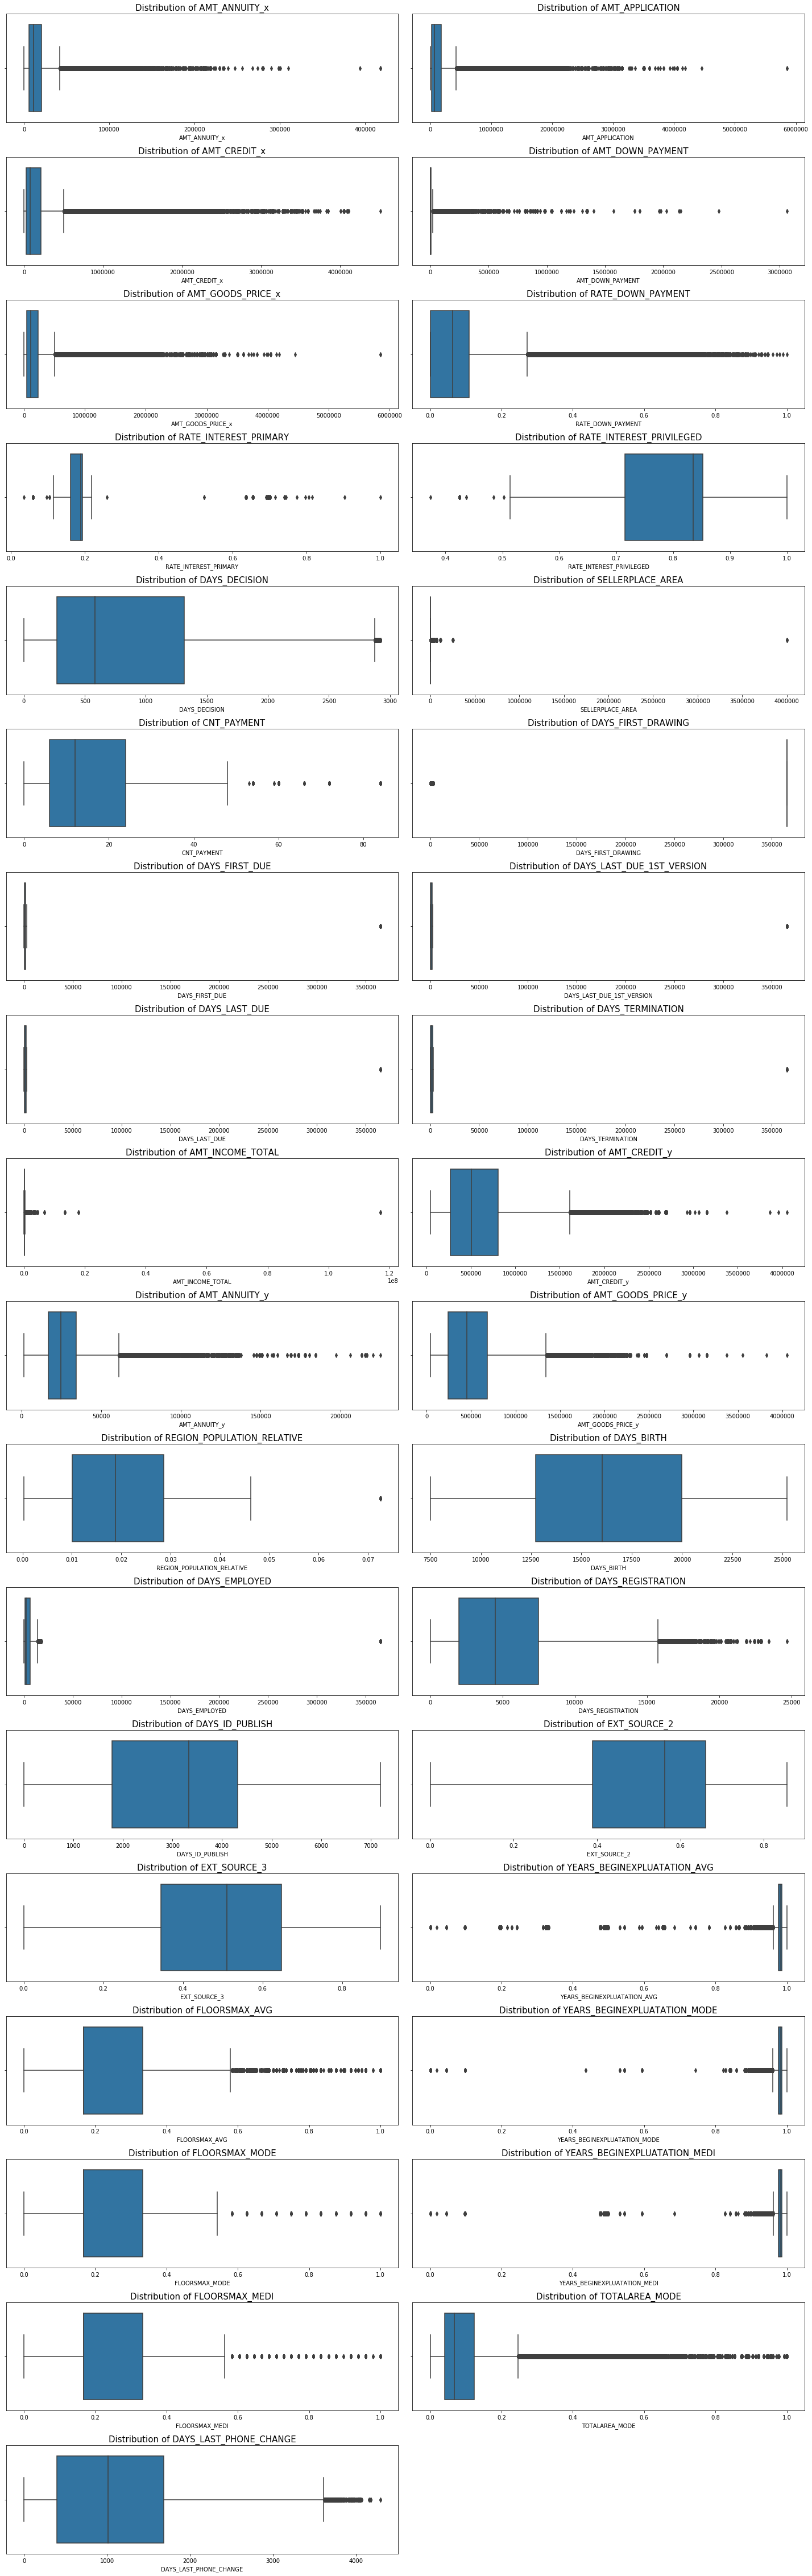

In [144]:
fig,ax = plt.subplots(nrows=18, ncols=2, figsize=(20,63))
for i, col in enumerate(columns_to_check):
    sns.boxplot(df_merged[col] , ax = ax.flatten()[i])
    ax.flatten()[i].set_title('Distribution of '+col,fontsize=15)
fig.delaxes(ax[-1, 1])  
plt.tight_layout()
plt.show()

**It is noticed that there are outliers for most of these attributes, to impute the outliers,  median is the best method**

# Analysis
___

## Analyzing NAME_CONTRACT_STATUS

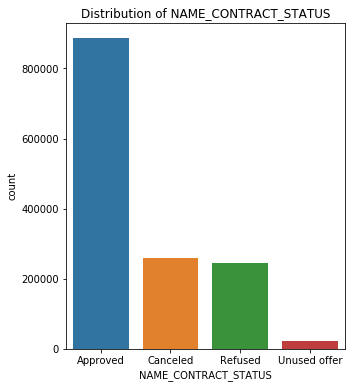

In [145]:
plt.figure(figsize=(5,6))
sns.countplot(df_merged.NAME_CONTRACT_STATUS)
plt.title('Distribution of NAME_CONTRACT_STATUS')
plt.show()

In [146]:
print(df_merged.NAME_CONTRACT_STATUS.value_counts(),'\n')
print(df_merged.NAME_CONTRACT_STATUS.value_counts(normalize=True),'\n')
print((df_merged.NAME_CONTRACT_STATUS.value_counts(normalize=True)*100).round(1),'\n')

Approved        886099
Canceled        259441
Refused         245390
Unused offer     22771
Name: NAME_CONTRACT_STATUS, dtype: int64 

Approved        0.626794
Canceled        0.183519
Refused         0.173580
Unused offer    0.016107
Name: NAME_CONTRACT_STATUS, dtype: float64 

Approved        62.7
Canceled        18.4
Refused         17.4
Unused offer     1.6
Name: NAME_CONTRACT_STATUS, dtype: float64 



From the above analysis, it is clear that   
- **62.7%** loans are **Approved**
- **18.4%** loans are **Canceled**
- **17.4%** loans are **Refused** and
- **1.6%** loans are **Unused**
  

#### **Divide the data into categories of NAME_CONTRACT_STATUS**
___

In [147]:
df_approved = df_merged[df_merged.NAME_CONTRACT_STATUS=='Approved']
df_cancelled = df_merged[df_merged.NAME_CONTRACT_STATUS=='Canceled']
df_refused = df_merged[df_merged.NAME_CONTRACT_STATUS=='Refused']
df_unused = df_merged[df_merged.NAME_CONTRACT_STATUS=='Unused offer']

## Correlation
___

### Approved loans - Correlation

In [148]:
columns_to_check=list(df_merged.columns)
columns_to_check.remove('SK_ID_CURR')
columns_to_check.remove('SK_ID_PREV')
corr_df = df_approved[columns_to_check].corr()
corr_df

AMT_ANNUITY_x  AMT_APPLICATION  AMT_CREDIT_x  \
AMT_ANNUITY_x                      1.000000         0.814540      0.826549   
AMT_APPLICATION                    0.814540         1.000000      0.961757   
AMT_CREDIT_x                       0.826549         0.961757      1.000000   
AMT_DOWN_PAYMENT                   0.257181         0.460451      0.266408   
AMT_GOODS_PRICE_x                  0.831252         1.000000      0.993331   
RATE_DOWN_PAYMENT                 -0.106049        -0.089995     -0.218200   
RATE_INTEREST_PRIMARY              0.166426         0.133360      0.150195   
RATE_INTEREST_PRIVILEGED          -0.212097        -0.204281     -0.212361   
DAYS_DECISION                     -0.262523        -0.267876     -0.272408   
SELLERPLACE_AREA                  -0.011492        -0.010885     -0.013231   
CNT_PAYMENT                        0.348058         0.650024      0.629725   
DAYS_FIRST_DRAWING                 0.052191         0.077707     -0.036418   
DAYS_FIRST_DUE                    -0.055724        -0.054380     -0.001678   
DAYS_LAST_DUE_1ST_VERSION         -0.070821        -0.092533      0.039378   
DAYS_LAST_DUE                      0.089599         0.180271      0.233459   
DAYS_TERMINATION                   0.074338         0.155554      0.222562   
AMT_INCOME_TOTAL                   0.106452         0.079669      0.079560   
AMT_CREDIT_y                       0.147687         0.124784      0.122622   
AMT_ANNUITY_y                      0.199031         0.126034      0.120010   
AMT_GOODS_PRICE_y                  0.150059         0.126560      0.122700   
REGION_POPULATION_RELATIVE         0.086041         0.060124      0.061244   
DAYS_BIRTH                         0.090857         0.120753      0.118422   
DAYS_EMPLOYED                      0.004718         0.038249      0.029994   
DAYS_REGISTRATION                  0.013593         0.029000      0.028725   
DAYS_ID_PUBLISH                    0.005820         0.017922      0.014910   
EXT_SOURCE_2                       0.080469         0.062765      0.062262   
EXT_SOURCE_3                       0.020947         0.018032      0.013692   
YEARS_BEGINEXPLUATATION_AVG        0.007628         0.002956      0.001603   
FLOORSMAX_AVG                      0.093384         0.063796      0.062747   
YEARS_BEGINEXPLUATATION_MODE       0.007367         0.002964      0.001687   
FLOORSMAX_MODE                     0.089342         0.061458      0.060504   
YEARS_BEGINEXPLUATATION_MEDI       0.007257         0.002619      0.001272   
FLOORSMAX_MEDI                     0.092607         0.063285      0.062274   
TOTALAREA_MODE                     0.068529         0.045588      0.044603   
DAYS_LAST_PHONE_CHANGE             0.046036         0.051101      0.060131   

                              AMT_DOWN_PAYMENT  AMT_GOODS_PRICE_x  \
AMT_ANNUITY_x                         0.257181           0.831252   
AMT_APPLICATION                       0.460451           1.000000   
AMT_CREDIT_x                          0.266408           0.993331   
AMT_DOWN_PAYMENT                      1.000000           0.460451   
AMT_GOODS_PRICE_x                     0.460451           1.000000   
RATE_DOWN_PAYMENT                     0.499964          -0.089995   
RATE_INTEREST_PRIMARY                 0.023258           0.133360   
RATE_INTEREST_PRIVILEGED             -0.109834          -0.204281   
DAYS_DECISION                         0.024676          -0.261411   
SELLERPLACE_AREA                      0.002224          -0.011869   
CNT_PAYMENT                           0.007620           0.640056   
DAYS_FIRST_DRAWING                   -0.000963          -0.023219   
DAYS_FIRST_DUE                       -0.012092          -0.026168   
DAYS_LAST_DUE_1ST_VERSION             0.001222           0.010270   
DAYS_LAST_DUE                        -0.032944           0.220451   
DAYS_TERMINATION                     -0.032286           0.218182   
AMT_INCOME_TOTAL                      0.034711  

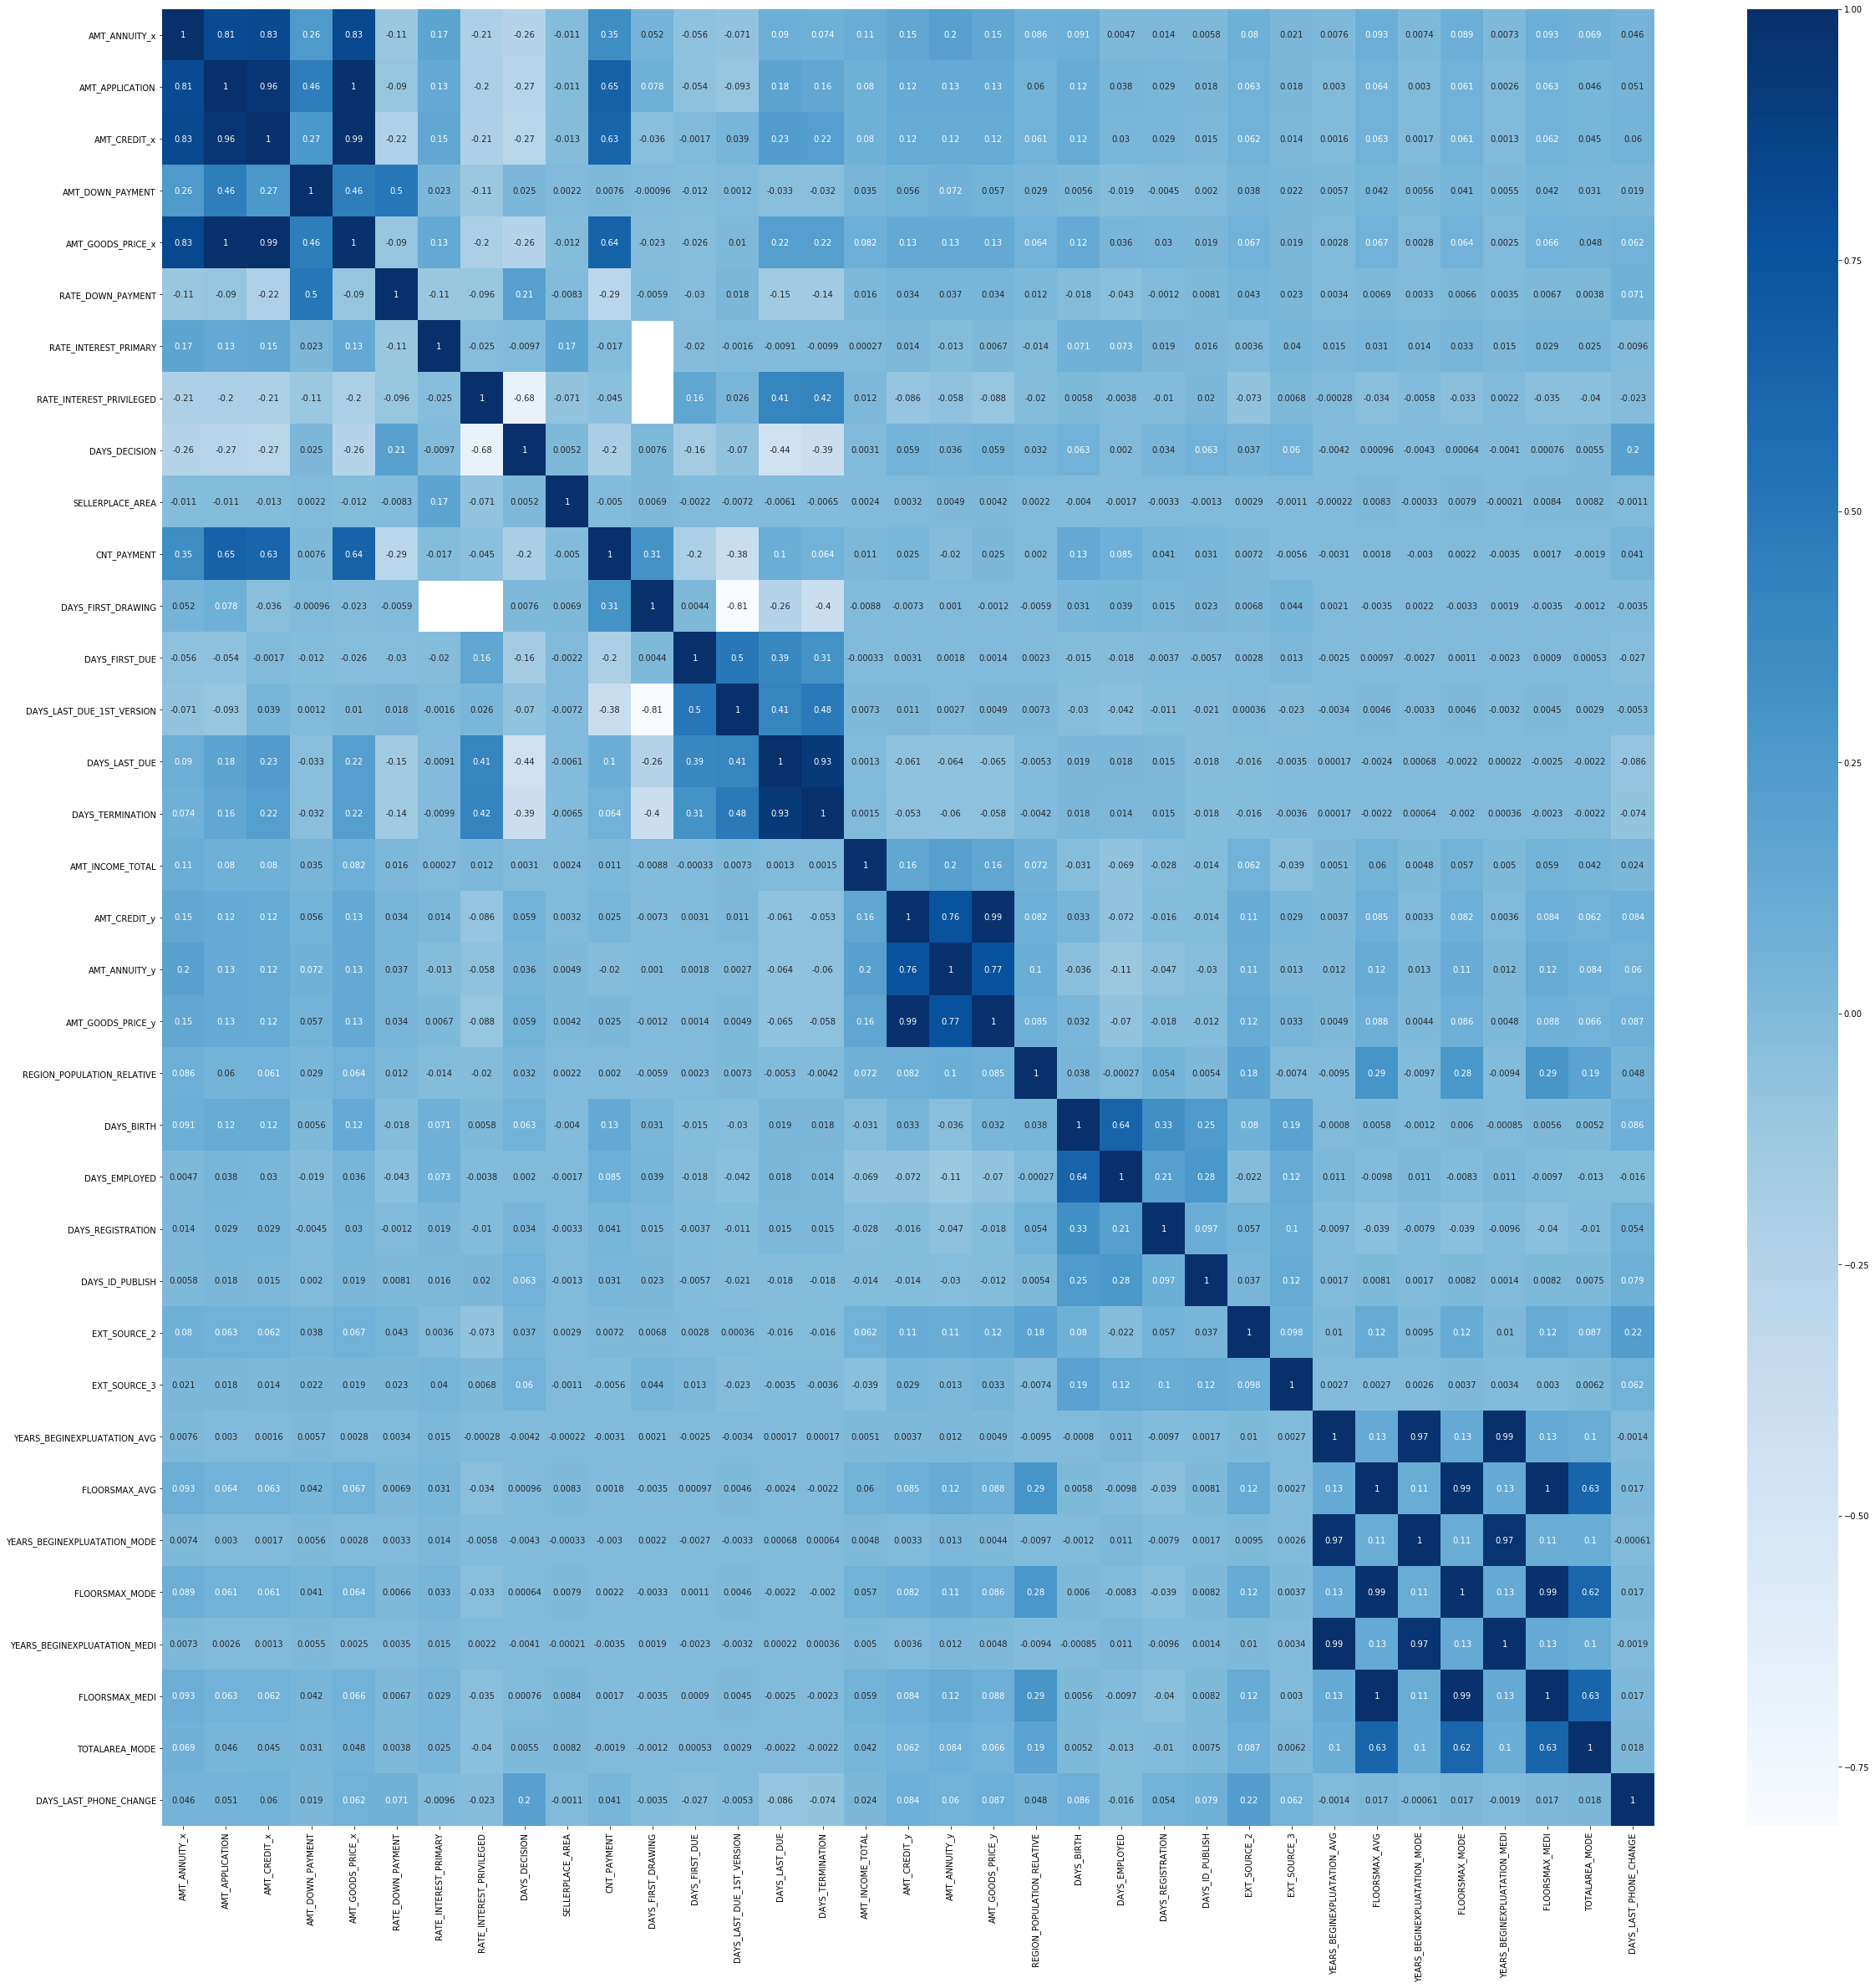

In [149]:
plt.figure(figsize=(40,40))
sns.heatmap(corr_df,annot=True,cmap='Blues')
plt.show()

**Tabulating the Correlation**  
Top 10 Highly Correlated Attributes


In [150]:
corr_df = df_approved[columns_to_check].corr()
corr_df=corr_df.where(np.triu(np.ones(corr_df.shape,'bool'),1)).unstack().reset_index()
corr_df.columns=['Attribute_1','Attribute_2','Correlation']
corr_df.dropna(subset=['Correlation'],inplace=True)
corr_df_approved = corr_df.reindex(corr_df.Correlation.abs().sort_values(ascending=False).index).reset_index(drop=True)
corr_df_approved.head(20)

Attribute_1                   Attribute_2  Correlation
0              AMT_GOODS_PRICE_x               AMT_APPLICATION     1.000000
1                 FLOORSMAX_MEDI                 FLOORSMAX_AVG     0.996904
2   YEARS_BEGINEXPLUATATION_MEDI   YEARS_BEGINEXPLUATATION_AVG     0.994055
3              AMT_GOODS_PRICE_x                  AMT_CREDIT_x     0.993331
4                 FLOORSMAX_MEDI                FLOORSMAX_MODE     0.988477
5              AMT_GOODS_PRICE_y                  AMT_CREDIT_y     0.986670
6                 FLOORSMAX_MODE                 FLOORSMAX_AVG     0.985755
7   YEARS_BEGINEXPLUATATION_MODE   YEARS_BEGINEXPLUATATION_AVG     0.973422
8   YEARS_BEGINEXPLUATATION_MEDI  YEARS_BEGINEXPLUATATION_MODE     0.965267
9                   AMT_CREDIT_x               AMT_APPLICATION     0.961757
10              DAYS_TERMINATION                 DAYS_LAST_DUE     0.927535
11             AMT_GOODS_PRICE_x                 AMT_ANNUITY_x     0.831252
12                  AMT_CREDIT_x                 AMT_ANNUITY_x     0.826549
13               AMT_APPLICATION                 AMT_ANNUITY_x     0.814540
14     DAYS_LAST_DUE_1ST_VERSION            DAYS_FIRST_DRAWING    -0.809056
15             AMT_GOODS_PRICE_y                 AMT_ANNUITY_y     0.768220
16                 AMT_ANNUITY_y                  AMT_CREDIT_y     0.764002
17                 DAYS_DECISION      RATE_INTEREST_PRIVILEGED    -0.677183
18                   CNT_PAYMENT               AMT_APPLICATION     0.650024
19                   CNT_PAYMENT             AMT_GOODS_PRICE_x     0.640056

### Canceled loans - Correlation

In [151]:
columns_to_check=list(df_cancelled.columns)
columns_to_check.remove('SK_ID_CURR')
columns_to_check.remove('SK_ID_PREV')
corr_df = df_cancelled[columns_to_check].corr()
corr_df

AMT_ANNUITY_x  AMT_APPLICATION  AMT_CREDIT_x  \
AMT_ANNUITY_x                      1.000000         0.791774      0.786726   
AMT_APPLICATION                    0.791774         1.000000      0.996822   
AMT_CREDIT_x                       0.786726         0.996822      1.000000   
AMT_DOWN_PAYMENT                   0.468066         0.633780      0.441049   
AMT_GOODS_PRICE_x                  0.791578         1.000000      0.991644   
RATE_DOWN_PAYMENT                  0.161497         0.280329      0.108967   
RATE_INTEREST_PRIMARY                   NaN              NaN           NaN   
RATE_INTEREST_PRIVILEGED                NaN              NaN           NaN   
DAYS_DECISION                     -0.012668         0.077304      0.071381   
SELLERPLACE_AREA                  -0.044120         0.043848      0.034565   
CNT_PAYMENT                        0.165381         0.556649      0.577504   
DAYS_FIRST_DRAWING                      NaN              NaN           NaN   
DAYS_FIRST_DUE                          NaN              NaN           NaN   
DAYS_LAST_DUE_1ST_VERSION               NaN              NaN           NaN   
DAYS_LAST_DUE                           NaN              NaN           NaN   
DAYS_TERMINATION                        NaN              NaN           NaN   
AMT_INCOME_TOTAL                   0.372030         0.017026      0.016518   
AMT_CREDIT_y                       0.328202         0.067835      0.066895   
AMT_ANNUITY_y                      0.389220         0.047167      0.046129   
AMT_GOODS_PRICE_y                  0.333452         0.071330      0.070150   
REGION_POPULATION_RELATIVE         0.126945         0.016743      0.016581   
DAYS_BIRTH                         0.000308        -0.002783     -0.003304   
DAYS_EMPLOYED                     -0.098376        -0.017763     -0.017976   
DAYS_REGISTRATION                 -0.019584         0.001039      0.001043   
DAYS_ID_PUBLISH                   -0.018656         0.004987      0.004600   
EXT_SOURCE_2                       0.151916         0.019630      0.019223   
EXT_SOURCE_3                       0.024814         0.014891      0.014079   
YEARS_BEGINEXPLUATATION_AVG        0.012777         0.005780      0.005771   
FLOORSMAX_AVG                      0.093582         0.004227      0.003789   
YEARS_BEGINEXPLUATATION_MODE       0.010367         0.006220      0.006227   
FLOORSMAX_MODE                     0.085871         0.003807      0.003343   
YEARS_BEGINEXPLUATATION_MEDI       0.011678         0.005738      0.005741   
FLOORSMAX_MEDI                     0.091358         0.004196      0.003762   
TOTALAREA_MODE                     0.107357         0.008133      0.007574   
DAYS_LAST_PHONE_CHANGE             0.097764         0.035277      0.034636   

                              AMT_DOWN_PAYMENT  AMT_GOODS_PRICE_x  \
AMT_ANNUITY_x                         0.468066           0.791578   
AMT_APPLICATION                       0.633780           1.000000   
AMT_CREDIT_x                          0.441049           0.991644   
AMT_DOWN_PAYMENT                      1.000000           0.633780   
AMT_GOODS_PRICE_x                     0.633780           1.000000   
RATE_DOWN_PAYMENT                     0.734787           0.280329   
RATE_INTEREST_PRIMARY                      NaN                NaN   
RATE_INTEREST_PRIVILEGED                   NaN                NaN   
DAYS_DECISION                         0.329499          -0.036298   
SELLERPLACE_AREA                      0.237124          -0.021161   
CNT_PAYMENT                           0.431371           0.555569   
DAYS_FIRST_DRAWING                         NaN                NaN   
DAYS_FIRST_DUE                             NaN                NaN   
DAYS_LAST_DUE_1ST_VERSION                  NaN                NaN   
DAYS_LAST_DUE                              NaN                NaN   
DAYS_TERMINATION                           NaN                NaN   
AMT_INCOME_TOTAL                      0.071072  

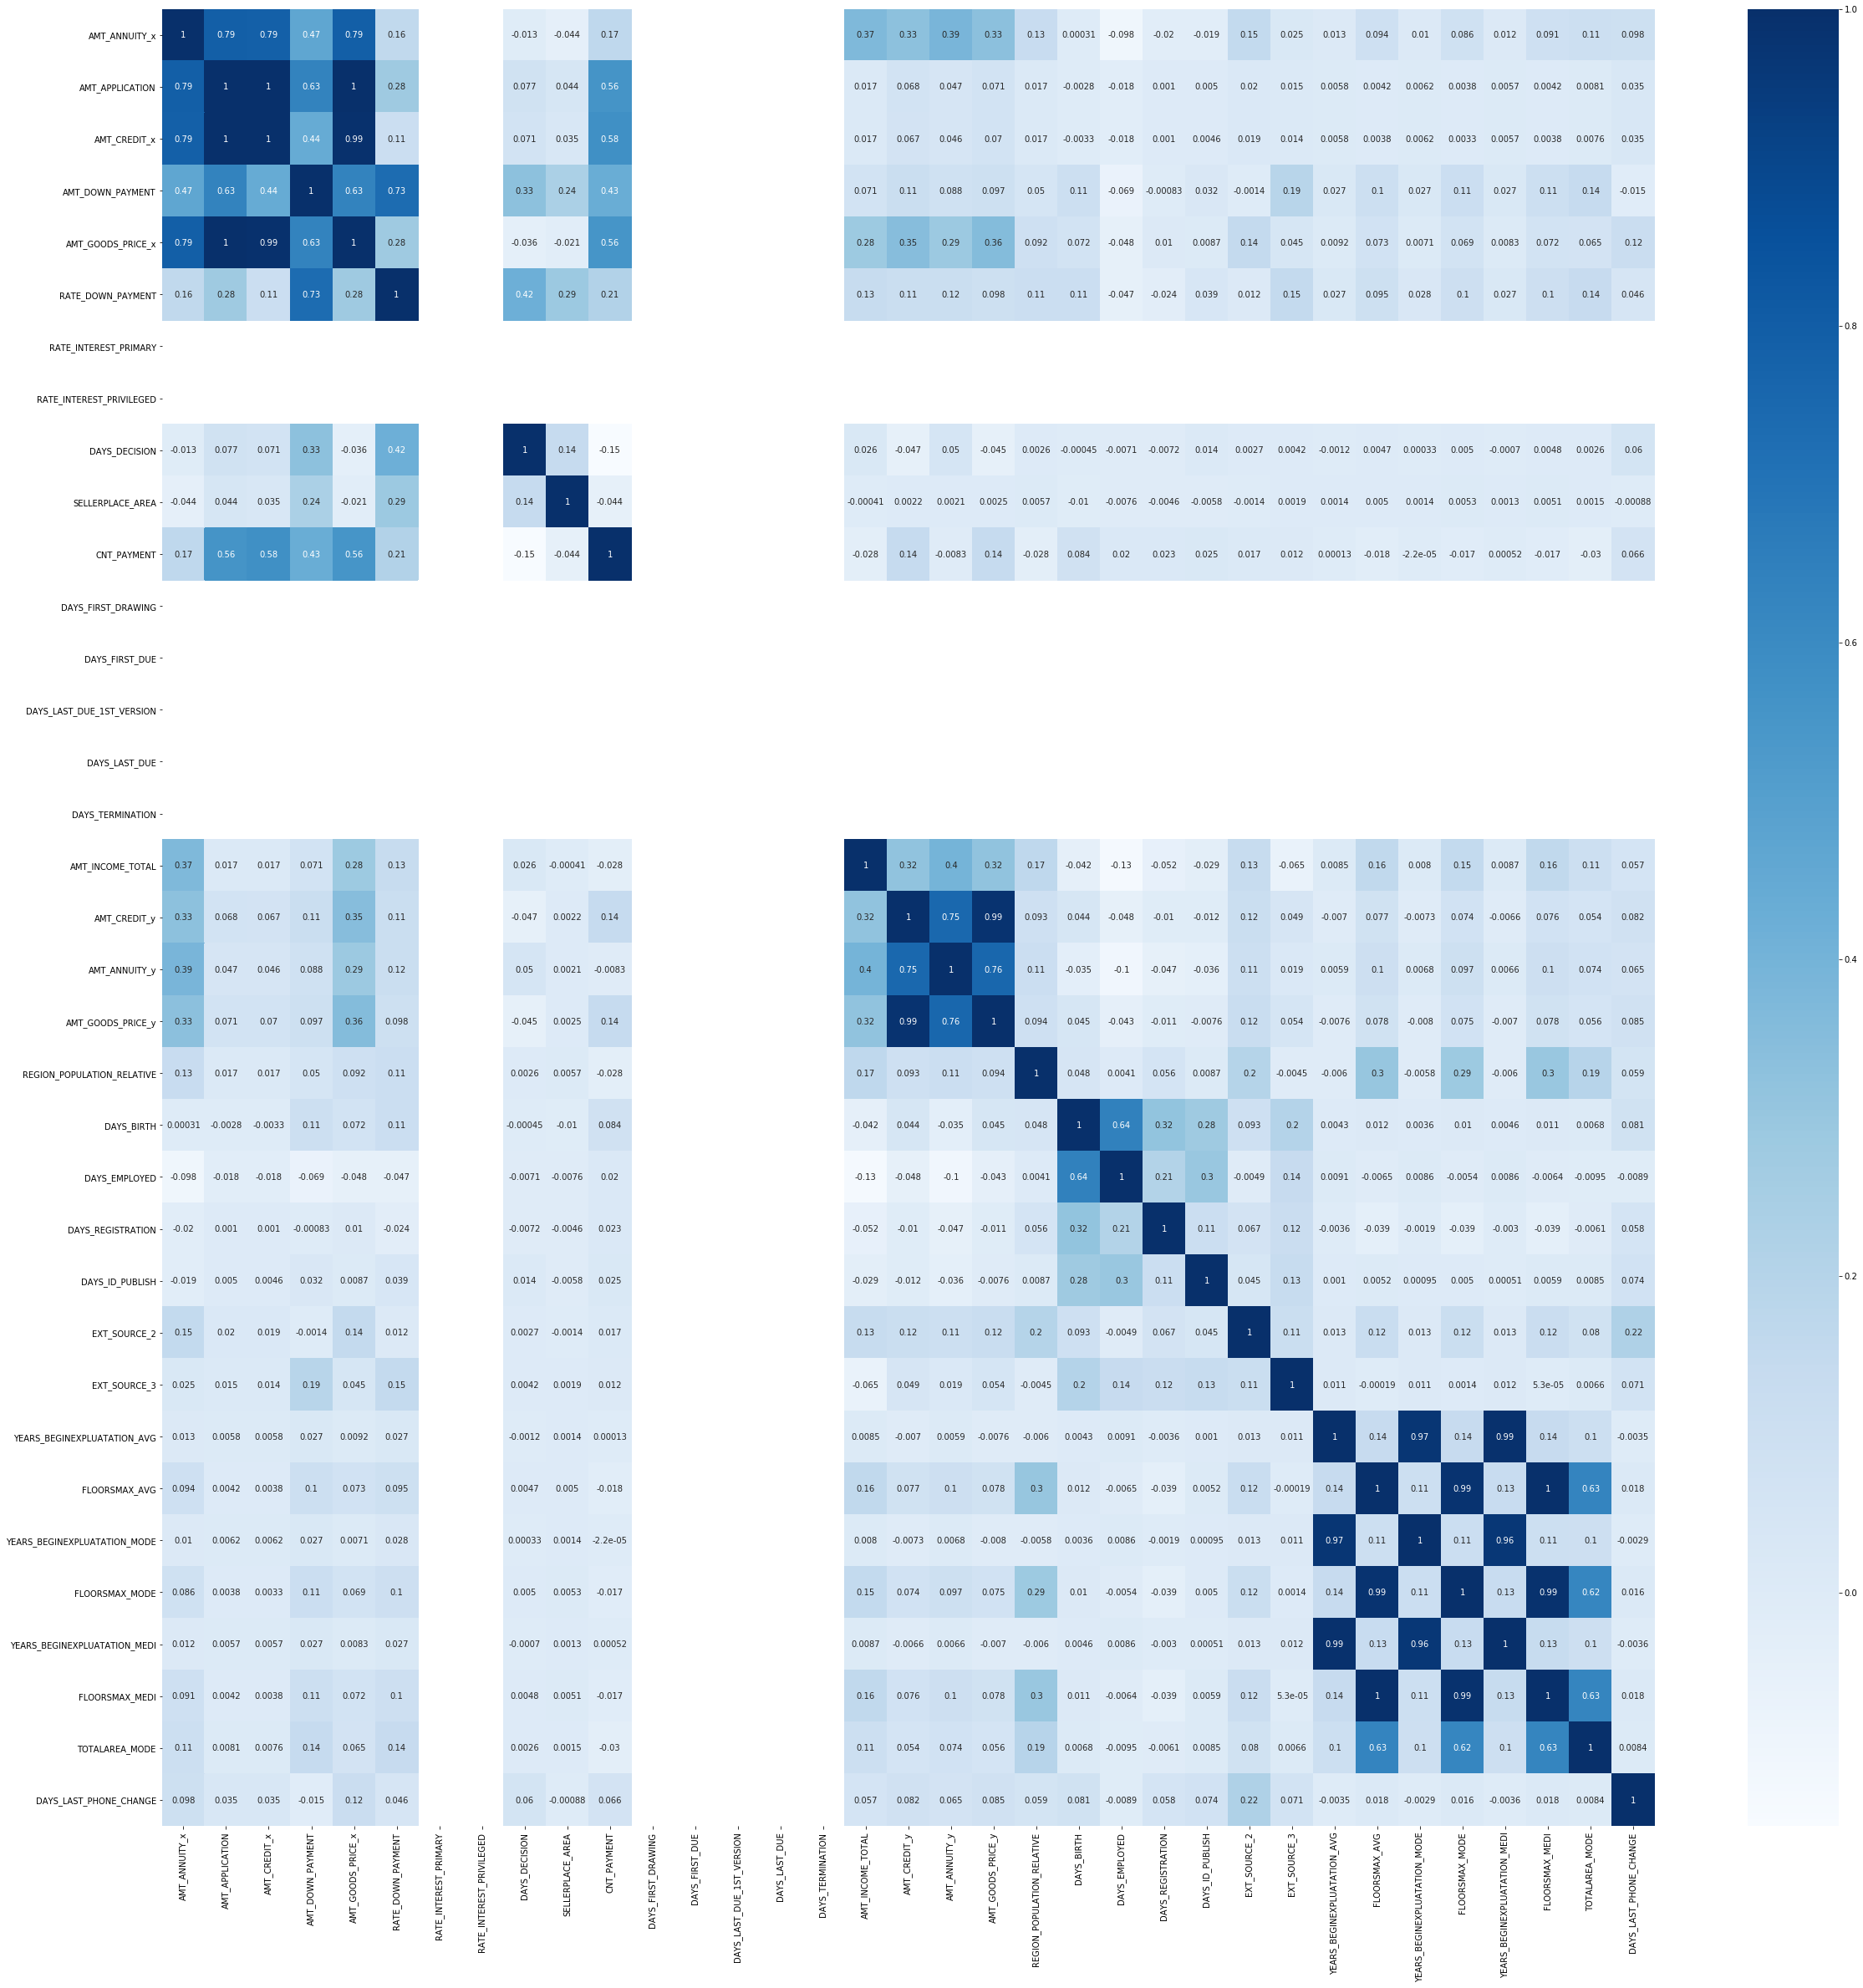

In [152]:
plt.figure(figsize=(40,40))
sns.heatmap(corr_df,annot=True,cmap='Blues')
plt.show()

**Tabulating the Correlation**  
Top 10 Highly Correlated Attributes


In [153]:
corr_df = df_cancelled[columns_to_check].corr()
corr_df=corr_df.where(np.triu(np.ones(corr_df.shape,'bool'),1)).unstack().reset_index()
corr_df.columns=['Attribute_1','Attribute_2','Correlation']
corr_df.dropna(subset=['Correlation'],inplace=True)
corr_df_cancelled = corr_df.reindex(corr_df.Correlation.abs().sort_values(ascending=False).index).reset_index(drop=True)
corr_df_cancelled.head(20)

Attribute_1                   Attribute_2  Correlation
0              AMT_GOODS_PRICE_x               AMT_APPLICATION     1.000000
1                   AMT_CREDIT_x               AMT_APPLICATION     0.996822
2                 FLOORSMAX_MEDI                 FLOORSMAX_AVG     0.996744
3   YEARS_BEGINEXPLUATATION_MEDI   YEARS_BEGINEXPLUATATION_AVG     0.993967
4              AMT_GOODS_PRICE_x                  AMT_CREDIT_x     0.991644
5                 FLOORSMAX_MEDI                FLOORSMAX_MODE     0.988770
6                 FLOORSMAX_MODE                 FLOORSMAX_AVG     0.985930
7              AMT_GOODS_PRICE_y                  AMT_CREDIT_y     0.985910
8   YEARS_BEGINEXPLUATATION_MODE   YEARS_BEGINEXPLUATATION_AVG     0.972658
9   YEARS_BEGINEXPLUATATION_MEDI  YEARS_BEGINEXPLUATATION_MODE     0.964563
10               AMT_APPLICATION                 AMT_ANNUITY_x     0.791774
11             AMT_GOODS_PRICE_x                 AMT_ANNUITY_x     0.791578
12                  AMT_CREDIT_x                 AMT_ANNUITY_x     0.786726
13             AMT_GOODS_PRICE_y                 AMT_ANNUITY_y     0.757056
14                 AMT_ANNUITY_y                  AMT_CREDIT_y     0.752819
15             RATE_DOWN_PAYMENT              AMT_DOWN_PAYMENT     0.734787
16                 DAYS_EMPLOYED                    DAYS_BIRTH     0.642190
17              AMT_DOWN_PAYMENT               AMT_APPLICATION     0.633780
18             AMT_GOODS_PRICE_x              AMT_DOWN_PAYMENT     0.633780
19                TOTALAREA_MODE                 FLOORSMAX_AVG     0.628297

Top 10 Least Correlated Attributes


In [154]:
corr_df_cancelled.tail(10)

Attribute_1       Attribute_2  Correlation
368  YEARS_BEGINEXPLUATATION_MEDI       CNT_PAYMENT     0.000521
369  YEARS_BEGINEXPLUATATION_MEDI   DAYS_ID_PUBLISH     0.000513
370                    DAYS_BIRTH     DAYS_DECISION    -0.000445
371              AMT_INCOME_TOTAL  SELLERPLACE_AREA    -0.000407
372  YEARS_BEGINEXPLUATATION_MODE     DAYS_DECISION     0.000335
373                    DAYS_BIRTH     AMT_ANNUITY_x     0.000308
374                 FLOORSMAX_AVG      EXT_SOURCE_3    -0.000186
375   YEARS_BEGINEXPLUATATION_AVG       CNT_PAYMENT     0.000133
376                FLOORSMAX_MEDI      EXT_SOURCE_3     0.000053
377  YEARS_BEGINEXPLUATATION_MODE       CNT_PAYMENT    -0.000022

### Refused loans - Correlation

In [155]:
columns_to_check=list(df_refused.columns)
columns_to_check.remove('SK_ID_CURR')
columns_to_check.remove('SK_ID_PREV')
corr_df = df_refused[columns_to_check].corr()
corr_df

AMT_ANNUITY_x  AMT_APPLICATION  AMT_CREDIT_x  \
AMT_ANNUITY_x                      1.000000         0.820451      0.823054   
AMT_APPLICATION                    0.820451         1.000000      0.983684   
AMT_CREDIT_x                       0.823054         0.983684      1.000000   
AMT_DOWN_PAYMENT                   0.310407         0.535188      0.379962   
AMT_GOODS_PRICE_x                  0.825296         0.999666      0.991842   
RATE_DOWN_PAYMENT                 -0.089771        -0.026818     -0.116541   
RATE_INTEREST_PRIMARY                   NaN              NaN           NaN   
RATE_INTEREST_PRIVILEGED                NaN              NaN           NaN   
DAYS_DECISION                     -0.294443        -0.268932     -0.274915   
SELLERPLACE_AREA                  -0.072058        -0.061574     -0.069555   
CNT_PAYMENT                        0.430827         0.670795      0.677202   
DAYS_FIRST_DRAWING                      NaN              NaN           NaN   
DAYS_FIRST_DUE                          NaN              NaN           NaN   
DAYS_LAST_DUE_1ST_VERSION               NaN              NaN           NaN   
DAYS_LAST_DUE                           NaN              NaN           NaN   
DAYS_TERMINATION                        NaN              NaN           NaN   
AMT_INCOME_TOTAL                   0.257565         0.202374      0.198453   
AMT_CREDIT_y                       0.196186         0.194042      0.193236   
AMT_ANNUITY_y                      0.224389         0.157319      0.155022   
AMT_GOODS_PRICE_y                  0.197163         0.196154      0.193333   
REGION_POPULATION_RELATIVE         0.069324         0.043420      0.043379   
DAYS_BIRTH                         0.085234         0.103902      0.104279   
DAYS_EMPLOYED                     -0.023457         0.003008     -0.001115   
DAYS_REGISTRATION                  0.000430         0.016149      0.016919   
DAYS_ID_PUBLISH                    0.013889         0.029581      0.030046   
EXT_SOURCE_2                       0.085502         0.072830      0.070811   
EXT_SOURCE_3                      -0.025211         0.001762     -0.002765   
YEARS_BEGINEXPLUATATION_AVG        0.009750         0.000705     -0.001529   
FLOORSMAX_AVG                      0.079732         0.050424      0.047967   
YEARS_BEGINEXPLUATATION_MODE       0.008804         0.001228     -0.000937   
FLOORSMAX_MODE                     0.077545         0.049172      0.046883   
YEARS_BEGINEXPLUATATION_MEDI       0.009917         0.001016     -0.001220   
FLOORSMAX_MEDI                     0.079088         0.049925      0.047538   
TOTALAREA_MODE                     0.053085         0.029581      0.027736   
DAYS_LAST_PHONE_CHANGE             0.059171         0.072376      0.075403   

                              AMT_DOWN_PAYMENT  AMT_GOODS_PRICE_x  \
AMT_ANNUITY_x                         0.310407           0.825296   
AMT_APPLICATION                       0.535188           0.999666   
AMT_CREDIT_x                          0.379962           0.991842   
AMT_DOWN_PAYMENT                      1.000000           0.535188   
AMT_GOODS_PRICE_x                     0.535188           1.000000   
RATE_DOWN_PAYMENT                     0.408456          -0.026818   
RATE_INTEREST_PRIMARY                      NaN                NaN   
RATE_INTEREST_PRIVILEGED                   NaN                NaN   
DAYS_DECISION                        -0.006414          -0.339887   
SELLERPLACE_AREA                      0.033433          -0.079531   
CNT_PAYMENT                           0.095623           0.658754   
DAYS_FIRST_DRAWING                         NaN                NaN   
DAYS_FIRST_DUE                             NaN                NaN   
DAYS_LAST_DUE_1ST_VERSION                  NaN                NaN   
DAYS_LAST_DUE                              NaN                NaN   
DAYS_TERMINATION                           NaN                NaN   
AMT_INCOME_TOTAL                      0.077113  

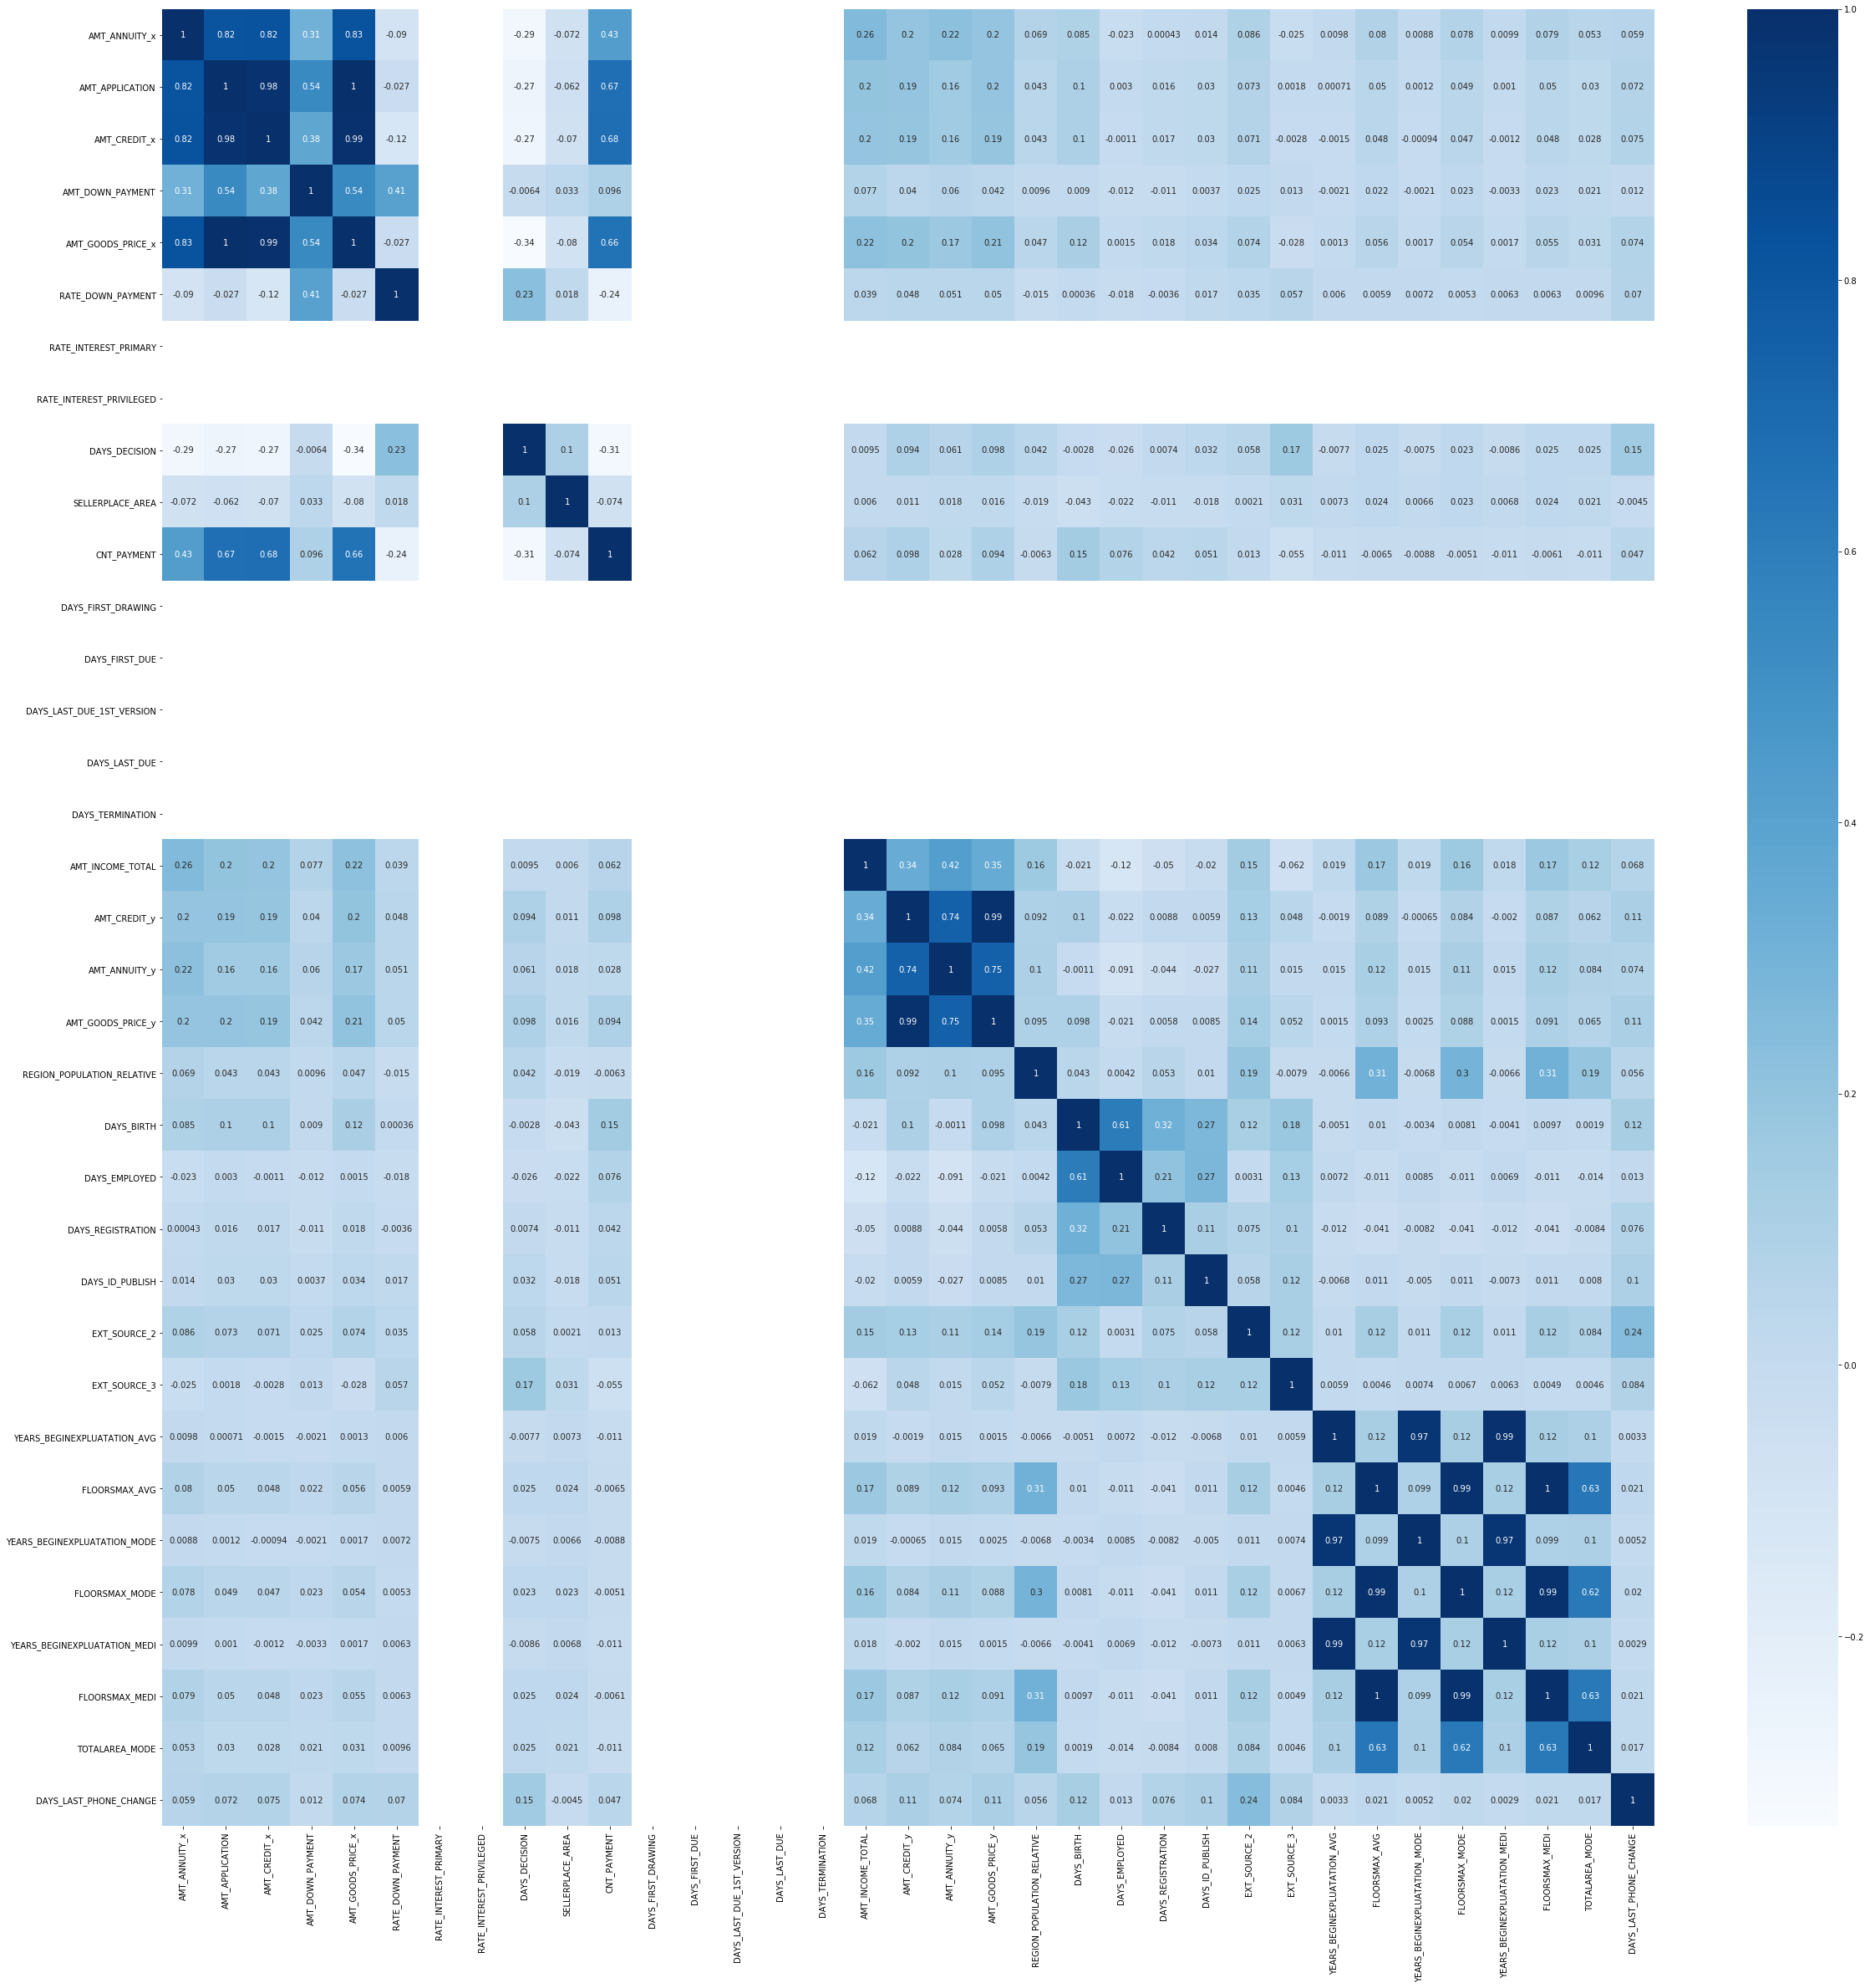

In [156]:
plt.figure(figsize=(40,40))
sns.heatmap(corr_df,annot=True,cmap='Blues')
plt.show()

**Tabulating the Correlation**  
Top 10 Highly Correlated Attributes


In [157]:
corr_df = df_refused[columns_to_check].corr()
corr_df=corr_df.where(np.triu(np.ones(corr_df.shape,'bool'),1)).unstack().reset_index()
corr_df.columns=['Attribute_1','Attribute_2','Correlation']
corr_df.dropna(subset=['Correlation'],inplace=True)
corr_df_refused = corr_df.reindex(corr_df.Correlation.abs().sort_values(ascending=False).index).reset_index(drop=True)
corr_df_refused.head(20)

Attribute_1                   Attribute_2  Correlation
0              AMT_GOODS_PRICE_x               AMT_APPLICATION     0.999666
1                 FLOORSMAX_MEDI                 FLOORSMAX_AVG     0.997172
2   YEARS_BEGINEXPLUATATION_MEDI   YEARS_BEGINEXPLUATATION_AVG     0.994698
3              AMT_GOODS_PRICE_x                  AMT_CREDIT_x     0.991842
4                 FLOORSMAX_MEDI                FLOORSMAX_MODE     0.988717
5                 FLOORSMAX_MODE                 FLOORSMAX_AVG     0.986003
6              AMT_GOODS_PRICE_y                  AMT_CREDIT_y     0.985178
7                   AMT_CREDIT_x               AMT_APPLICATION     0.983684
8   YEARS_BEGINEXPLUATATION_MODE   YEARS_BEGINEXPLUATATION_AVG     0.972070
9   YEARS_BEGINEXPLUATATION_MEDI  YEARS_BEGINEXPLUATATION_MODE     0.966904
10             AMT_GOODS_PRICE_x                 AMT_ANNUITY_x     0.825296
11                  AMT_CREDIT_x                 AMT_ANNUITY_x     0.823054
12               AMT_APPLICATION                 AMT_ANNUITY_x     0.820451
13             AMT_GOODS_PRICE_y                 AMT_ANNUITY_y     0.746660
14                 AMT_ANNUITY_y                  AMT_CREDIT_y     0.744650
15                   CNT_PAYMENT                  AMT_CREDIT_x     0.677202
16                   CNT_PAYMENT               AMT_APPLICATION     0.670795
17                   CNT_PAYMENT             AMT_GOODS_PRICE_x     0.658754
18                TOTALAREA_MODE                 FLOORSMAX_AVG     0.631152
19                TOTALAREA_MODE                FLOORSMAX_MEDI     0.627617

Top 10 Least Correlated Attributes


In [158]:
corr_df_refused.tail(10)

Attribute_1        Attribute_2  Correlation
368  YEARS_BEGINEXPLUATATION_MODE    AMT_APPLICATION     0.001228
369  YEARS_BEGINEXPLUATATION_MEDI       AMT_CREDIT_x    -0.001220
370                 DAYS_EMPLOYED       AMT_CREDIT_x    -0.001115
371                    DAYS_BIRTH      AMT_ANNUITY_y    -0.001101
372  YEARS_BEGINEXPLUATATION_MEDI    AMT_APPLICATION     0.001016
373  YEARS_BEGINEXPLUATATION_MODE       AMT_CREDIT_x    -0.000937
374   YEARS_BEGINEXPLUATATION_AVG    AMT_APPLICATION     0.000705
375  YEARS_BEGINEXPLUATATION_MODE       AMT_CREDIT_y    -0.000654
376             DAYS_REGISTRATION      AMT_ANNUITY_x     0.000430
377                    DAYS_BIRTH  RATE_DOWN_PAYMENT     0.000358

### Unused loans - Correlation

In [159]:
columns_to_check=list(df_unused.columns)
columns_to_check.remove('SK_ID_CURR')
columns_to_check.remove('SK_ID_PREV')
corr_df = df_unused[columns_to_check].corr()
corr_df

AMT_ANNUITY_x  AMT_APPLICATION  AMT_CREDIT_x  \
AMT_ANNUITY_x                      1.000000         0.937230      0.940305   
AMT_APPLICATION                    0.937230         1.000000      0.999758   
AMT_CREDIT_x                       0.940305         0.999758      1.000000   
AMT_DOWN_PAYMENT                   0.001927         0.004007      0.003586   
AMT_GOODS_PRICE_x                  0.939899         1.000000      0.999967   
RATE_DOWN_PAYMENT                 -0.003935         0.002283      0.001993   
RATE_INTEREST_PRIMARY                   NaN              NaN           NaN   
RATE_INTEREST_PRIVILEGED                NaN              NaN           NaN   
DAYS_DECISION                     -0.105800        -0.048007     -0.048281   
SELLERPLACE_AREA                  -0.025410         0.133063      0.132971   
CNT_PAYMENT                       -0.077755         0.167967      0.139361   
DAYS_FIRST_DRAWING                      NaN              NaN           NaN   
DAYS_FIRST_DUE                          NaN              NaN           NaN   
DAYS_LAST_DUE_1ST_VERSION               NaN              NaN           NaN   
DAYS_LAST_DUE                           NaN              NaN           NaN   
DAYS_TERMINATION                        NaN              NaN           NaN   
AMT_INCOME_TOTAL                   0.227436         0.020411      0.020394   
AMT_CREDIT_y                       0.105636         0.074817      0.074733   
AMT_ANNUITY_y                      0.173420         0.106256      0.106166   
AMT_GOODS_PRICE_y                  0.101841         0.074264      0.074152   
REGION_POPULATION_RELATIVE         0.019630         0.039209      0.038940   
DAYS_BIRTH                        -0.095292        -0.011324     -0.011124   
DAYS_EMPLOYED                     -0.025084         0.004691      0.005098   
DAYS_REGISTRATION                 -0.037165        -0.000431     -0.000209   
DAYS_ID_PUBLISH                   -0.075784        -0.031854     -0.031782   
EXT_SOURCE_2                       0.059065         0.016694      0.016869   
EXT_SOURCE_3                      -0.074087        -0.009588     -0.009419   
YEARS_BEGINEXPLUATATION_AVG        0.000735         0.016563      0.016417   
FLOORSMAX_AVG                      0.117681         0.074652      0.074562   
YEARS_BEGINEXPLUATATION_MODE      -0.015932         0.016559      0.016302   
FLOORSMAX_MODE                     0.113338         0.073431      0.073340   
YEARS_BEGINEXPLUATATION_MEDI       0.009161         0.015308      0.015166   
FLOORSMAX_MEDI                     0.114488         0.074053      0.073964   
TOTALAREA_MODE                     0.017755         0.042437      0.042466   
DAYS_LAST_PHONE_CHANGE            -0.055946        -0.012983     -0.013125   

                              AMT_DOWN_PAYMENT  AMT_GOODS_PRICE_x  \
AMT_ANNUITY_x                         0.001927           0.939899   
AMT_APPLICATION                       0.004007           1.000000   
AMT_CREDIT_x                          0.003586           0.999967   
AMT_DOWN_PAYMENT                      1.000000           0.004007   
AMT_GOODS_PRICE_x                     0.004007           1.000000   
RATE_DOWN_PAYMENT                     0.965047           0.002283   
RATE_INTEREST_PRIMARY                      NaN                NaN   
RATE_INTEREST_PRIVILEGED                   NaN                NaN   
DAYS_DECISION                        -0.005196          -0.048174   
SELLERPLACE_AREA                     -0.001656           0.133030   
CNT_PAYMENT                           0.022500           0.157414   
DAYS_FIRST_DRAWING                         NaN                NaN   
DAYS_FIRST_DUE                             NaN                NaN   
DAYS_LAST_DUE_1ST_VERSION                  NaN                NaN   
DAYS_LAST_DUE                              NaN                NaN   
DAYS_TERMINATION                           NaN                NaN   
AMT_INCOME_TOTAL                      0.000513  

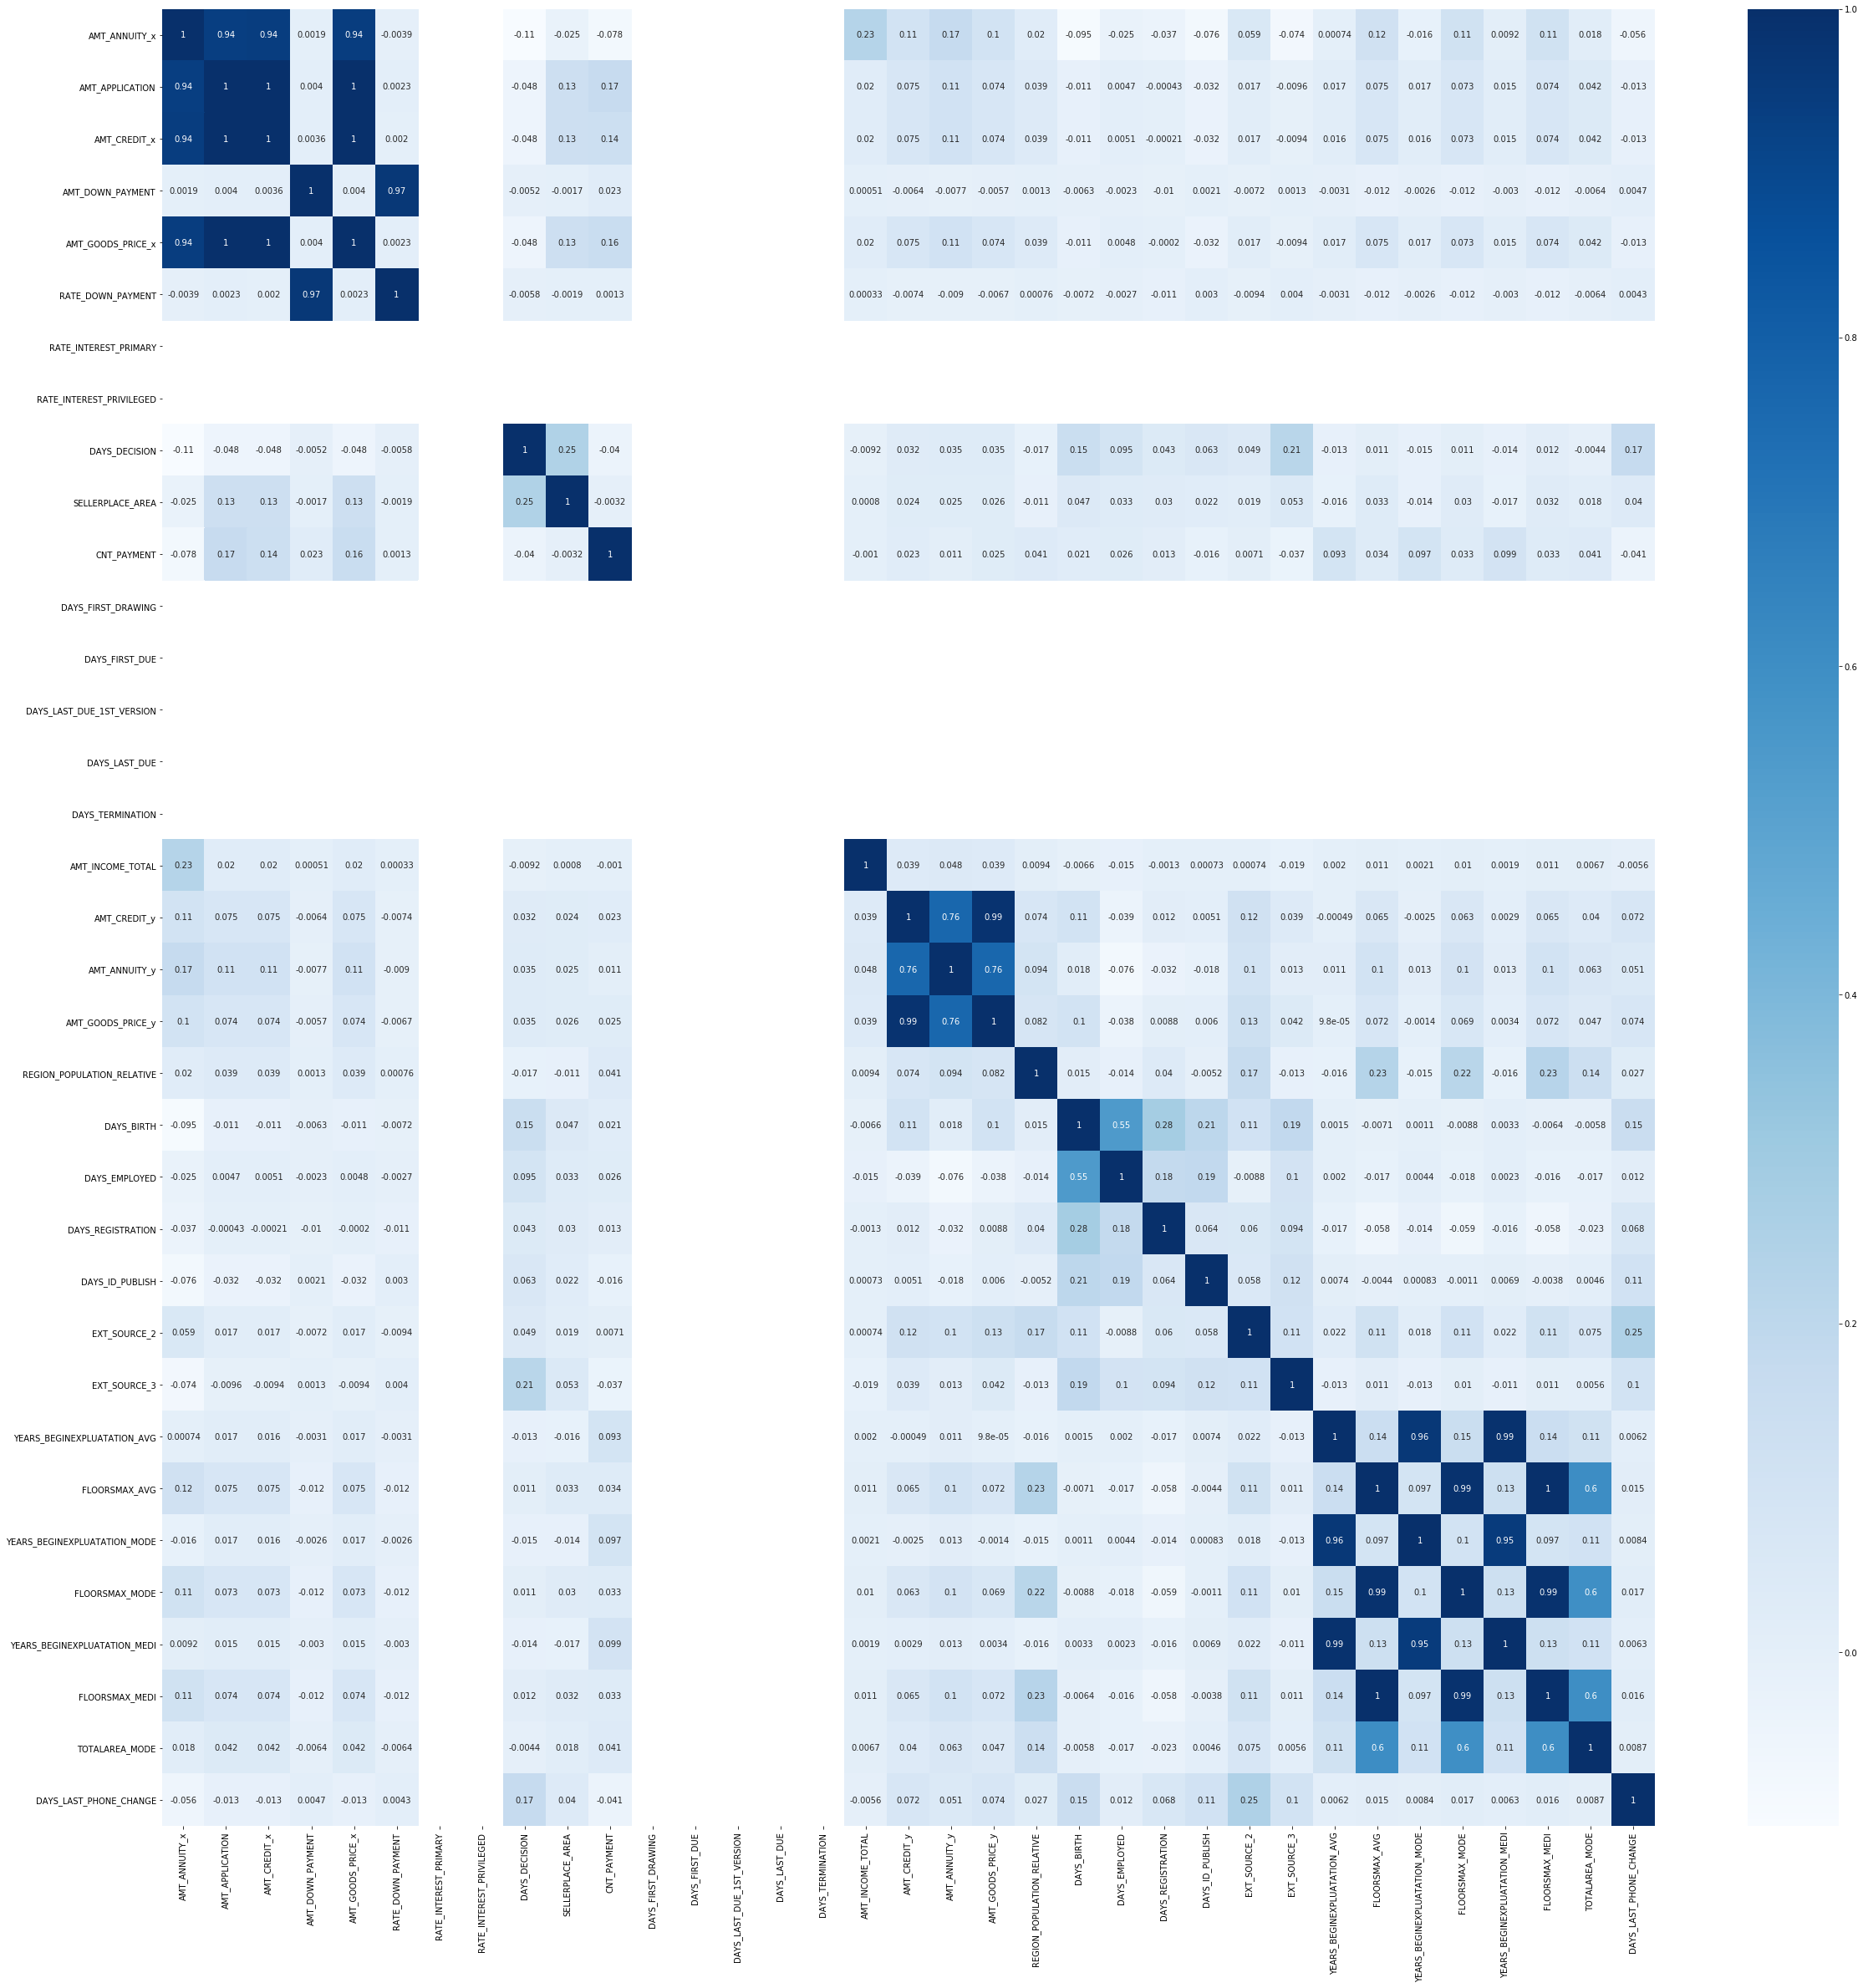

In [160]:
plt.figure(figsize=(40,40))
sns.heatmap(corr_df,annot=True,cmap='Blues')
plt.show()

**Tabulating the Correlation**  
Top 10 Highly Correlated Attributes


In [161]:
corr_df = df_unused[columns_to_check].corr()
corr_df=corr_df.where(np.triu(np.ones(corr_df.shape,'bool'),1)).unstack().reset_index()
corr_df.columns=['Attribute_1','Attribute_2','Correlation']
corr_df.dropna(subset=['Correlation'],inplace=True)
corr_df_unused = corr_df.reindex(corr_df.Correlation.abs().sort_values(ascending=False).index).reset_index(drop=True)
corr_df_unused.head(20)

Attribute_1                   Attribute_2  Correlation
0              AMT_GOODS_PRICE_x               AMT_APPLICATION     1.000000
1              AMT_GOODS_PRICE_x                  AMT_CREDIT_x     0.999967
2                   AMT_CREDIT_x               AMT_APPLICATION     0.999758
3                 FLOORSMAX_MEDI                 FLOORSMAX_AVG     0.997626
4   YEARS_BEGINEXPLUATATION_MEDI   YEARS_BEGINEXPLUATATION_AVG     0.989668
5                 FLOORSMAX_MEDI                FLOORSMAX_MODE     0.989190
6                 FLOORSMAX_MODE                 FLOORSMAX_AVG     0.987644
7              AMT_GOODS_PRICE_y                  AMT_CREDIT_y     0.986124
8              RATE_DOWN_PAYMENT              AMT_DOWN_PAYMENT     0.965047
9   YEARS_BEGINEXPLUATATION_MODE   YEARS_BEGINEXPLUATATION_AVG     0.964608
10  YEARS_BEGINEXPLUATATION_MEDI  YEARS_BEGINEXPLUATATION_MODE     0.948600
11                  AMT_CREDIT_x                 AMT_ANNUITY_x     0.940305
12             AMT_GOODS_PRICE_x                 AMT_ANNUITY_x     0.939899
13               AMT_APPLICATION                 AMT_ANNUITY_x     0.937230
14             AMT_GOODS_PRICE_y                 AMT_ANNUITY_y     0.764804
15                 AMT_ANNUITY_y                  AMT_CREDIT_y     0.763008
16                TOTALAREA_MODE                 FLOORSMAX_AVG     0.604095
17                TOTALAREA_MODE                FLOORSMAX_MEDI     0.601040
18                TOTALAREA_MODE                FLOORSMAX_MODE     0.598037
19                 DAYS_EMPLOYED                    DAYS_BIRTH     0.545913

Top 10 Least Correlated Attributes


In [162]:
corr_df_unused.tail(10)

Attribute_1        Attribute_2  Correlation
368                 EXT_SOURCE_2   AMT_INCOME_TOTAL     0.000741
369  YEARS_BEGINEXPLUATATION_AVG      AMT_ANNUITY_x     0.000735
370              DAYS_ID_PUBLISH   AMT_INCOME_TOTAL     0.000728
371             AMT_INCOME_TOTAL   AMT_DOWN_PAYMENT     0.000513
372  YEARS_BEGINEXPLUATATION_AVG       AMT_CREDIT_y    -0.000490
373            DAYS_REGISTRATION    AMT_APPLICATION    -0.000431
374             AMT_INCOME_TOTAL  RATE_DOWN_PAYMENT     0.000330
375            DAYS_REGISTRATION       AMT_CREDIT_x    -0.000209
376            DAYS_REGISTRATION  AMT_GOODS_PRICE_x    -0.000196
377  YEARS_BEGINEXPLUATATION_AVG  AMT_GOODS_PRICE_y     0.000098

#### Summary  
**It is noticed that there are some very high correlations and there are some very low correlation, as displayed above for different loan types the most and least correlated variables**

## Univariate Analysis
___

### 1. Continuous Variable

In [163]:
df_merged.select_dtypes(['int','float','int64','float64']).columns

Index(['SK_ID_PREV', 'SK_ID_CURR', 'AMT_ANNUITY_x', 'AMT_APPLICATION',
       'AMT_CREDIT_x', 'AMT_DOWN_PAYMENT', 'AMT_GOODS_PRICE_x',
       'RATE_DOWN_PAYMENT', 'RATE_INTEREST_PRIMARY',
       'RATE_INTEREST_PRIVILEGED', 'DAYS_DECISION', 'SELLERPLACE_AREA',
       'CNT_PAYMENT', 'DAYS_FIRST_DRAWING', 'DAYS_FIRST_DUE',
       'DAYS_LAST_DUE_1ST_VERSION', 'DAYS_LAST_DUE', 'DAYS_TERMINATION',
       'AMT_INCOME_TOTAL', 'AMT_CREDIT_y', 'AMT_ANNUITY_y',
       'AMT_GOODS_PRICE_y', 'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH',
       'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'EXT_SOURCE_2',
       'EXT_SOURCE_3', 'YEARS_BEGINEXPLUATATION_AVG', 'FLOORSMAX_AVG',
       'YEARS_BEGINEXPLUATATION_MODE', 'FLOORSMAX_MODE',
       'YEARS_BEGINEXPLUATATION_MEDI', 'FLOORSMAX_MEDI', 'TOTALAREA_MODE',
       'DAYS_LAST_PHONE_CHANGE'],
      dtype='object')

In [164]:
columns_to_plot = ['AMT_APPLICATION','AMT_CREDIT_x', 'AMT_ANNUITY_x', 'AMT_DOWN_PAYMENT',
                   'RATE_INTEREST_PRIMARY','RATE_DOWN_PAYMENT', 'DAYS_DECISION','SELLERPLACE_AREA']

#### **Using Histograms**

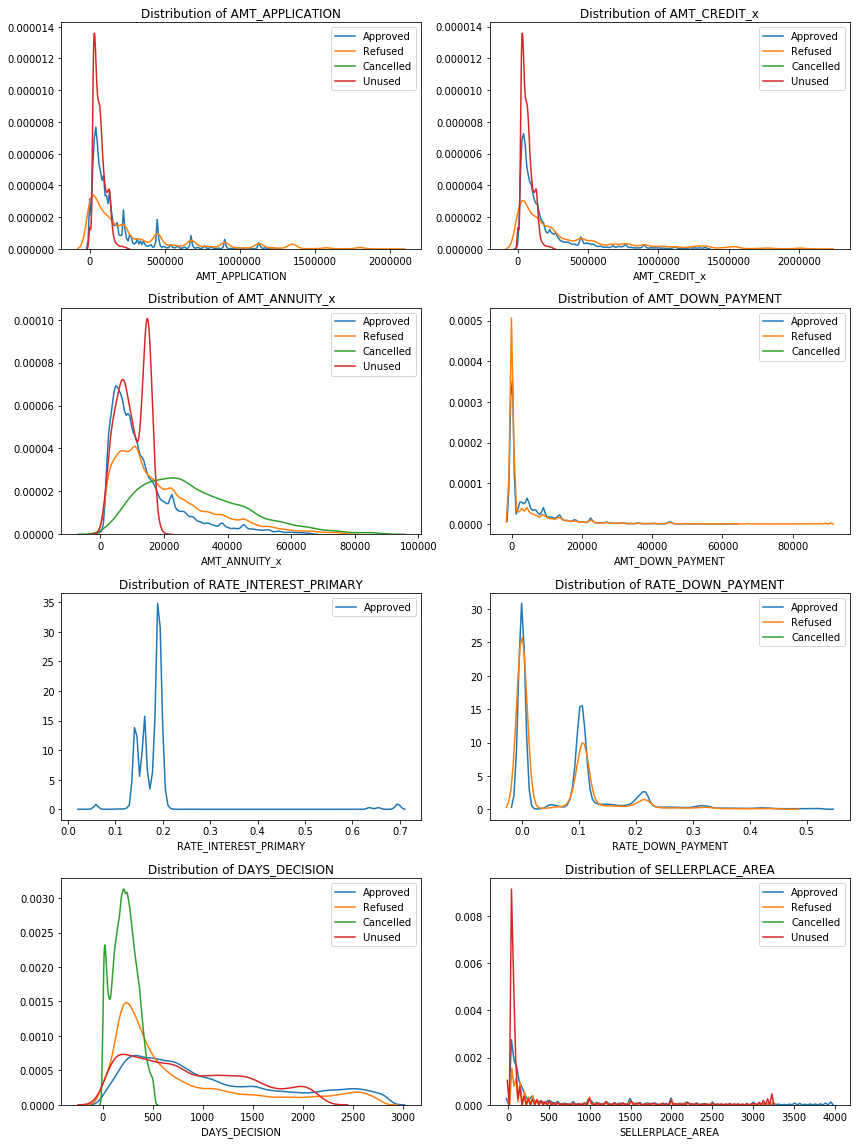

In [165]:
# Histograms
def series_percentile(ser):
    return ser[ser<np.nanpercentile(ser, 99)] 

fig,ax = plt.subplots(nrows=4, ncols=2, figsize=(12,16))
for i, col in enumerate(columns_to_plot):
    if not df_approved[col].empty : 
        sns.distplot(series_percentile(df_approved[col]) , ax = ax.flatten()[i],hist=False,label='Approved')
    if not df_refused[col].empty : 
        sns.distplot(series_percentile(df_refused[col]) , ax = ax.flatten()[i],hist=False,label='Refused')
    if not df_cancelled[col].empty : 
        sns.distplot(series_percentile(df_cancelled[col]) , ax = ax.flatten()[i],hist=False,label='Cancelled')
    if not df_unused[col].empty : 
        sns.distplot(series_percentile(df_unused[col]) , ax = ax.flatten()[i],hist=False,label='Unused ')
    ax.flatten()[i].set_title('Distribution of '+col,fontsize=12)
plt.tight_layout()
plt.show()                  

#### **Using Box Plots**

In [166]:
#columns_to_plot = ['AMT_APPLICATION','AMT_CREDIT_x', 'AMT_ANNUITY_x','RATE_DOWN_PAYMENT', 'DAYS_DECISION',]

In [167]:
# Box Plots 
def multi_boxplot_prev(col):
    fig,ax = plt.subplots(nrows=1, ncols=4, figsize=(14,6))

    sns.boxplot(y=series_percentile(df_approved[col]) , ax = ax[0],).set(xlabel='Approved')
    ax[0].set_title('Distribution of '+col+'\nfor Approved',fontsize=12)
  
    sns.boxplot(y=series_percentile(df_refused[col]) , ax = ax[1]).set(xlabel='Refused')
    ax[1].set_title('Distribution of '+col+'\nfor Refused',fontsize=12)
  
    sns.boxplot(y=series_percentile(df_cancelled[col]) , ax = ax[2]).set(xlabel='Cancelled')
    ax[2].set_title('Distribution of '+col+'\nfor Cancelled',fontsize=12)
  
    sns.boxplot(y=series_percentile(df_unused[col]) , ax = ax[3]).set(xlabel='Unused')
    ax[3].set_title('Distribution of '+col+'\nfor Unused',fontsize=12)

    plt.tight_layout()
    plt.show()   

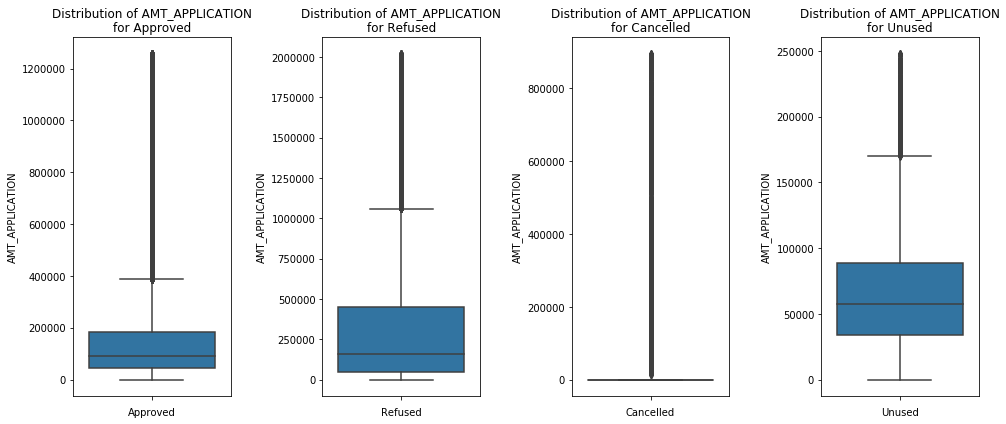

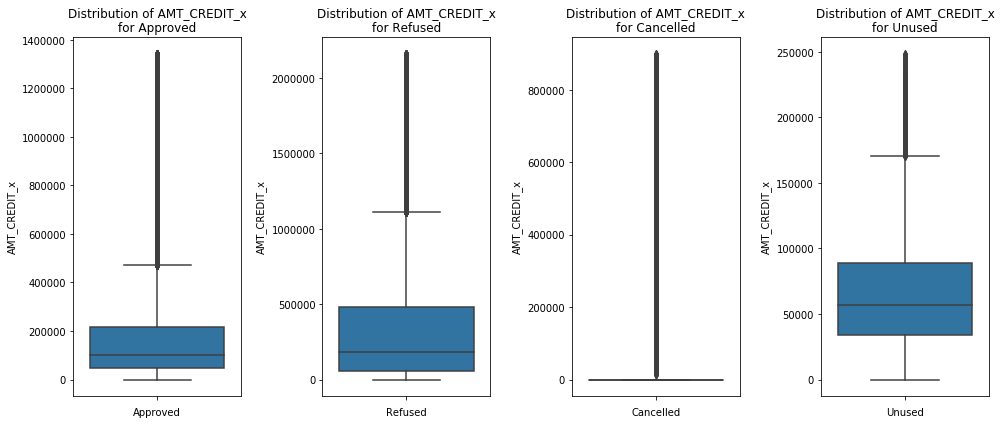

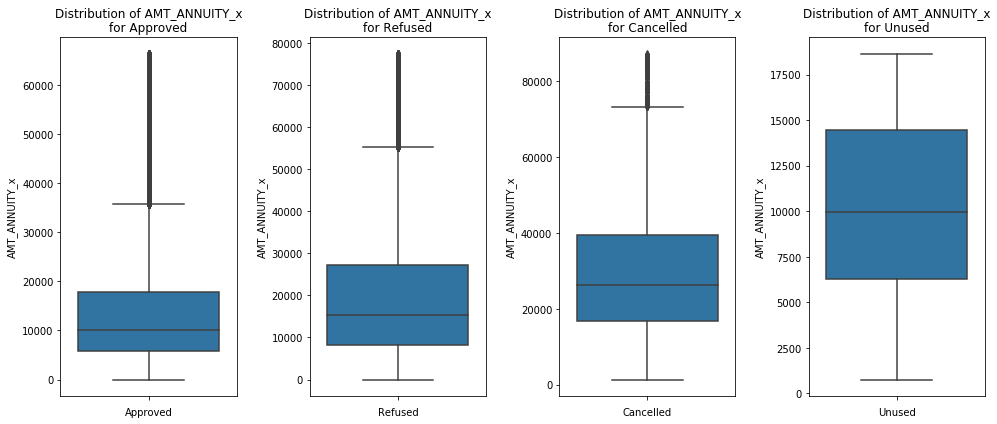

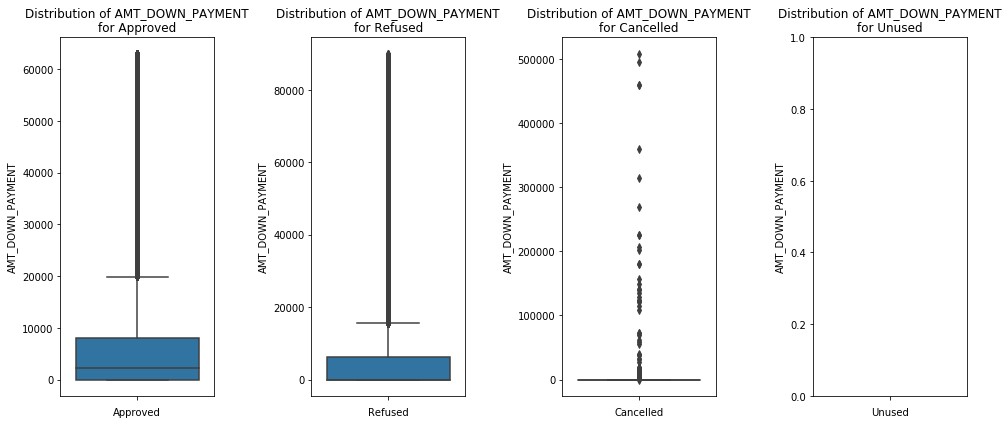

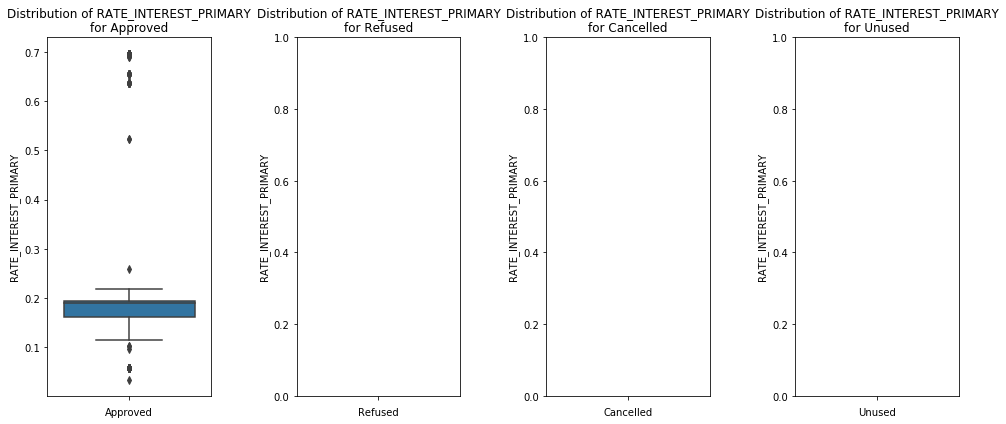

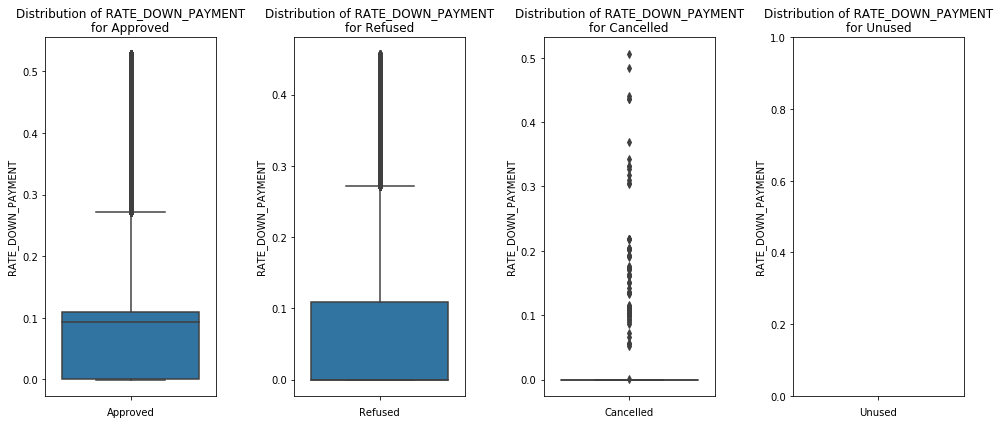

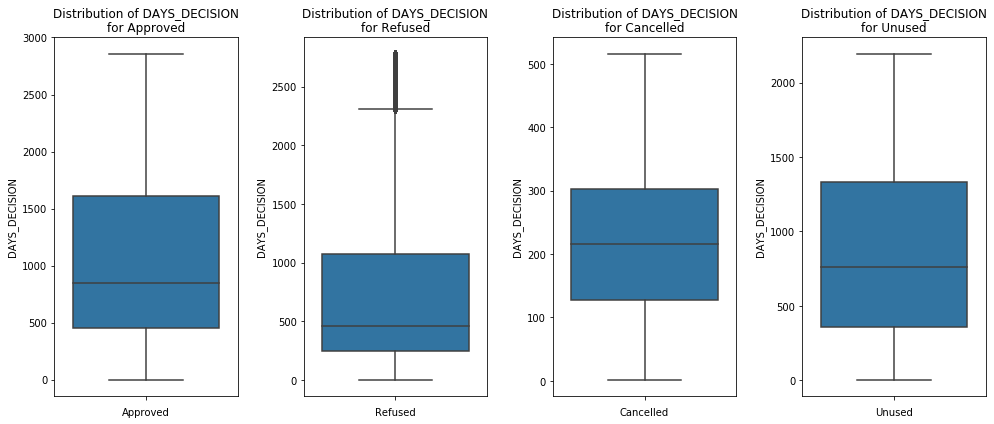

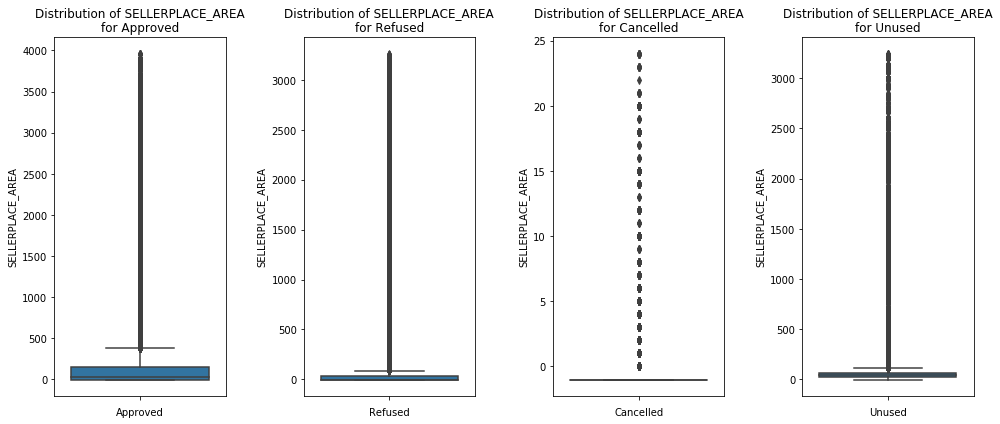

In [168]:
for col_name in columns_to_plot:
    multi_boxplot_prev(col_name)

**Inference**   
* For ***Application and Credit amount***, the loans are higher in the range of 0-200000 for Approved, Refused and Unused offers. However the canceled cases are far too low in both cases. The number of loans that is Unused is higher compared to approved, which is higher compared to Refused applications in both cases.  
  *  _AMT_APPLICATION_  
The amount application is distributed within a range(IQR) of ~15000-200000 with median around 65000. There are outliers at the higher end even at a 99th percentile of data. Median is skewed towards the lower applied amount.
  * _AMT_CREDIT_  
The amount credit is distributed within a range(IQR) of ~25000-200000 with median around 75000. There are outliers at the higher end even at a 99th percentile of data. Median is skewed towards the lower credit amount.


* For ***Annuity***, canceled applications are relatively higher for the range of 20000, both refused and approved applications shows a peak within a range of 0-20K, where approved loans are higher. The unused offer shows dual peaks within the same range.
  * _AMT_ANNUITY_  
The annuity amount is distributed within a range(IQR) of 6000-20000 with median around 10000. There are outliers at the higher end even at a 99th percentile of data. Median is skewed towards the lower annuity amount.

* For ***Down payment***, the amount is higher at 0, meaning the down payment is less for most of the loans which are Refused and approved, it is noticeable that even with 0 down payment there are much higher number of loans which is refused. For canceled and unused loans, the number is far too low.
  * _AMT_DOWN_PAYMENT_  
The down payment amount is distributed within a range(IQR) of 0-7500 with median and lower value at 1500 ie most of the client have received an offer of low down payment. However, there are outliers at the higher end beyond 16000 even at a 99th percentile of data. Median and lower value is completed skewed towards the lower amount.

* ***Interest rate*** is obviously available only for the approved loans and the most of the loans' interest lies in 10%-20%.
  * _RATE_INTEREST_PRIMARY_   
The interest rate is spread within a range(IQR) of 16%-19% with median around 19%. There are outliers at the higher and lower ends at a 99th percentile of data. Median is skewed completely towards the higher interest rate.

* ***Downpayment Rate***, shows an equal trend for approved and refused offers, however its interesting to see that there are approved offers with a 0% down payment rate with high peak. There are many more canceled loans for a 10% down payment rate comparatively.
  * _RATE_DOWN_PAYMENT_  
The down payment rate is spread within a range(IQR) of 0%-11% with median around 5%. There are outliers at the higher down payment rate at 99th percentile of data. Median is approximately at center of the data with an equal spread with outliers on higher rate.

* ***Days decision***, is within the range of 0-500 days where the canceled loans stand much higher compared to other types of loans. Unused loans and approved loans shows equal trend for the decision days.
  * _DAYS_DECISION_  
The decision days is distributed within a range(IQR) of 250-1250 days with median around 550 days. There are few outliers at the higher end at 99th percentile of data. Median is slightly skewed towards lower days.

* ***Seller place area***, shows far too higher peak in 0-250 range for canceled offers, all the other loan types show a normal trend within the same area interval.
  * _SELLERPLACE_AREA_  
The seller place area is spread within a range(IQR) of 0-100 with median around 0. There are outliers at the higher down payment rate at 99th percentile of data. Median is completely left skewed at 0

### 2. Categorical Variable

In [169]:
df_merged.select_dtypes('category').columns

Index(['NAME_CONTRACT_TYPE_x', 'WEEKDAY_APPR_PROCESS_START_x',
       'HOUR_APPR_PROCESS_START_x', 'FLAG_LAST_APPL_PER_CONTRACT',
       'NFLAG_LAST_APPL_IN_DAY', 'NAME_CASH_LOAN_PURPOSE',
       'NAME_CONTRACT_STATUS', 'NAME_PAYMENT_TYPE', 'CODE_REJECT_REASON',
       'NAME_TYPE_SUITE_x', 'NAME_CLIENT_TYPE', 'NAME_GOODS_CATEGORY',
       'NAME_PORTFOLIO', 'NAME_PRODUCT_TYPE', 'CHANNEL_TYPE',
       'NAME_SELLER_INDUSTRY', 'NAME_YIELD_GROUP', 'PRODUCT_COMBINATION',
       'NFLAG_INSURED_ON_APPROVAL', 'TARGET', 'NAME_CONTRACT_TYPE_y',
       'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN',
       'NAME_TYPE_SUITE_y', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE',
       'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'FLAG_MOBIL',
       'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE', 'FLAG_PHONE',
       'FLAG_EMAIL', 'OCCUPATION_TYPE', 'CNT_FAM_MEMBERS',
       'REGION_RATING_CLIENT', 'REGION_RATING_CLIENT_W_CITY',
       'WEEKDAY_APPR_PROCESS_START_y', 'HOUR_APPR_PRO

**Function to Plot - Countplot as subplots**

In [170]:
def count_plot_prev(col,_rotate=0):
    fig,ax = plt.subplots(nrows=1, ncols=4, figsize=(16,5+_rotate))

    sns.countplot(df_approved[col], order= df_approved[col].value_counts().index,ax = ax[0])
    ax[0].set_title('Frequency of '+col+'\nfor Approved',fontsize=12)

    sns.countplot(df_cancelled[col], order= df_cancelled[col].value_counts().index,ax = ax[2])
    ax[2].set_title('Frequency of '+col+'\nfor Cancelled',fontsize=12)

    sns.countplot(df_refused[col], order= df_refused[col].value_counts().index,ax = ax[1])
    ax[1].set_title('Frequency of '+col+'\nfor Refused',fontsize=12)

    sns.countplot(df_unused[col], order= df_unused[col].value_counts().index,ax = ax[3])
    ax[3].set_title('Frequency of '+col+'\nfor Unused',fontsize=12)

    if _rotate:
        for i in range(4):
            ax[i].set_xticklabels(ax[i].get_xticklabels(),rotation=90)
    
    plt.tight_layout()
    plt.show()   

In [171]:
# Category Columns dealt with are :
# ['NAME_CONTRACT_TYPE_x','NAME_PAYMENT_TYPE','NAME_CLIENT_TYPE','NAME_PORTFOLIO','NAME_PRODUCT_TYPE','CHANNEL_TYPE','NAME_YIELD_GROUP']


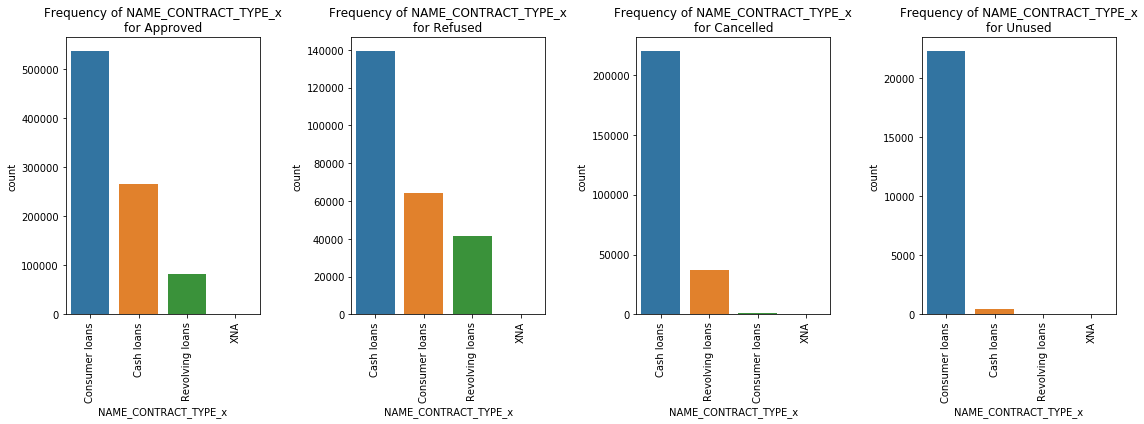

In [172]:
count_plot_prev('NAME_CONTRACT_TYPE_x',1) 
#count_plot_prev('NAME_CONTRACT_TYPE_y',1) 

**Inference**  
- Consumer loans are higher in number for Approved and Unused loans.
- Cash loans are more for canceled and refused loan status types.
- Consumer loans are very less in number for canceled loans compared to other 3 categories.

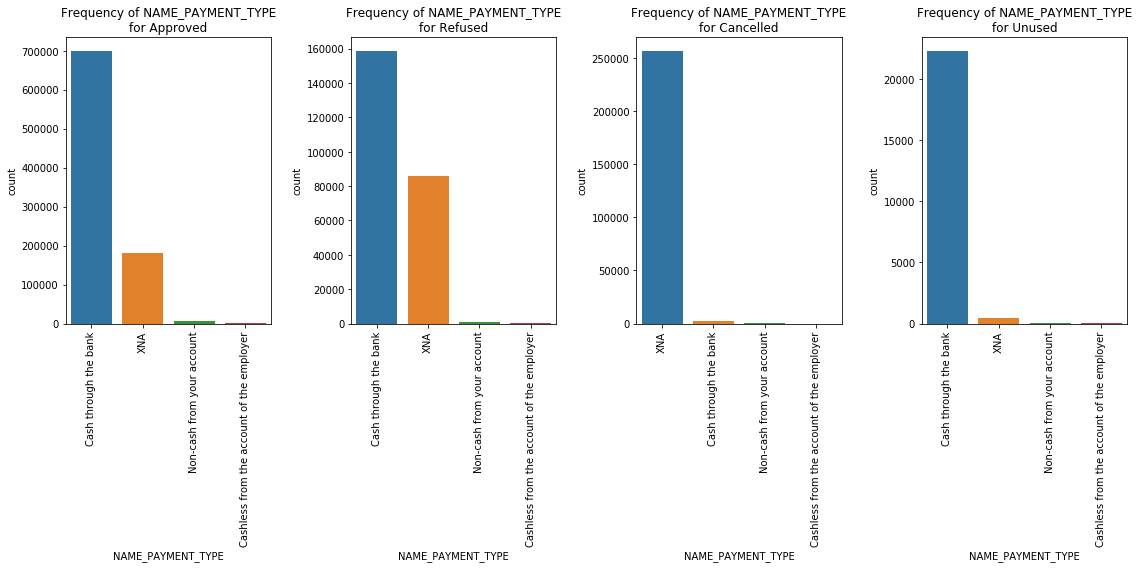

In [173]:
count_plot_prev('NAME_PAYMENT_TYPE',3)#

**Inference**  
- Cash through the bank loans are higher in number for all the status types of loans except for canceled ones
- For canceled loan type, Unknown (XNAs) contribute the most. 
- Cashless mode is the least in all types of loan types

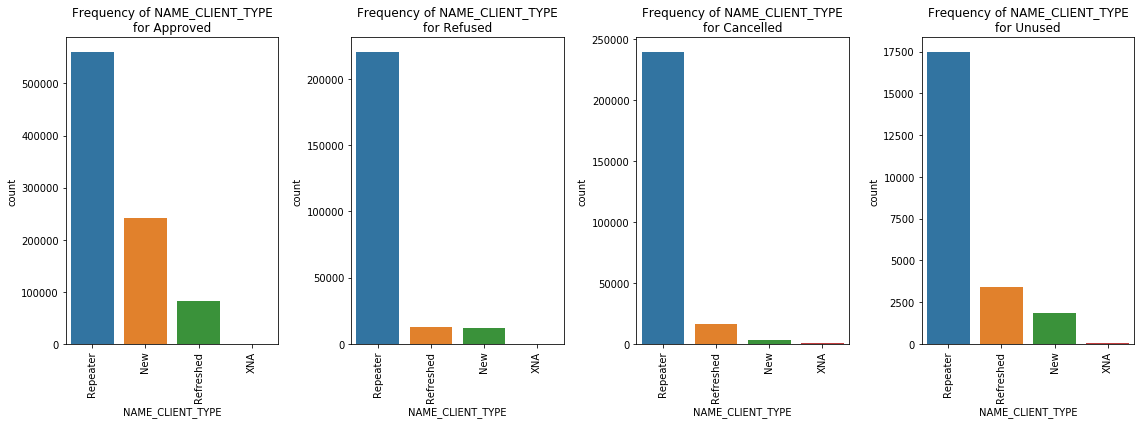

In [174]:
count_plot_prev('NAME_CLIENT_TYPE',1) #

**Inference**  
- In all the loan status types, the highest number of loans are taken by client who is a repeater, ie the clients do reapply for loans most of the time. 
- New clients have a higher chance of loans approved as per the previous data. 
- Refreshed loans are higher compared to new loans in case of canceled loans and unused loans. 
- For refused loans refreshed loans and new loans are approximately equal in number

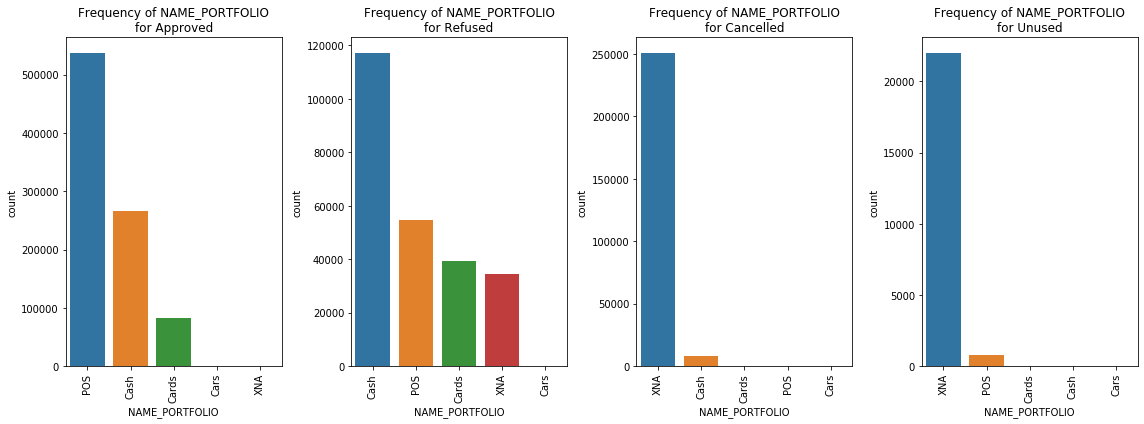

In [175]:
count_plot_prev('NAME_PORTFOLIO',1) #

**Inference**  
- Number of loans approved are higher in case of POS.   
- More number of refused loans are Cash portfolio type.   
- All the types show very low or nil quantity for 'cars' portfolio
- For Canceled and Unused, Unknown (XNA) portfolios have highest count.

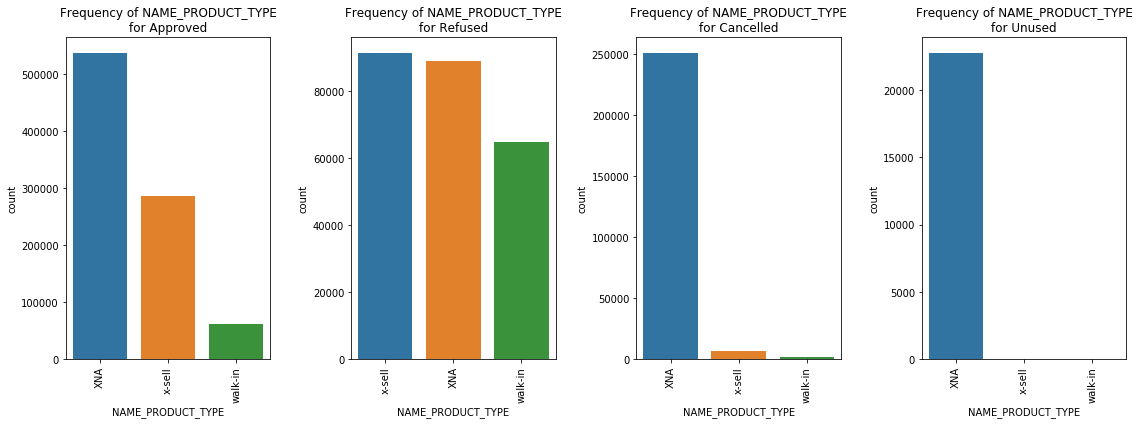

In [176]:
count_plot_prev('NAME_PRODUCT_TYPE',1) #

**Inference**

- XNA - Unknown product type has more number of Approved loans.
- x-sell product type is much higher compared to walk-ins for approved loans. 
- For canceled loans x-sell and walk-ins are higher with much less difference in count.
- Walk-in loans are with high probable chance of getting refused.
- For unused loans and canceled loans  XNA(Unknown) has the highest count and very low count for x-sell and walk-in


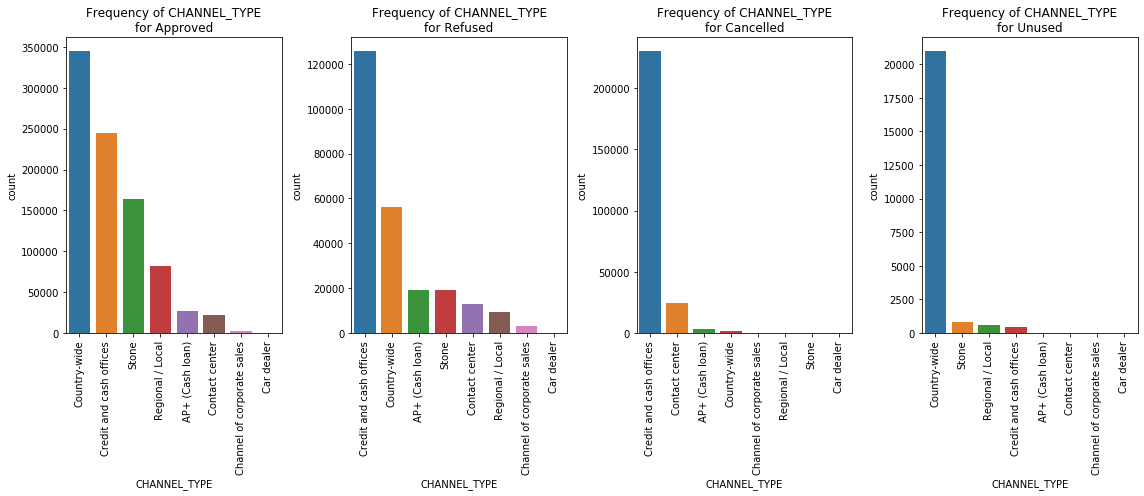

In [177]:
count_plot_prev('CHANNEL_TYPE',2) #

**Inference**

- Most number of loans are from Country-wide channel for Approved and unused loan types.  
- Most number of canceled and refused loans are in the credit and cash offices


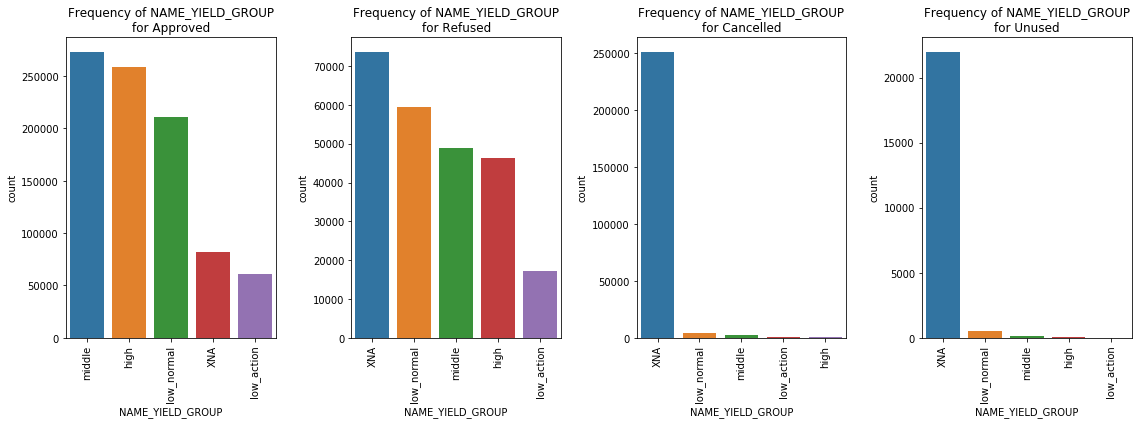

In [178]:
count_plot_prev('NAME_YIELD_GROUP',1) #

**Inference**

- Middle Yield group has higher number of approved loan type  
- Most refused loans are from Missing or Null (XNA) yield group and then the second most from low_normal Yield group.  
- All the Yield groups except Null(XNA) is very low for canceled and unused type.  
- Most loans are from Missing or Null (XNA) type for Canceled, Refused and Unused types.

## Bivariate Analysis
___

### 1. Continuous - Continuous Bivariate Analysis

In [179]:
df_merged.select_dtypes(['int','float','int64','float64']).columns

Index(['SK_ID_PREV', 'SK_ID_CURR', 'AMT_ANNUITY_x', 'AMT_APPLICATION',
       'AMT_CREDIT_x', 'AMT_DOWN_PAYMENT', 'AMT_GOODS_PRICE_x',
       'RATE_DOWN_PAYMENT', 'RATE_INTEREST_PRIMARY',
       'RATE_INTEREST_PRIVILEGED', 'DAYS_DECISION', 'SELLERPLACE_AREA',
       'CNT_PAYMENT', 'DAYS_FIRST_DRAWING', 'DAYS_FIRST_DUE',
       'DAYS_LAST_DUE_1ST_VERSION', 'DAYS_LAST_DUE', 'DAYS_TERMINATION',
       'AMT_INCOME_TOTAL', 'AMT_CREDIT_y', 'AMT_ANNUITY_y',
       'AMT_GOODS_PRICE_y', 'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH',
       'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'EXT_SOURCE_2',
       'EXT_SOURCE_3', 'YEARS_BEGINEXPLUATATION_AVG', 'FLOORSMAX_AVG',
       'YEARS_BEGINEXPLUATATION_MODE', 'FLOORSMAX_MODE',
       'YEARS_BEGINEXPLUATATION_MEDI', 'FLOORSMAX_MEDI', 'TOTALAREA_MODE',
       'DAYS_LAST_PHONE_CHANGE'],
      dtype='object')

In [180]:
def multi_scatterplot_prev(var_x,var_y):
    fig,ax = plt.subplots(nrows=2, ncols=2, figsize=(12,10))

    sns.scatterplot(x=var_x,y=var_y,data=df_approved, ax = ax[0,0])
    ax[0,0].set_title(var_x+' against  '+var_y+'\nfor Approved',fontsize=12)

    sns.scatterplot(x=var_x,y=var_y,data=df_refused, ax = ax[0,1])
    ax[0,1].set_title(var_x+' against  '+var_y+'\nfor Refused',fontsize=12)

    sns.scatterplot(x=var_x,y=var_y,data=df_cancelled, ax = ax[1,0])
    ax[1,0].set_title(var_x+' against  '+var_y+'\nfor Cancelled',fontsize=12)
                  
    sns.scatterplot(x=var_x,y=var_y,data=df_unused, ax = ax[1,1])
    ax[1,1].set_title(var_x+' against  '+var_y+'\nfor Unused',fontsize=12)

    plt.tight_layout()
    plt.show()   

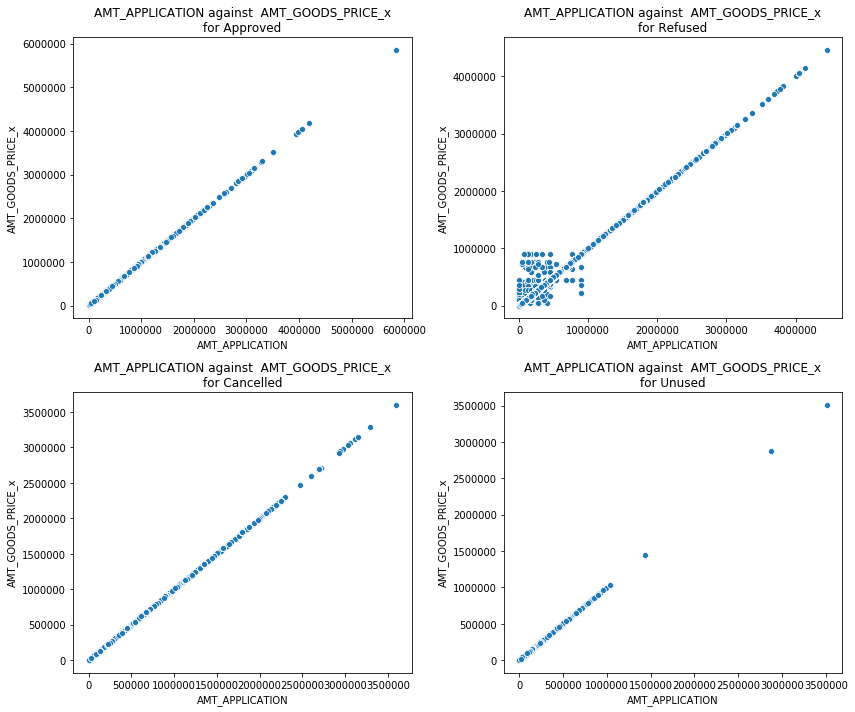

In [181]:
_x,_y= 'AMT_APPLICATION' ,'AMT_GOODS_PRICE_x'
multi_scatterplot_prev(_x,_y)

#### **Inference**  
AMT_APPLICATION and AMT_GOODS_PRICE shows a very high positive linear correlation for all the loan types.   
For refused loan types, there is a spread for the lower values of the AMT_APPLICATION and AMT_GOODS_PRICE.

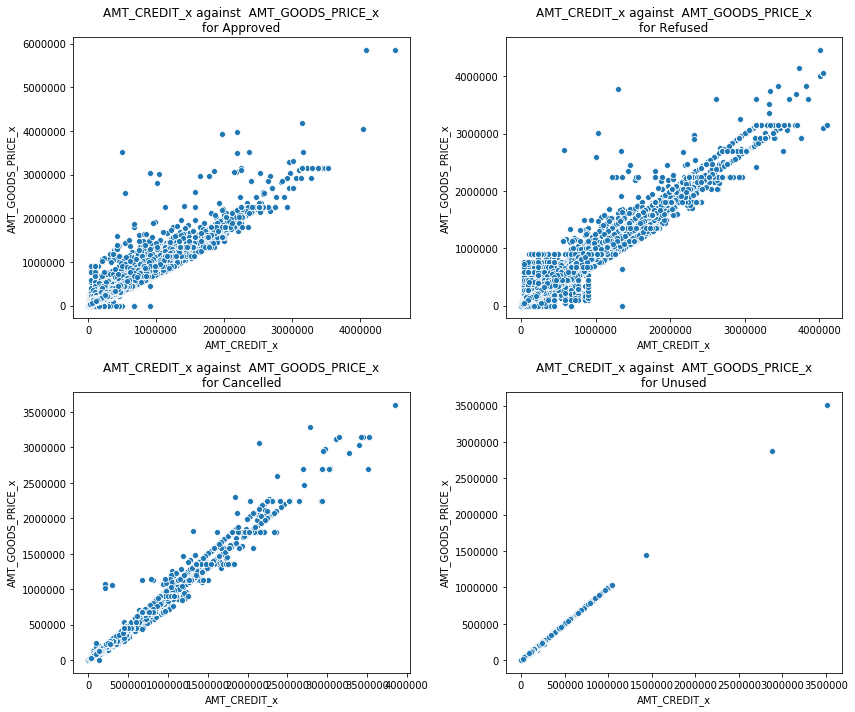

In [182]:
_x,_y= 'AMT_CREDIT_x' ,'AMT_GOODS_PRICE_x'
multi_scatterplot_prev(_x,_y)

#### **Inference**  
AMT_CREDIT and AMT_GOODS_PRICE shows a very high positive linear correlation for all the loan types.  
The amount for CREDIT and GOODS PRICE is higher for refused types compared to the approved loan types.

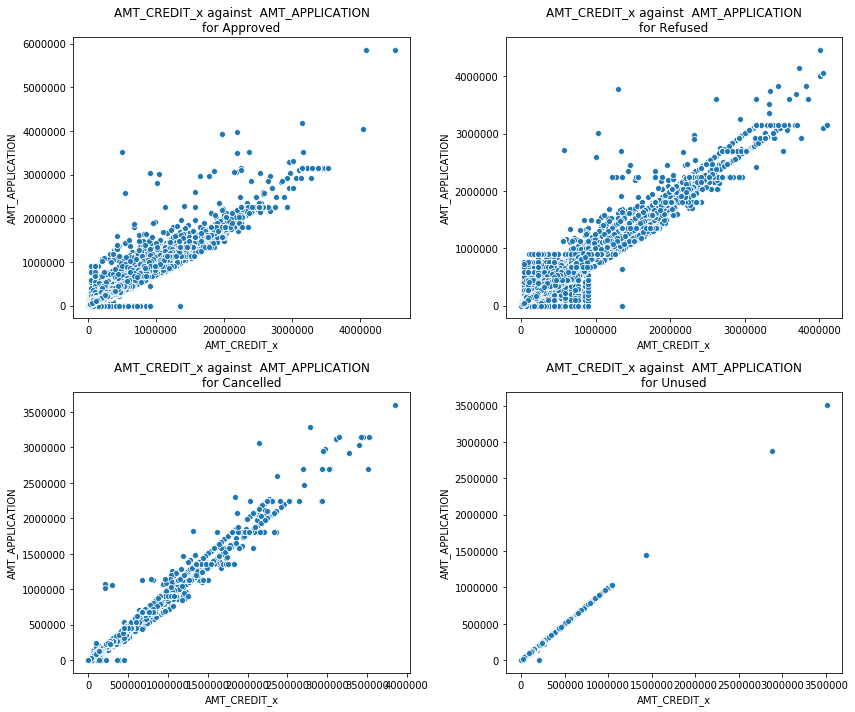

In [183]:
_x,_y= 'AMT_CREDIT_x' ,'AMT_APPLICATION' 
multi_scatterplot_prev(_x,_y)

#### **Inference**  
AMT_CREDIT and AMT_APPLICATION also shows a very high positive linear correlation for all the loan status types.  
The amount for CREDIT and APPLICATION is higher for refused types compared to the approved loan types. 

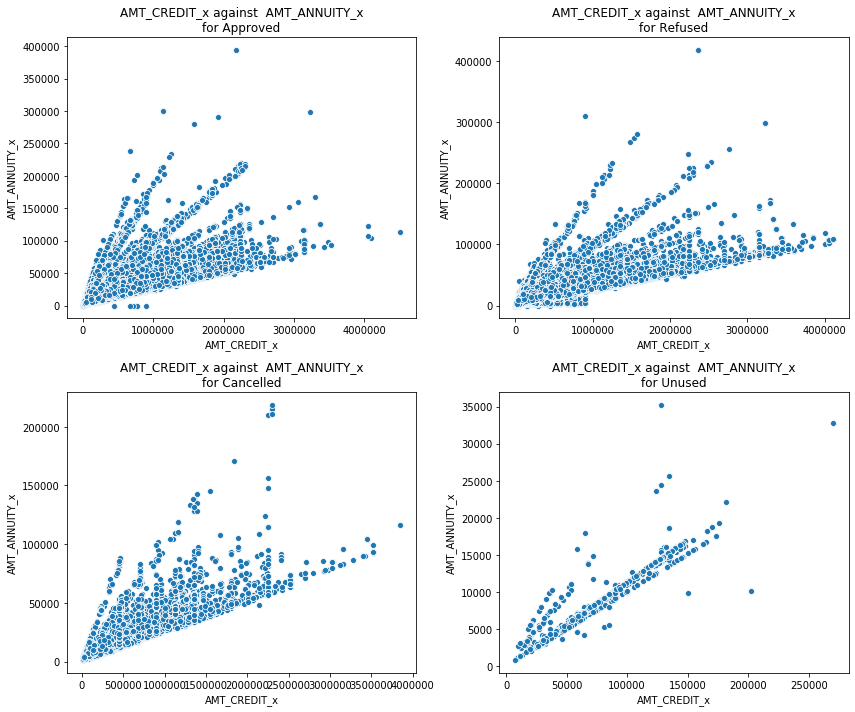

In [184]:
_x,_y= 'AMT_CREDIT_x','AMT_ANNUITY_x'
multi_scatterplot_prev(_x,_y)

#### **Inference**  
AMT_CREDIT and AMT_ANNUITY also shows a very high positive linear correlation for all the loan status types.   
The amount for CREDIT and ANNUITY is higher for refused types compared to the approved loan types. 

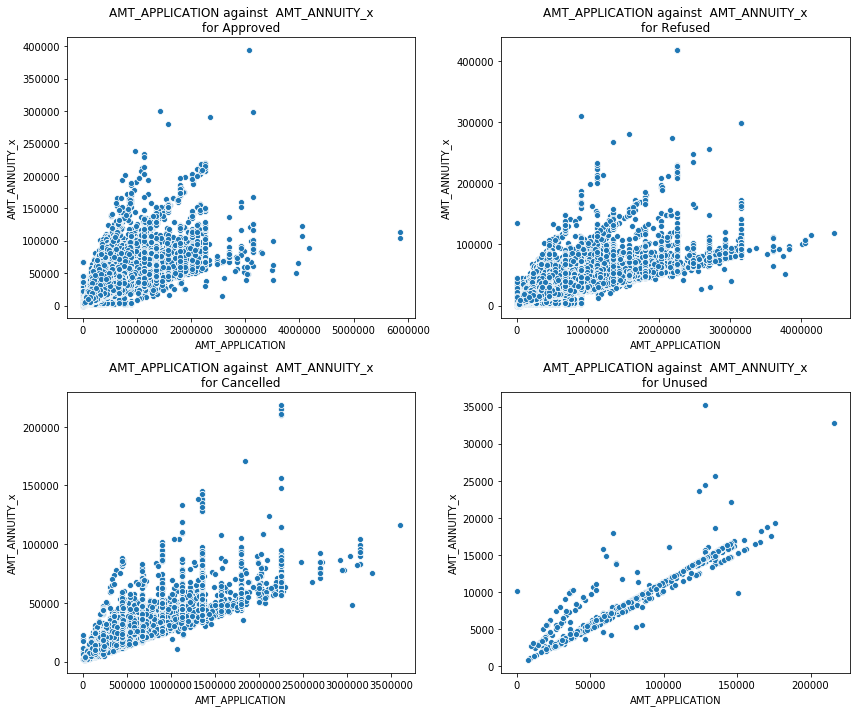

In [185]:
_x,_y= 'AMT_APPLICATION','AMT_ANNUITY_x'
multi_scatterplot_prev(_x,_y)

#### **Inference**  
AMT_APPLICATION and AMT_ANNUITY also shows a very high positive linear correlation for all the loan types.   

### 2. Categorical - Categorical Bivariate Analysis

In [186]:
df_merged.select_dtypes('category').columns

Index(['NAME_CONTRACT_TYPE_x', 'WEEKDAY_APPR_PROCESS_START_x',
       'HOUR_APPR_PROCESS_START_x', 'FLAG_LAST_APPL_PER_CONTRACT',
       'NFLAG_LAST_APPL_IN_DAY', 'NAME_CASH_LOAN_PURPOSE',
       'NAME_CONTRACT_STATUS', 'NAME_PAYMENT_TYPE', 'CODE_REJECT_REASON',
       'NAME_TYPE_SUITE_x', 'NAME_CLIENT_TYPE', 'NAME_GOODS_CATEGORY',
       'NAME_PORTFOLIO', 'NAME_PRODUCT_TYPE', 'CHANNEL_TYPE',
       'NAME_SELLER_INDUSTRY', 'NAME_YIELD_GROUP', 'PRODUCT_COMBINATION',
       'NFLAG_INSURED_ON_APPROVAL', 'TARGET', 'NAME_CONTRACT_TYPE_y',
       'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN',
       'NAME_TYPE_SUITE_y', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE',
       'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'FLAG_MOBIL',
       'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE', 'FLAG_PHONE',
       'FLAG_EMAIL', 'OCCUPATION_TYPE', 'CNT_FAM_MEMBERS',
       'REGION_RATING_CLIENT', 'REGION_RATING_CLIENT_W_CITY',
       'WEEKDAY_APPR_PROCESS_START_y', 'HOUR_APPR_PRO

In [187]:
def multi_countplot_prev(var_x,var_y,_rotate=False):
    fig,ax = plt.subplots(nrows=2, ncols=2, figsize=(14,10+_rotate))

    sns.countplot(x=var_x,hue=var_y,data=df_approved, ax = ax[0,0])
    ax[0,0].set_title(var_x+' against  '+var_y+'\nfor Approved',fontsize=12)

    sns.countplot(x=var_x,hue=var_y,data=df_refused, ax = ax[0,1])
    ax[0,1].set_title(var_x+' against  '+var_y+'\nfor Refused',fontsize=12)

    sns.countplot(x=var_x,hue=var_y,data=df_cancelled, ax = ax[1,0])
    ax[1,0].set_title(var_x+' against  '+var_y+'\nfor Cancelled',fontsize=12)

    sns.countplot(x=var_x,hue=var_y,data=df_unused, ax = ax[1,1])
    ax[1,1].set_title(var_x+' against  '+var_y+'\nfor Unused',fontsize=12)

    if _rotate:
        for i in range(2):
            for j in range(2):
                ax[i,j].set_xticklabels(ax[i,j].get_xticklabels(),rotation=90)

    plt.tight_layout()
    plt.show()   

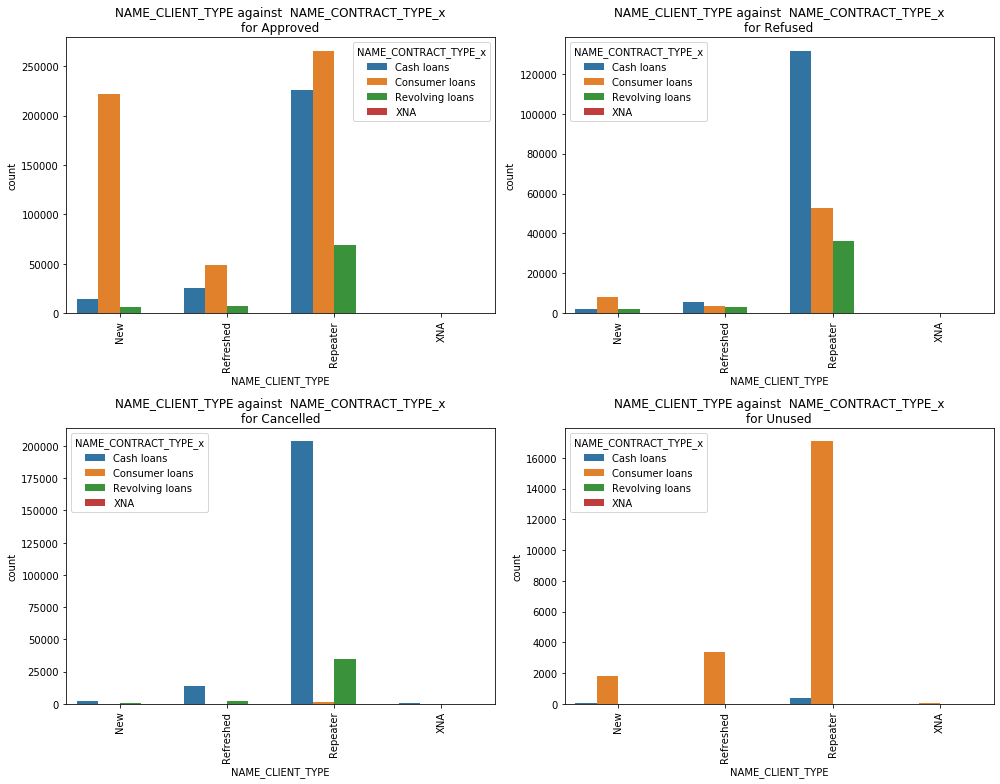

In [188]:
multi_countplot_prev('NAME_CLIENT_TYPE','NAME_CONTRACT_TYPE_x',1)

#### **Inference**    
- For **Approved** loan type, New loans are much higher for consumer loans. For refreshed and repeated also consumer loans has higher numbers compared to cash and revolving loans.  
- For **Refused** loan type, Cash loans are much higher for repeaters compared to other contract types  
- For **Canceled** loan type, the cash loans are way higher for repeaters.  
- For **Unused** loan type, the consumer loans are way higher for repeaters.

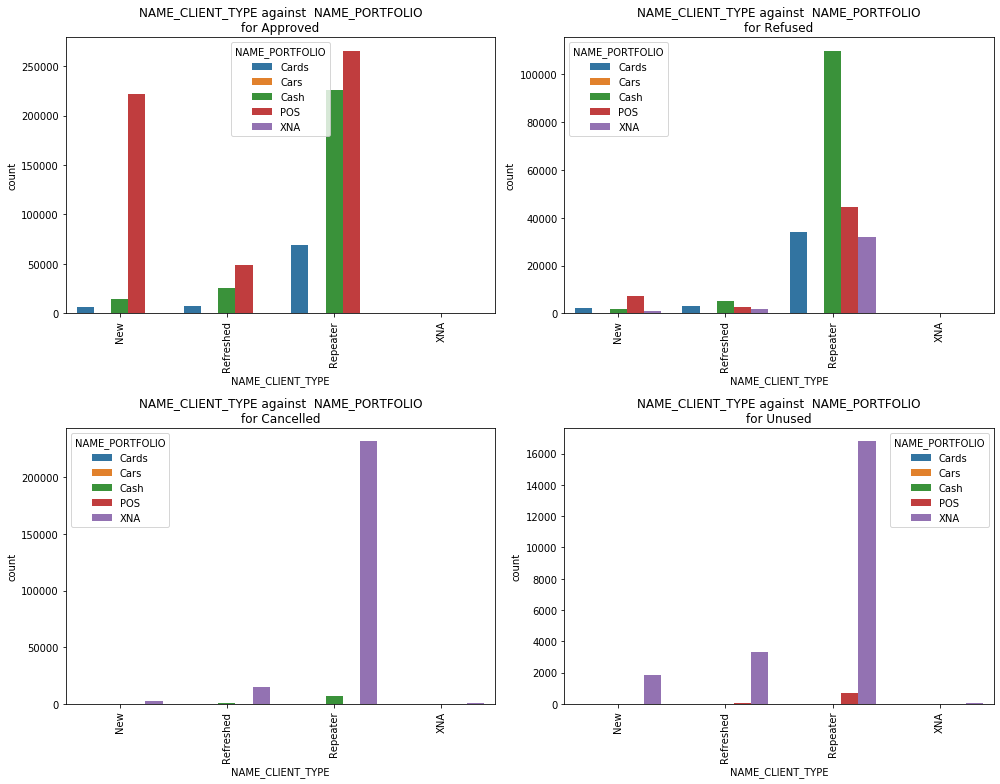

In [189]:
multi_countplot_prev('NAME_CLIENT_TYPE', 'NAME_PORTFOLIO',1)

#### **Inference**    
- For **Approved** loan type, New loans are much higher for POS portfolio. For refreshed and repeated also POS portfolio has higher numbers compared to cash and cards portfolio.  
- For **Refused** loan type, Cash portfolio are much higher for repeaters compared to other portfolios  
- For **Canceled** loan type, Null/Missing XNA portfolio are way higher for repeaters.  
- For **Unused** loan type, Null/Missing XNA portfolio are way higher for repeaters.  

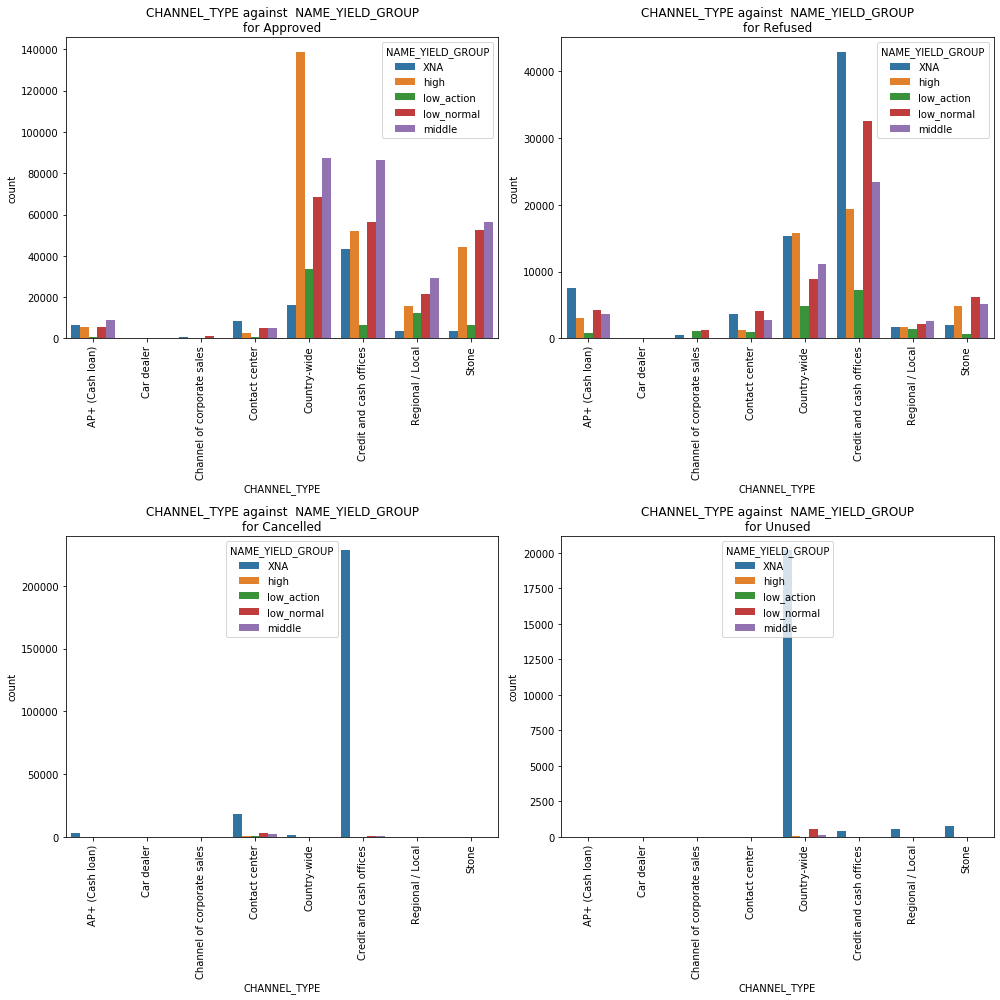

In [190]:
multi_countplot_prev('CHANNEL_TYPE','NAME_YIELD_GROUP',4)

#### **Inference**    
- For **Approved** loan type, Country-wide channel type has higher number of loans for high yield group.   
- For **Refused** loan type, credit and cash offices channel type has higher number of loans for Unknown XNA yield group.   
- For **Canceled** loan type, credit and cash offices channel type has higher number of loans for Unknown XNA yield group.   
- For **Unused** loan type, Country-wide channel type has higher number of loans for Unknown XNA yield group.

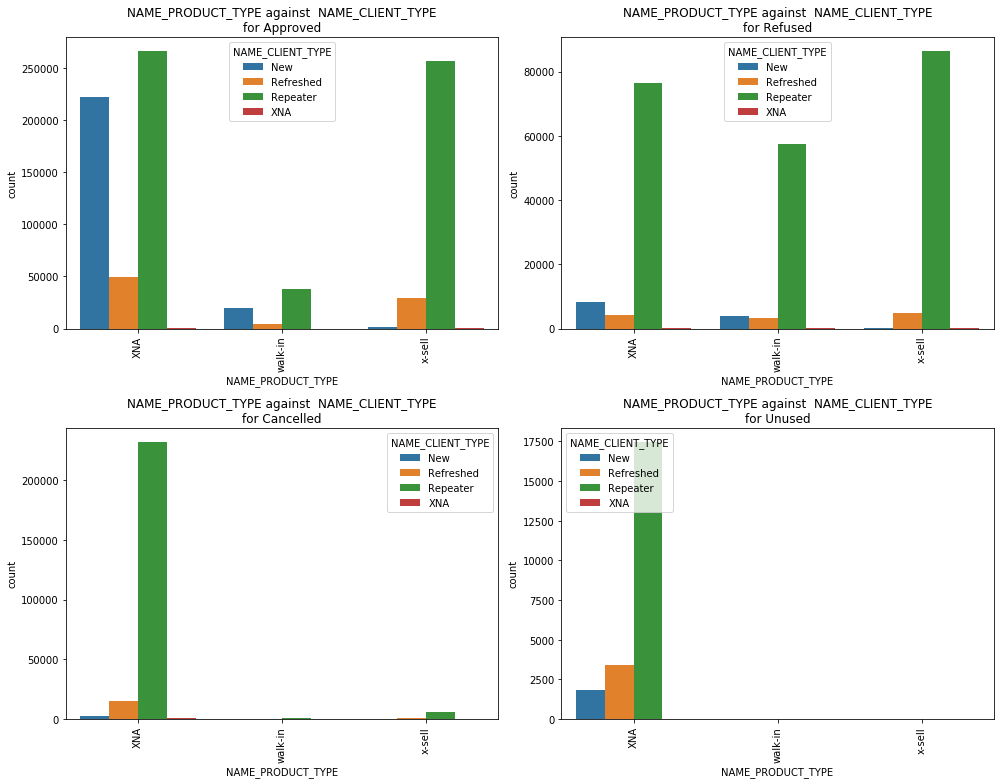

In [191]:
multi_countplot_prev('NAME_PRODUCT_TYPE', 'NAME_CLIENT_TYPE',1)

#### **Inference**    
- For **Approved** loan type, Repeater client type has higher number of loans for XNA(Null/Unknown) and x-sell Product types.   
- For **Refused** loan type, Repeater client type has higher number of loans for  x-sell Product types, also Repeater client type has higher loans for other  product types as well.   
- Walk-in - repeaters have a high tendency of loans getting **refused** and New - Unknowns have a higher chance of **approved** loans.
- For **Canceled** loan type, Repeater client type has higher number of loans for XNA(Null/Unknown) Product types.   
- For **Unused** loan type, Repeater client type has higher number of loans for XNA(Null/Unknown) Product types.

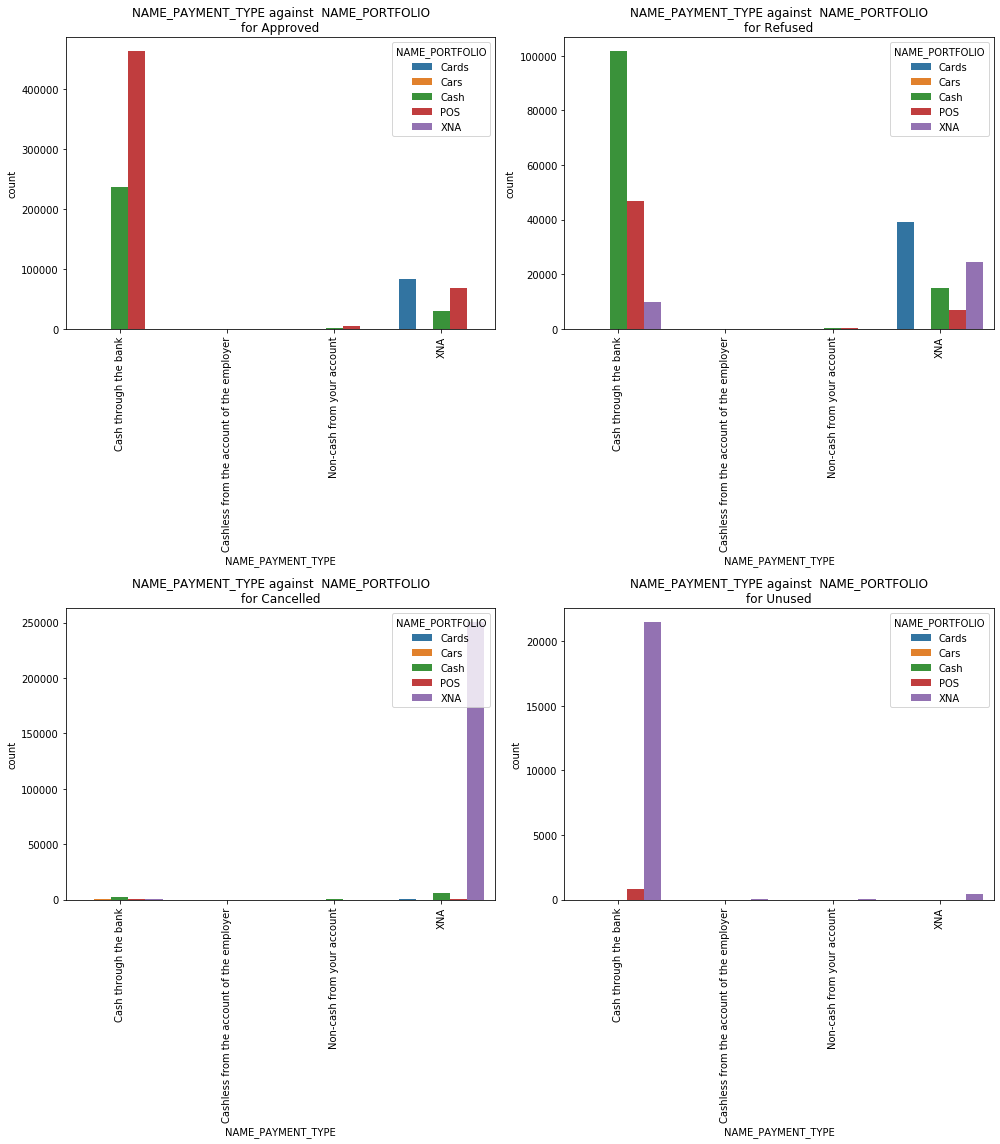

In [192]:
multi_countplot_prev('NAME_PAYMENT_TYPE', 'NAME_PORTFOLIO',6)

#### **Inference**    
- For **Approved** loan type, Cash through the bank has higher number of loans for POS portfolio.   
- For **Refused** loan type, Cash through the bank has higher number of loans for Cash portfolio.   
- For **Canceled** loan type, XNA(Null) has higher number of loans for XNA(Null) portfolio.   
- For **Unused** loan type, Cash through the bank has higher number of loans for XNA(Null) portfolio.

### 3. Continuous - Categorical Bivariate Analysis

In [193]:
def bivariate_boxplot_prev(var_x,var_y,_rotate=False,perc=100):
    fig,ax = plt.subplots(nrows=2, ncols=2, figsize=(14,12+_rotate))

    sns.boxplot(x=var_x,y=var_y, ax = ax[0,0],
              data=df_approved[(df_approved[var_y]<=np.nanpercentile(df_approved[var_y], perc))])
    ax[0,0].set_title(var_x+' against  '+var_y+'\nfor Approved loan type',fontsize=12)

    sns.boxplot(x=var_x,y=var_y, ax = ax[0,1],
              data=df_refused[(df_refused[var_y]<=np.nanpercentile(df_refused[var_y], perc))] )
    ax[0,1].set_title(var_x+' against  '+var_y+'\nfor Refused loan type',fontsize=12)

    sns.boxplot(x=var_x,y=var_y, ax = ax[1,0],
              data=df_cancelled[(df_cancelled[var_y]<=np.nanpercentile(df_cancelled[var_y], perc))])
    ax[1,0].set_title(var_x+' against  '+var_y+'\nfor Cancelled loan type',fontsize=12)

    sns.boxplot(x=var_x,y=var_y, ax = ax[1,1],
              data=df_unused[(df_unused[var_y]<=np.nanpercentile(df_unused[var_y], perc))] )
    ax[1,1].set_title(var_x+' against  '+var_y+'\nfor Unused loan type',fontsize=12)
  
    if _rotate:
        for i in range(2): 
            for j in range(2):
                ax[i,j].set_xticklabels(ax[i,j].get_xticklabels(),rotation=90)

    plt.tight_layout()
    plt.show()   

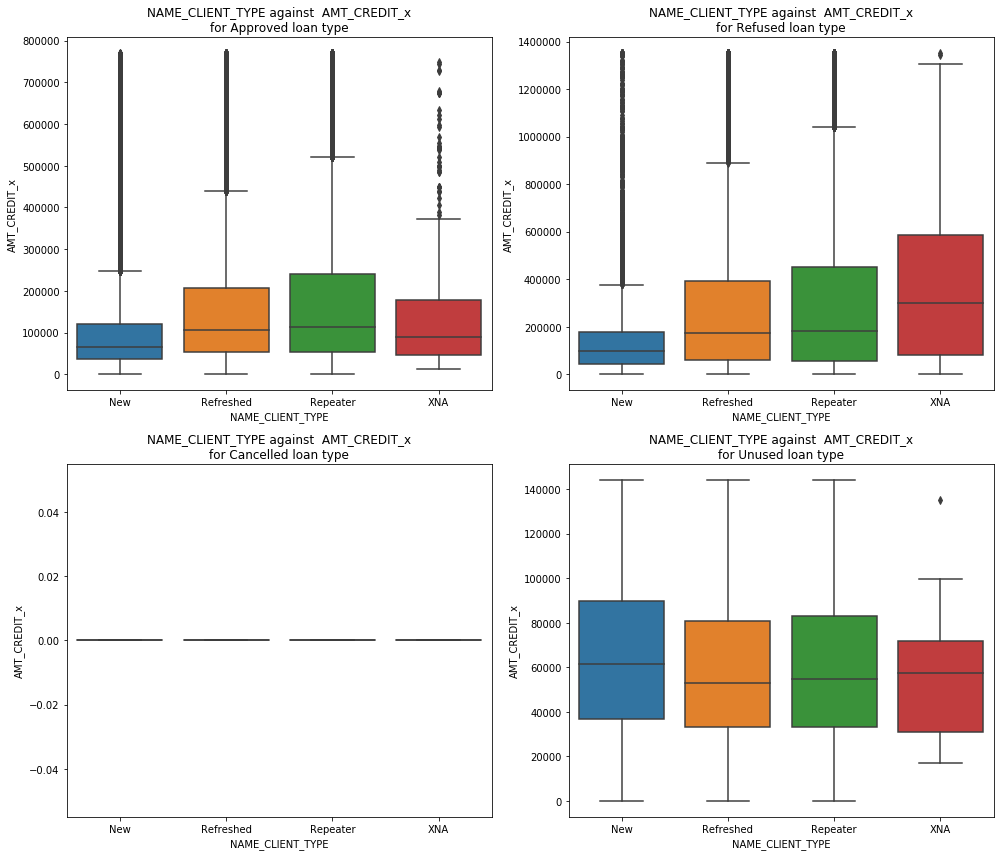

In [194]:
# Considering 95th percentile for the Credit Amount to avoid outliers and to get better insights
# Note: Missing value and outlier imputation is not done previously

bivariate_boxplot_prev('NAME_CLIENT_TYPE', 'AMT_CREDIT_x',0,95)


#### **Inference** 
- For ***Approved*** loan type,Repeater client types has a higher spread over the credit amount. All the client types show outliers for 95th percentile of credit amount data at the higher side. The median for all the client types lie within a range of 500k to 1200k. Median credit amount for the New clients are lower.  

- For ***Refused*** loan type,XNA (Null / Missing / NA) client types has a higher spread over the credit amount. All the client types show outliers for 95th percentile of credit amount data at the higher side. The median for XNA is way higher at around(200k) and the lowest median is for New clients at around (100k).  

- For ***Canceled*** loan type,do not show any data, all the values are at 0, for  client types for the credit amount.  

- For ***Unused*** loan type, New client types has a higher spread over the credit amount. The Median for all the client types lie within a range of 50k to 62k. Median of refresher is slightly lower.  


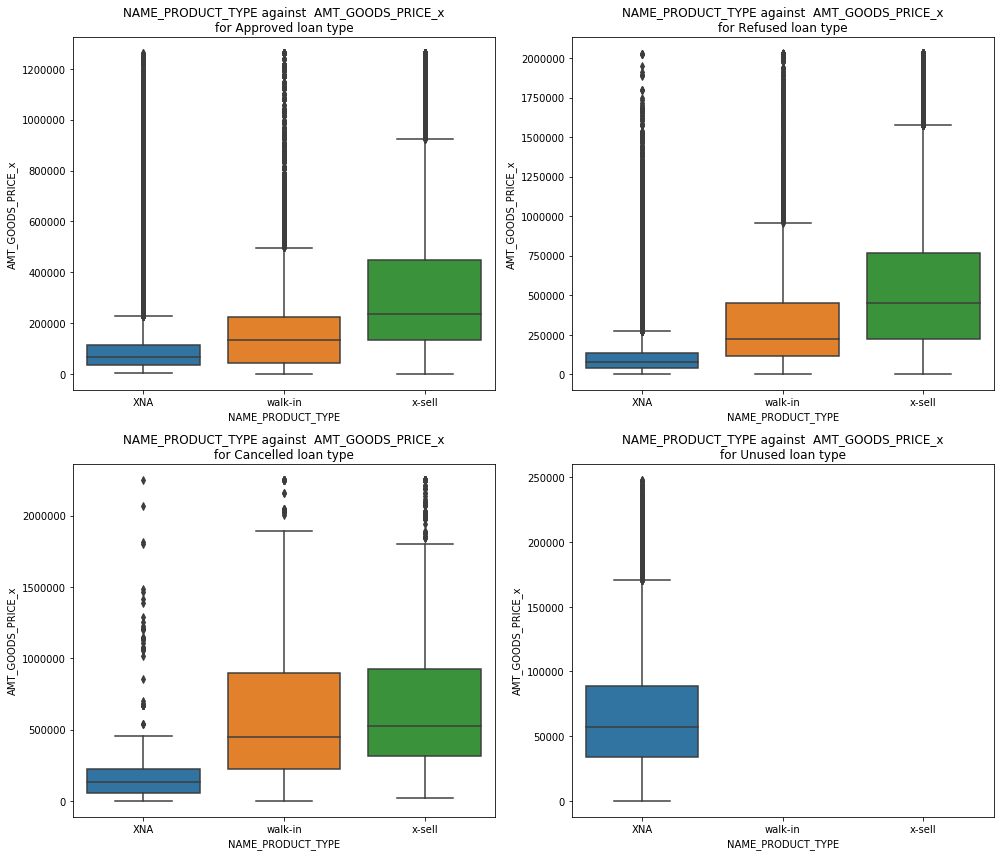

In [195]:
# Considering 99th percentile for the Credit Amount to avoid outliers and to get better insights
# Note: Missing value and outlier imputation is not done previously

bivariate_boxplot_prev('NAME_PRODUCT_TYPE','AMT_GOODS_PRICE_x',0,99)


#### **Inference** 
- For ***Approved*** loan type, x-sell product type has a higher spread for the goods price amount. All the product types outliers for 99th percentile of goods price amount towards the higher side. The median for x-sell is higher at around 200k and for the Unknown (XNAs) product type is lower at around 100k

- For ***Refused*** loan type, x-sell product type has a higher spread for the goods price amount. All the product types outliers for 99th percentile of goods price amount towards the higher side. The median for x-sell is higher at around 50k and for the Unknown (XNAs) product type is lower at around 10k 

- For ***Canceled*** loan type, walk-in product type has a higher spread for the goods price amount and x-sell shows very close trend. All the product types outliers for 99th percentile of goods price amount towards the higher side. The median for x-sell is slightly higher at around 50k than walk-in. Unknown (XNAs) product type has a lower median at around 10k  

- For ***Unused*** loan type, walk-in and x-sell do not show any trend at all, where Unknown (XNAs) product type has a wider spread with outliers for larger goods price. Median for the XNA lie around 50k


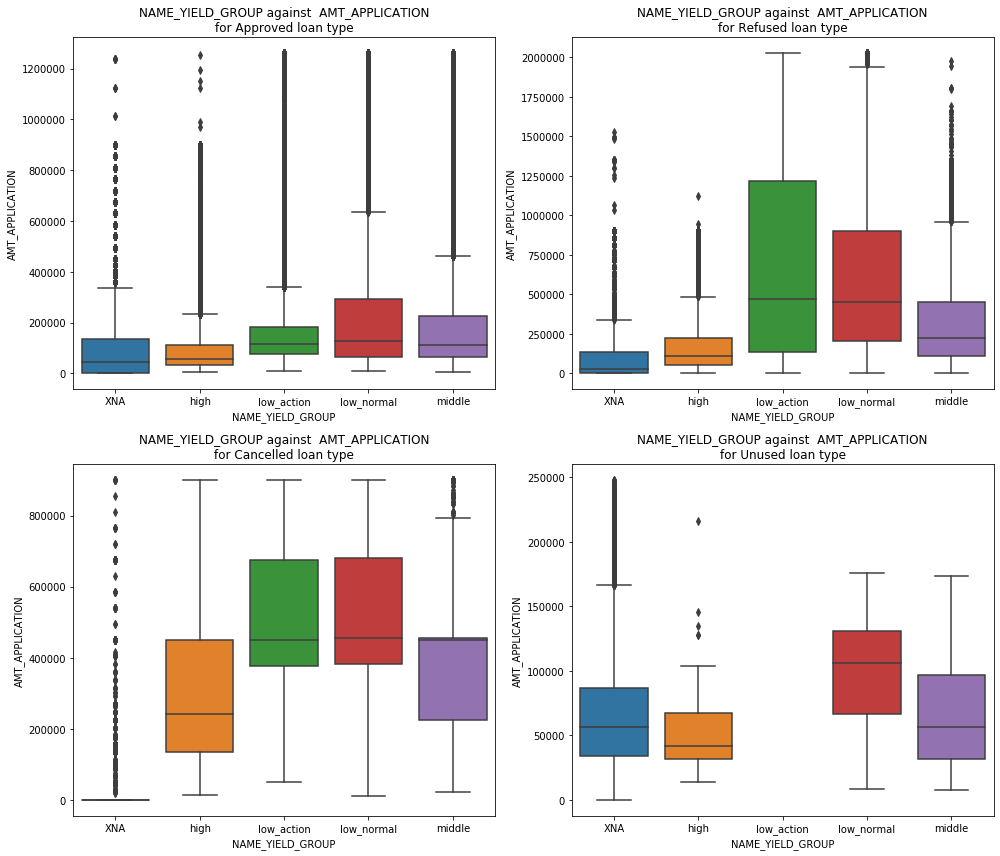

In [196]:
# Considering 99th percentile for the Credit Amount to avoid outliers and to get better insights
# Note: Missing value and outlier imputation is not done previously

bivariate_boxplot_prev('NAME_YIELD_GROUP','AMT_APPLICATION',0,99)


#### **Inference** 
- For ***Approved*** loan type, low-normal yield group has wider spread for the application amount. All the yield groups has  outliers even for 99th percentile of application amount data towards the higher side. The median for Unknown (XNAs) is lower at around 50k. median for low-normal is highest at 110k.

- For ***Refused*** loan type, low-action yield group has wider spread for the application amount. All except low-action yield group has  outliers even for 99th percentile of application amount data towards the higher side. The median for Unknown (XNAs) is lower at around 25k. Median for low-action yield group is highest at 500k.

- For ***Canceled*** loan type, low-action and low-normal yield groups shows wider spread for the application amount. Unknown (XNAs) and middle yield groups has  outliers even for 99th percentile of application amount data towards the higher side. Unknown (XNAs) has more data at 0 and outliers for rest of the amount. The median for Unknown (XNAs) is lower at around 0. Median for low-action and low-normal yield groups are almost similar and is highest at 450k. 

- For ***Unused*** loan type, low-action and middle yield groups shows wider spread for the application amount, however low-normal has a good high value for the median at around 100k. High yield group has the lowest spread and lowest median at around 45k. low-action do not have any data for unused loan type. Unknown (XNAs) and high yield groups has outliers towards the higher application amount value.


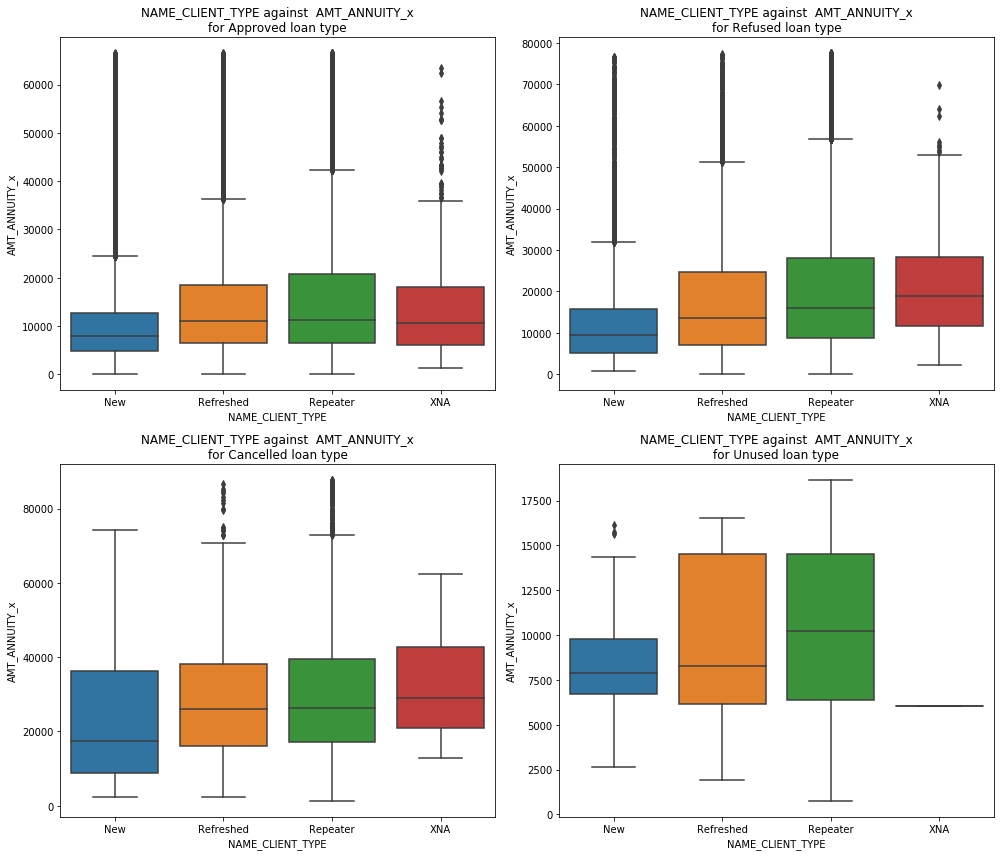

In [197]:
# Considering 99th percentile for the Credit Amount to avoid outliers and to get better insights
# Note: Missing value and outlier imputation is not done previously

bivariate_boxplot_prev('NAME_CLIENT_TYPE','AMT_ANNUITY_x',0,99)


#### **Inference** 
- For ***Approved*** loan type, Repeater client types has a higher spread over the annuity amount. All the client types show outliers for 99th percentile of annuity amount data towards the higher side. The median for all the client types is within a range of 80k to 120k. Median value of annuity amount for the New clients are lowest and for the Repeaters are highest.  

- For ***Refused*** loan type, Repeater client types has a wider spread over the annuity amount. All the client types show outliers for 99th percentile of annuity amount data towards the higher side. The median for Unknown (XNAs) is highest at around(20k) and the lowest median is for New clients at around (10k).  

- For ***Canceled*** loan type, New client types has a wider spread over the annuity amount. Refreshed and Repeater client types show outliers for 99th percentile of annuity amount data towards the higher side. The median for Unknown (XNAs) is highest at around(28k) and the lowest median is for New clients at around (18k).  

- For ***Unused*** loan type, Refresher and repeater client types has a wider spread over the annuity amount, however the repeater client type's median is way higher at around 10k. New client types has the least spread. New client type has outliers for 99th percentile of annuity amount data towards the higher side. Unknown (XNAs) shows all the data at a single point and at 6.2k

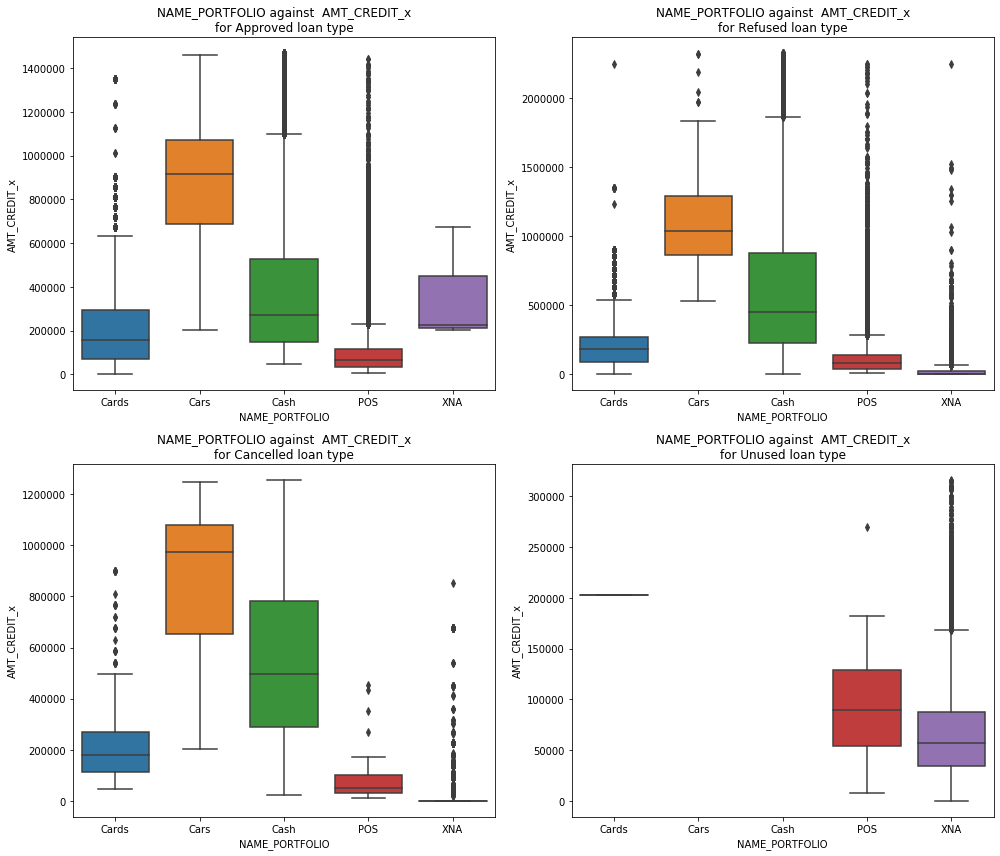

In [198]:
# Considering 99th percentile for the Credit Amount to avoid outliers and to get better insights
# Note: Missing value and outlier imputation is not done previously

bivariate_boxplot_prev('NAME_PORTFOLIO','AMT_CREDIT_x',0,99.4)


#### **Inference** 
- For ***Approved*** loan type, Cars and Cash portfolios has a similar spread but the median value of credit amount is way higher(900k) for the cars portfolio, which also do not show outliers for the 99th percentile data. The Unknown (XNAs) portfolio has a completely lower skewed distribution with no outlers. Lowest spread is for POS portfolio which has the lowest median as well(less than 100k).Cards, Cash and POS portfolio shows outlier towards the highest credit amount.

- For ***Refused*** loan type, Cash portfolios has wider spread. Cars portfolio has highest median value of credit amount(1000k). All portfolios show outliers for the 99th percentile data. The Unknown (XNAs) portfolio has least spread with lowest median value for the credit amount.

- For ***Canceled*** loan type, Cars and Cash portfolios has a similar spread but the median value of credit amount is way higher(990k) for the cars portfolio. Cars and cash portfolios do not show outliers for the 99th percentile data. The Unknown (XNAs) portfolio has a lowest spread and median is around 0. Unknown (XNAs), POS and Cards show outliers for the 99th percentile data.

- For ***Unused*** loan type, POS portfolio has the highest spread. The lowest spread is for cards portfolio and median and most of the values is within 200k range. Cars portfolio do not show any data, lowest median is for Unknown (XNAs), around 50k. Unknown (XNAs) and POS show outliers for the 99th percentile data.


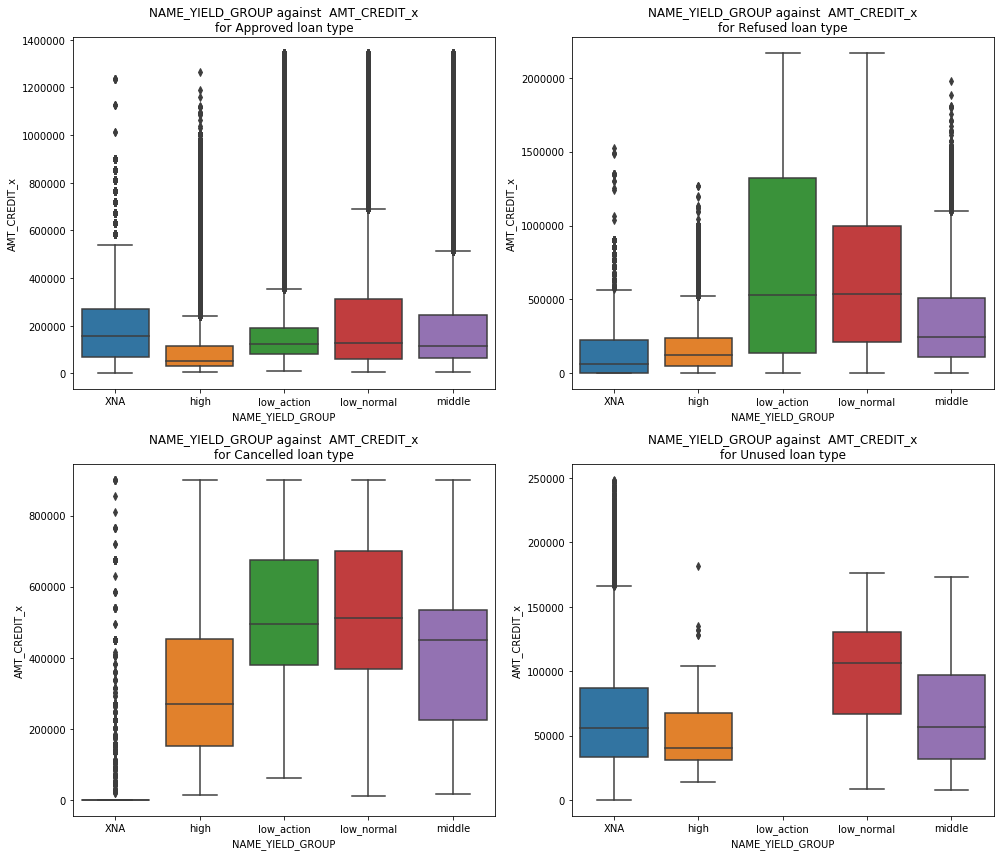

In [199]:
# Considering 99th percentile for the Credit Amount to avoid outliers and to get better insights
# Note: Missing value and outlier imputation is not done previously

bivariate_boxplot_prev('NAME_YIELD_GROUP','AMT_CREDIT_x',0,99)


#### **Inference** 
- For ***Approved*** loan type, low-normal yield group has wider spread for the credit amount. All the yield groups has  outliers even for 99th percentile of credit amount towards the higher side. The median for high is lower at around 40k. median for Unknown (XNAs) is highest at 150k.

- For ***Refused*** loan type, low-action yield group has wider spread for the credit amount. All except low-action and low-normal yield groups has  outliers even for 99th percentile of credit amount towards the higher side. The median for Unknown (XNAs) is lower at around 80k. Median for low-action and low-normal yield group is highest at 500k.

- For ***Canceled*** loan type, Unknown (XNAs) yield groups shows lowest spread for the credit amount. Unknown (XNAs)  yield groups has  outliers even for 99th percentile of credit amount towards the higher side. Unknown (XNAs) has more data at 0 and outliers for rest of the amount. The median for Unknown (XNAs) is lower at around 0. Median for low-normal yield groups is highest at 480k. 

- For ***Unused*** loan type, low-action and middle yield groups shows wider spread for the credit amount, however low-normal has a highest value for the median at around 110k. High yield group has the lowest spread and lowest median at around 45k. low-action do not have any data for unused loan type. Unknown (XNAs) and high yield groups has outliers towards the higher application amount value.


#  <font color=blue>CONCLUSION</font>
___

- Current application data is imbalanced  - There are far more number (92%) of loans repaid on time, than those (8%) are defaulted.


- **Bank should try to limit**
  - Ratio of males are higher for defaulters, Men who avail cash loan have a higher chance of payment difficulties
  - Working people have a higher default rate for cash loans
  - Clients living with parents and in Rented Apartments tend to have higher chance of payment difficulties  

   _defaulters are more in such groups_  


- **Bank should focus more on**
 - Businessman and students.
 - Commercial associates and Pensioners.
 - Clients with higher education.
 - Clients with academic degree have defaulters when the credit amount and income is higher, bank should concentrate more on clients with academic degree with nominal credit amount, when amount goes higher chances are more for defaulting.

     _non-defaulters are more in such groups_
